In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [5]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')

train['shear'] = train.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
val['shear'] = val.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
test['shear'] = test.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])


In [9]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [11]:
#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_img_std = extract_images(train_std, variables, verbose=True)
print(train_img_std.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 9)


In [12]:
val_img_std = extract_images(val_std, variables, verbose=False)
print(val_img_std.shape)

(1826, 13, 29, 9)


In [13]:
test_img_std = extract_images(test_std, variables, verbose=False)
print(test_img_std.shape)

(2557, 13, 29, 9)


In [15]:
train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [16]:
variables = [ 'target']
y_train_img = extract_images(y_train, variables, verbose=True)
print(y_train_img.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 1)


In [17]:
variables = [ 'target']
y_val_img = extract_images(y_val, variables, verbose=True)
print(y_val_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
(1826, 13, 29, 1)


In [18]:
variables = [ 'target']
y_test_img = extract_images(y_test, variables, verbose=True)
print(y_test_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2557, 13, 29, 1)


In [19]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Metal device set to: Apple M1


2023-03-02 07:44:07.315049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 07:44:07.316436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 15, 8)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d (Cropping2D)     (None, 13, 29, 1)         0

In [20]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-02 07:44:24.129306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 07:44:24.301911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0382

2023-03-02 07:44:27.369022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 9ms/step - loss: 0.0382 - val_loss: 0.0156
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0164 - val_loss: 0.0137
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0149 - val_loss: 0.0125
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0142 - val_loss: 0.0120
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0136 - val_loss: 0.0116
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0132 - val_loss: 0.0115
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0129 - val_loss: 0.0113
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0122 - val_loss: 0.0105
E

354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 82/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 83/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 84/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 84: early stopping


80/80 [==============================] - 0s 2ms/step


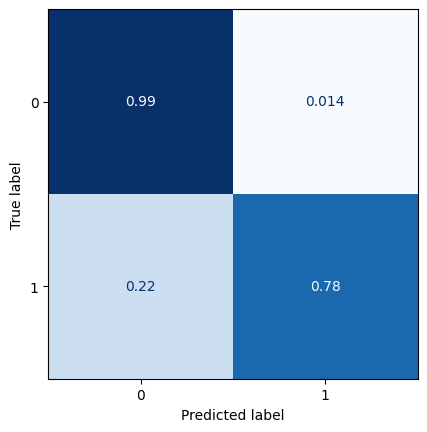

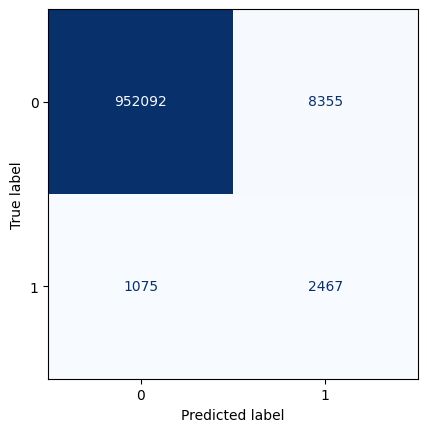

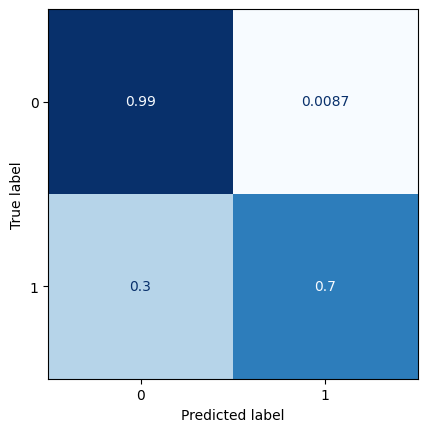

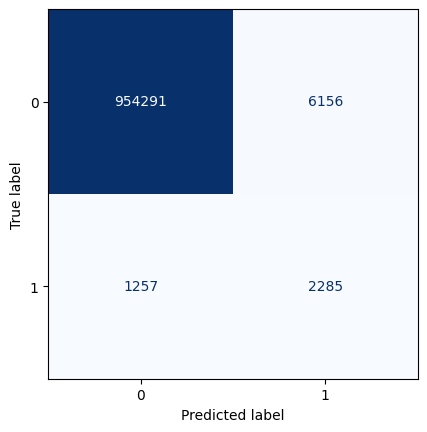

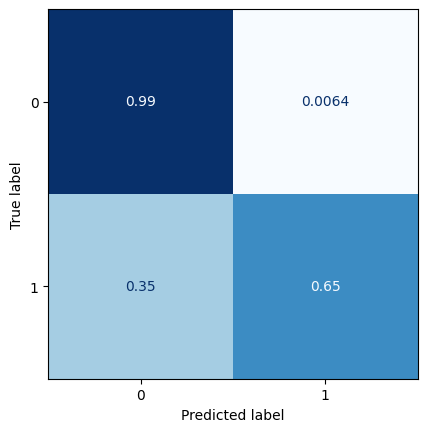

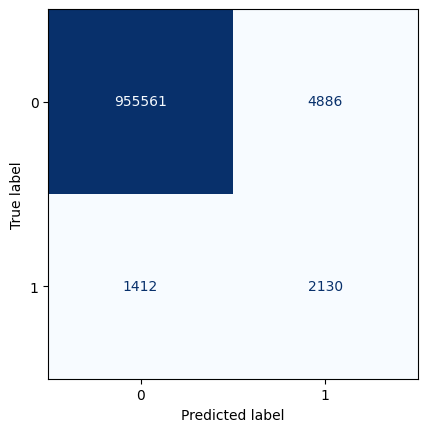

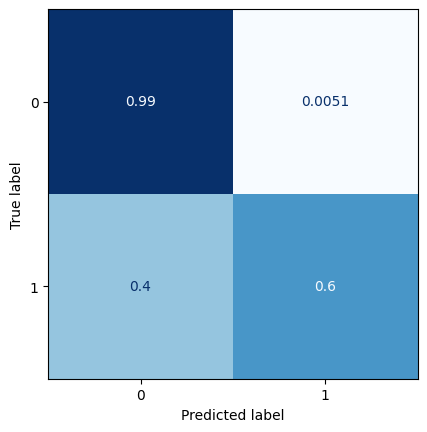

In [22]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    t = model.predict(test_img_std)
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

In [23]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

18


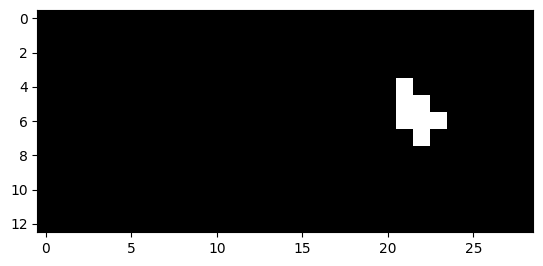

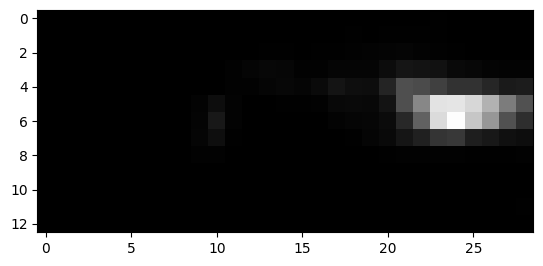

19


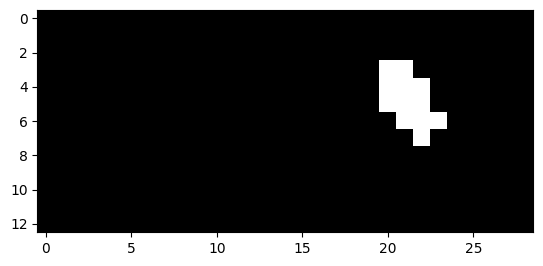

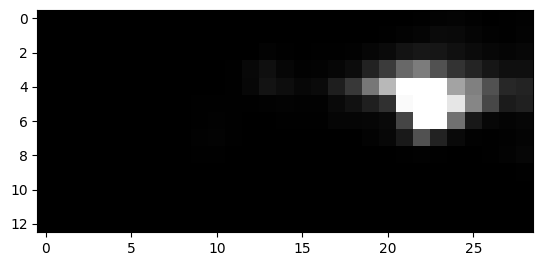

20


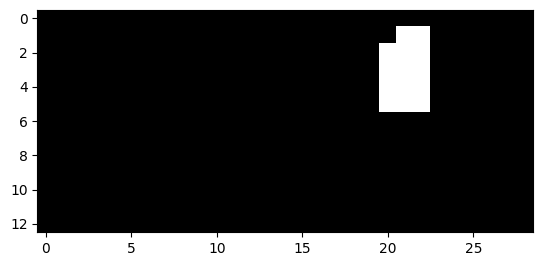

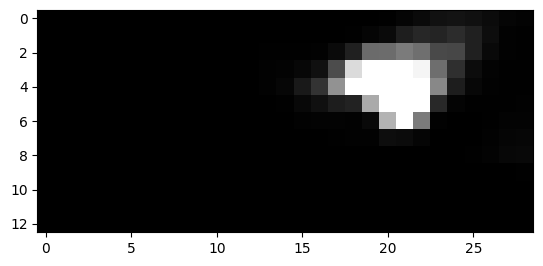

21


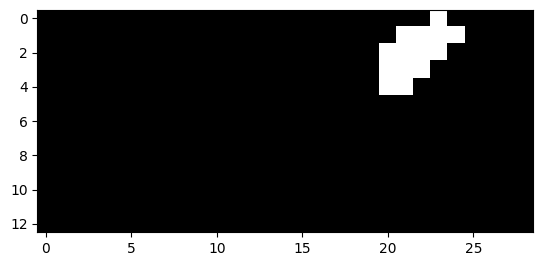

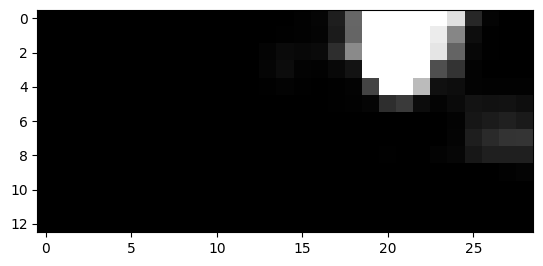

22


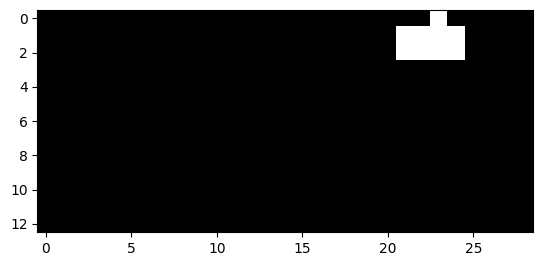

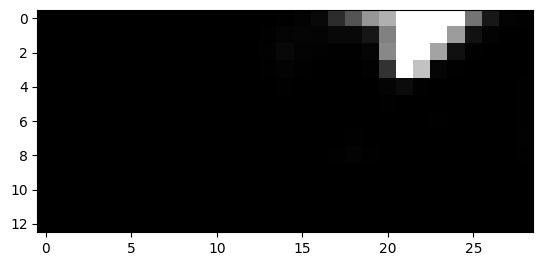

23


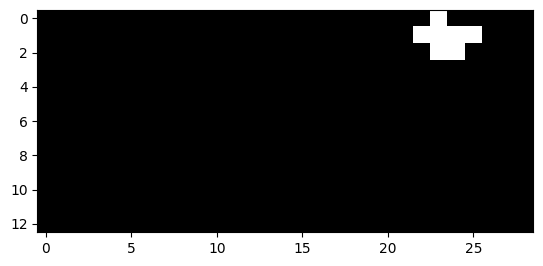

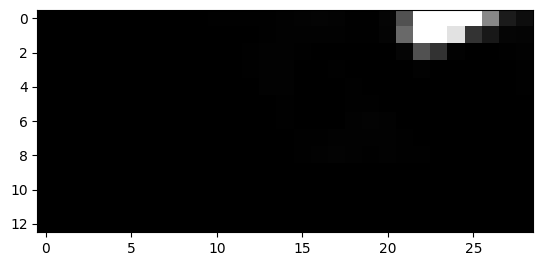

24


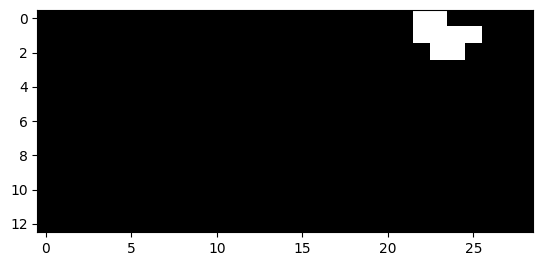

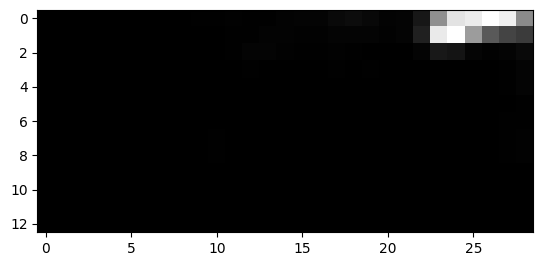

25


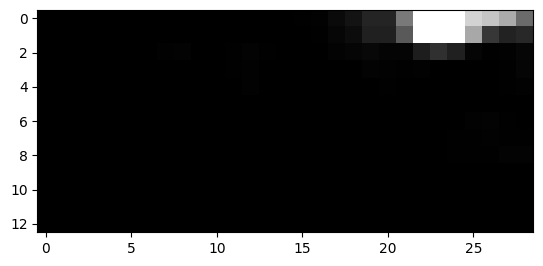

26


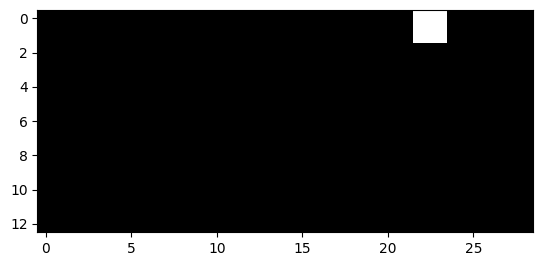

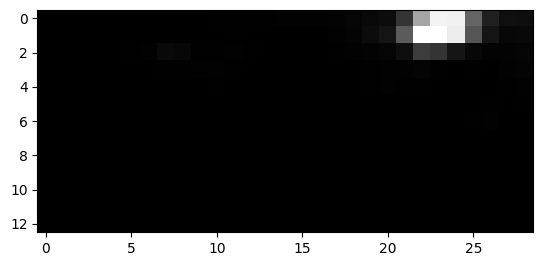

27


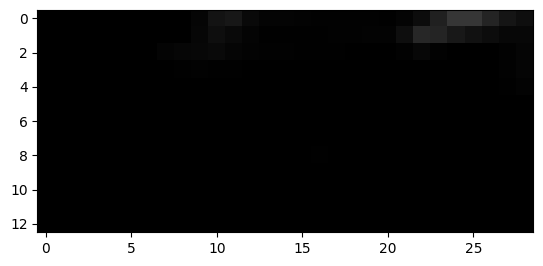

28


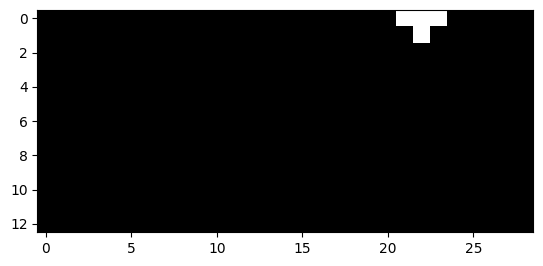

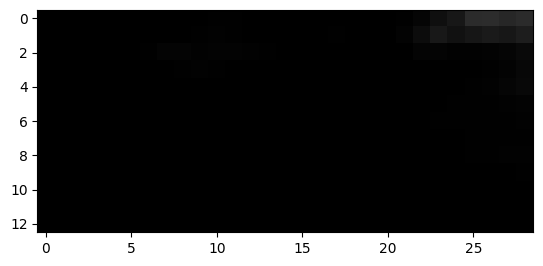

38


39


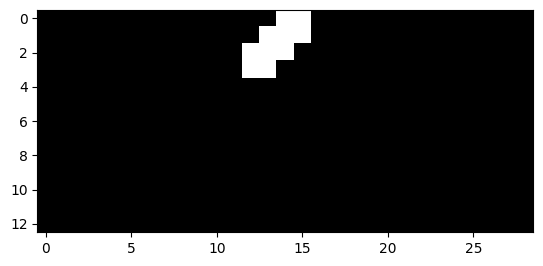

40


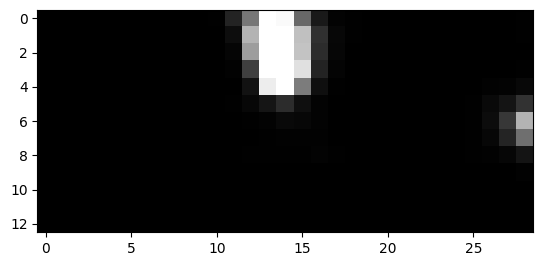

41


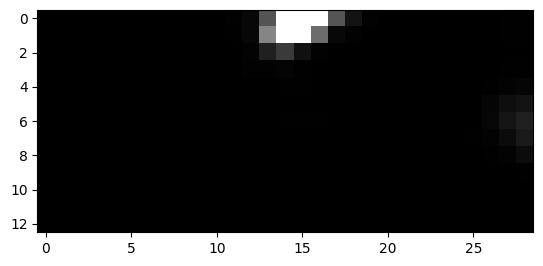

42


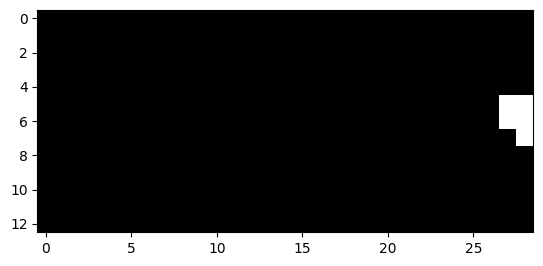

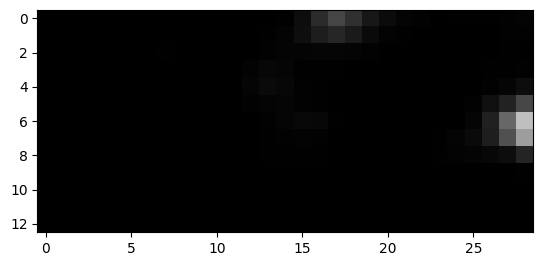

43


44


45


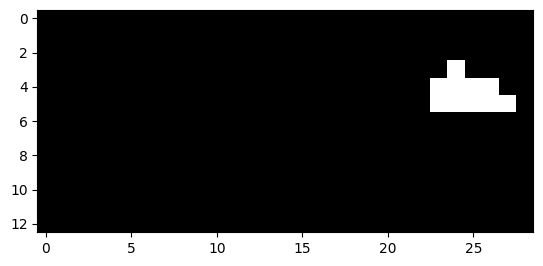

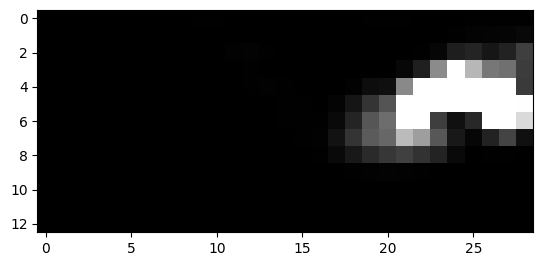

46


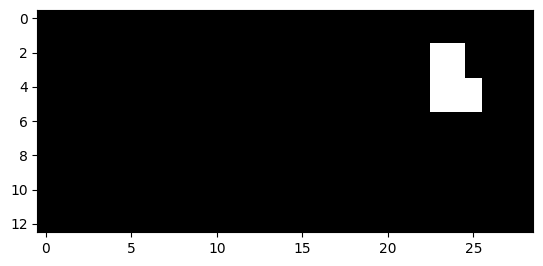

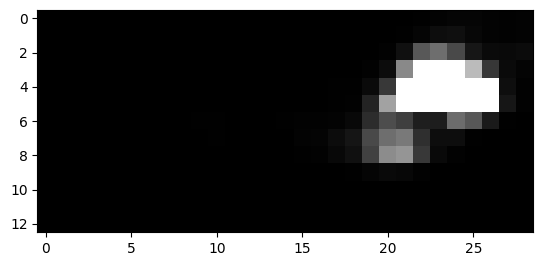

47


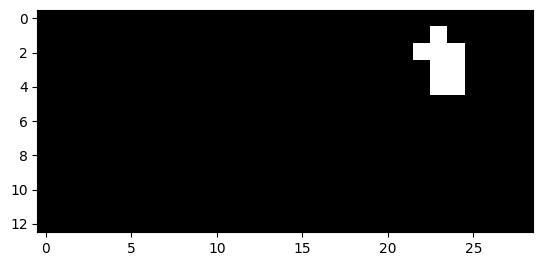

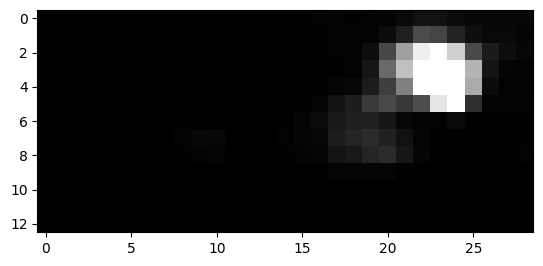

48


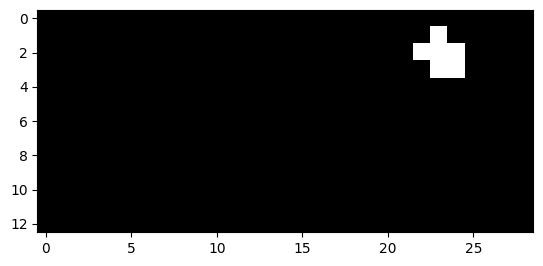

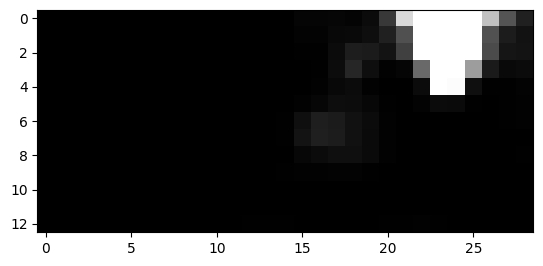

49


50


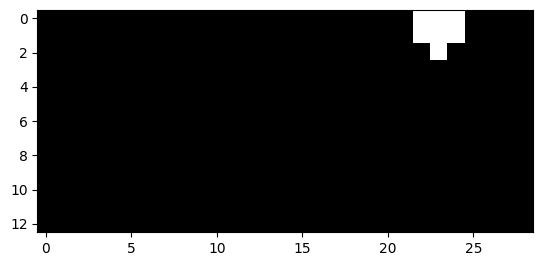

51


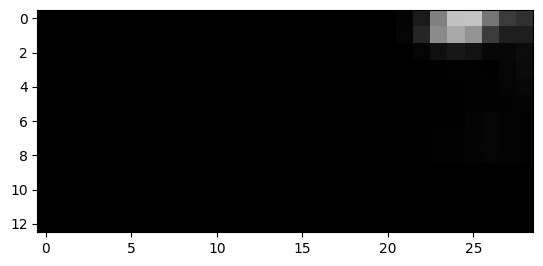

52


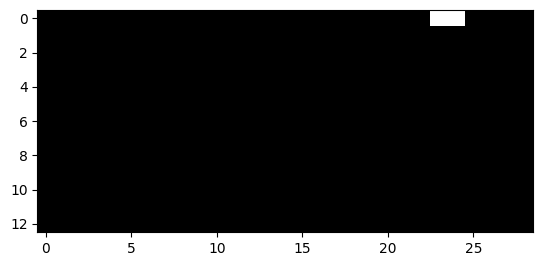

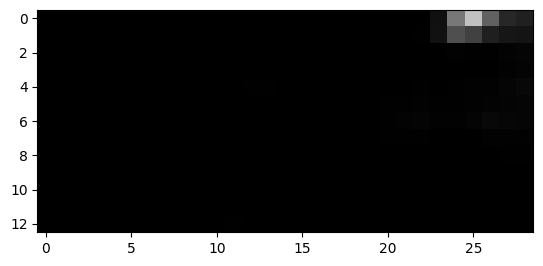

72


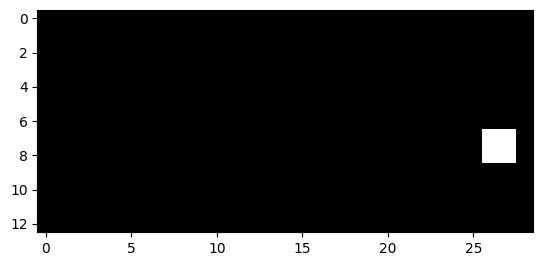

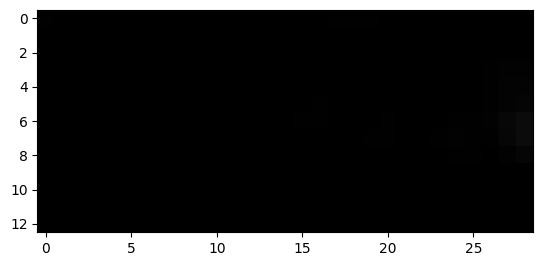

73


74


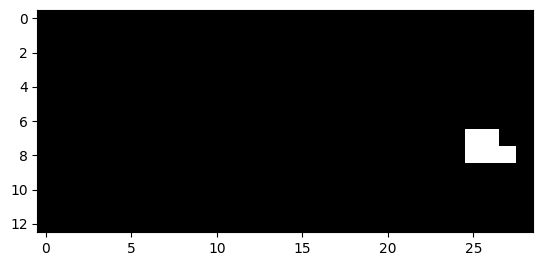

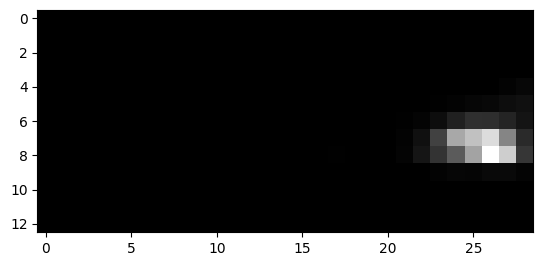

75


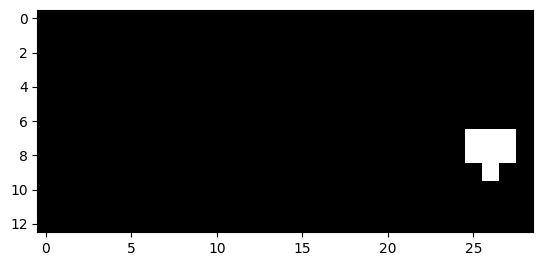

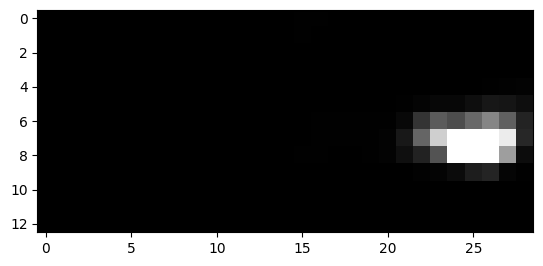

76


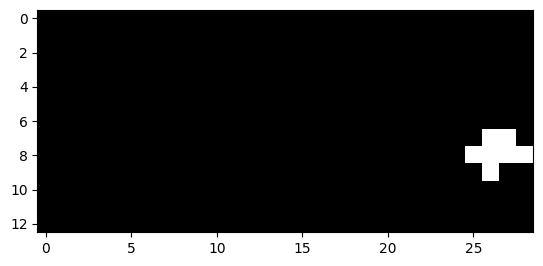

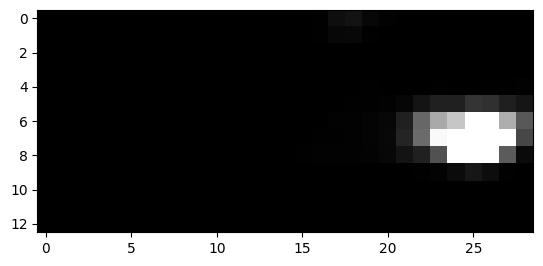

77


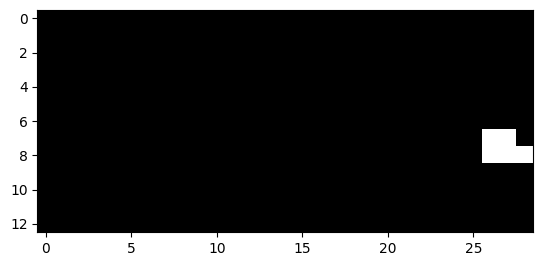

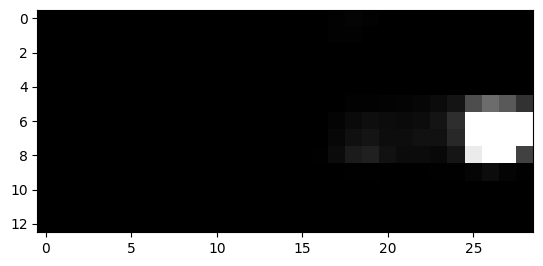

78


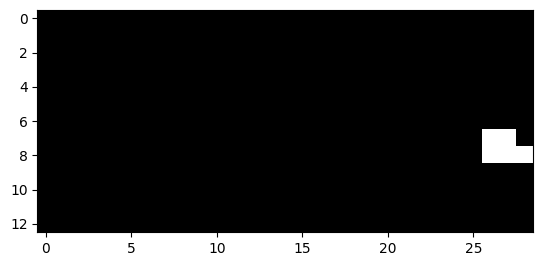

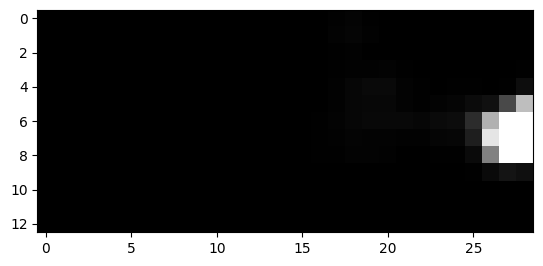

79


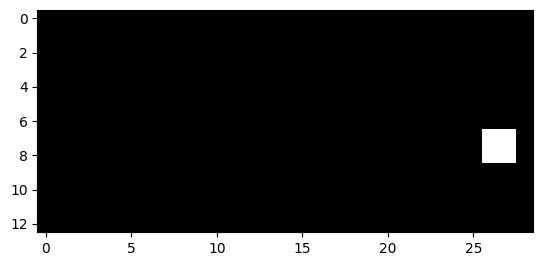

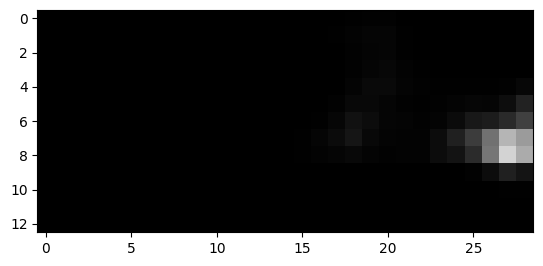

85


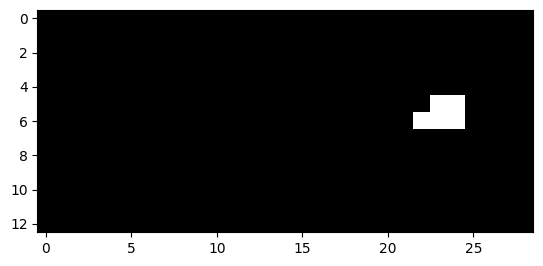

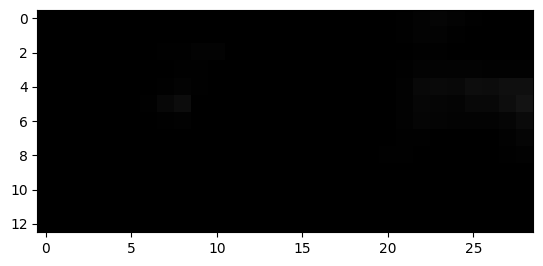

86


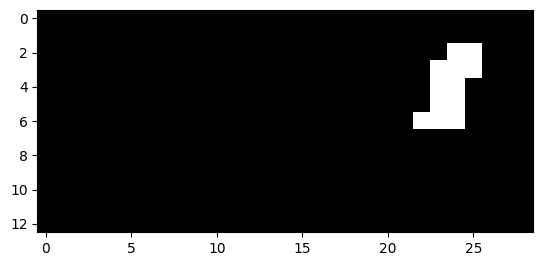

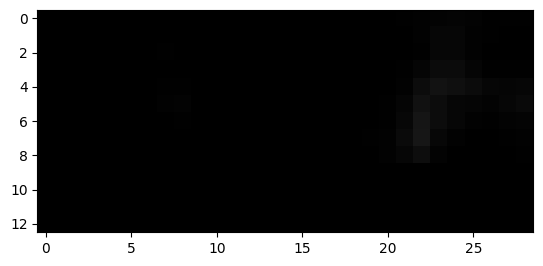

87


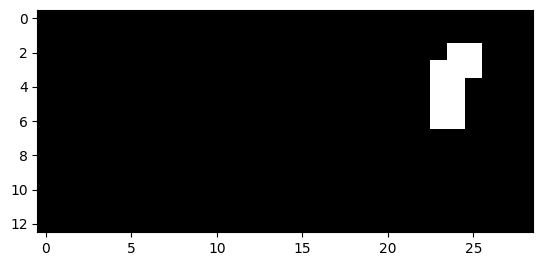

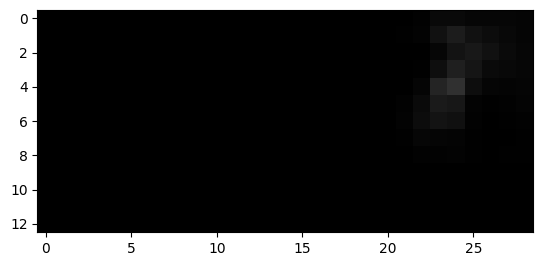

99


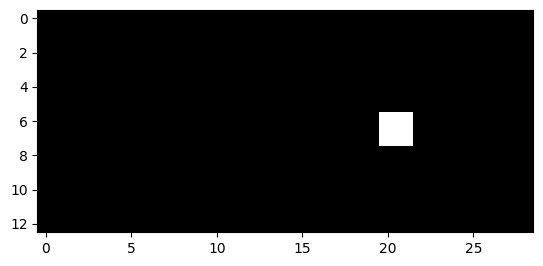

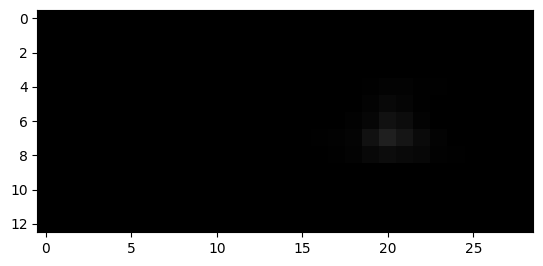

100


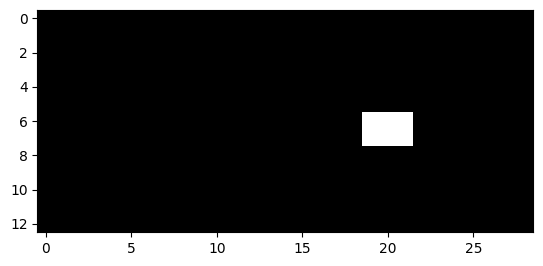

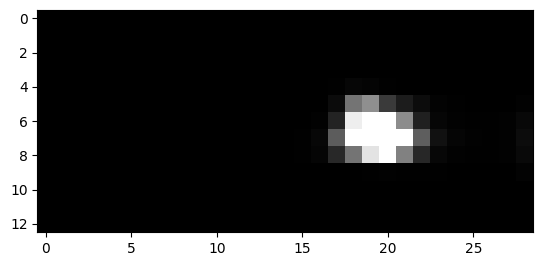

101


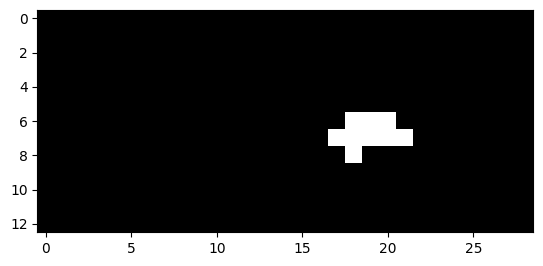

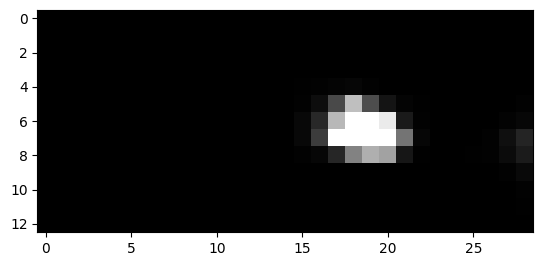

102


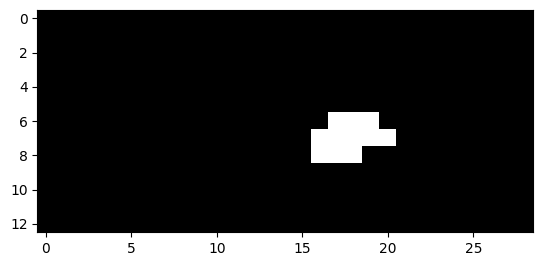

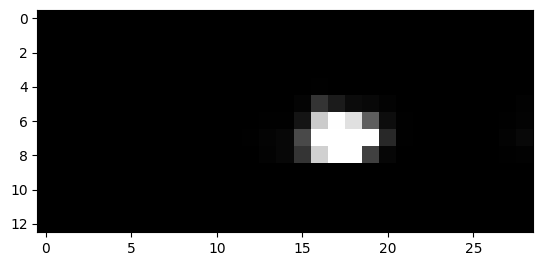

103


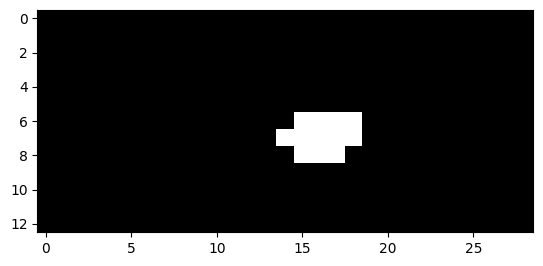

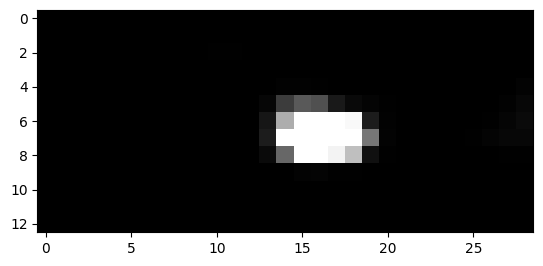

104


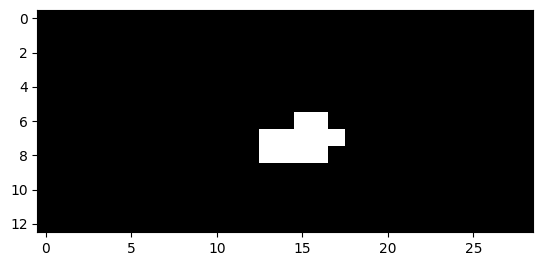

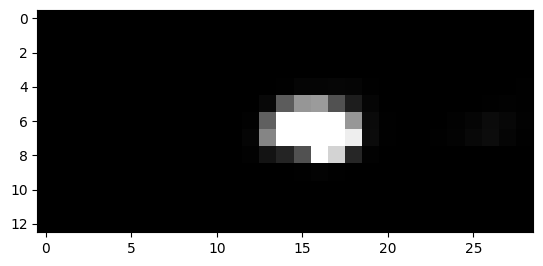

105


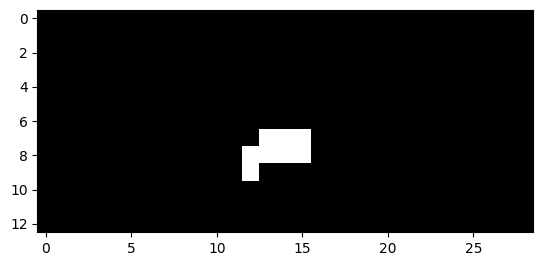

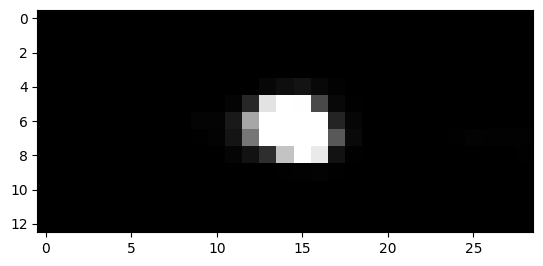

106


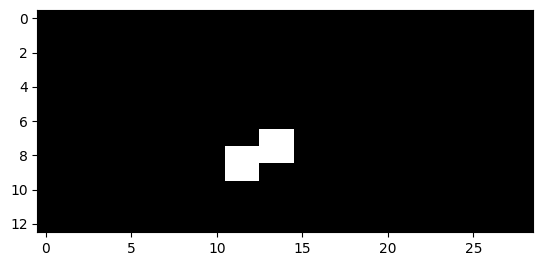

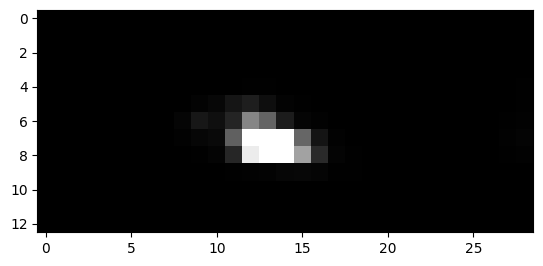

107


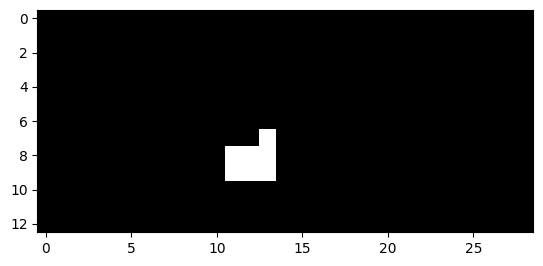

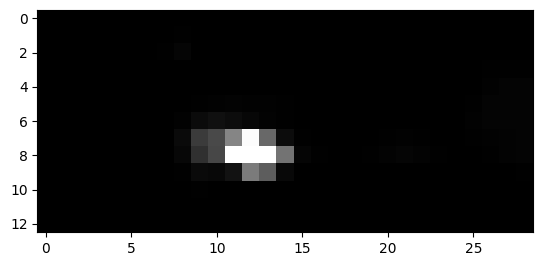

108


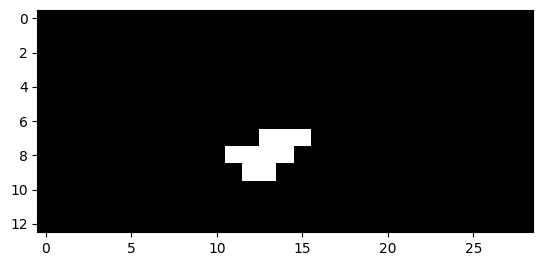

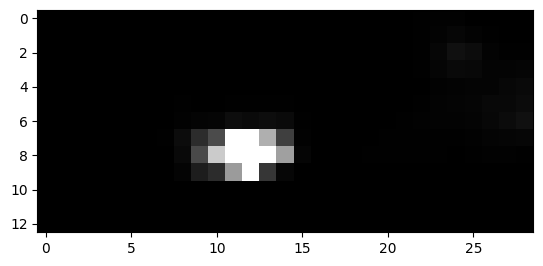

109


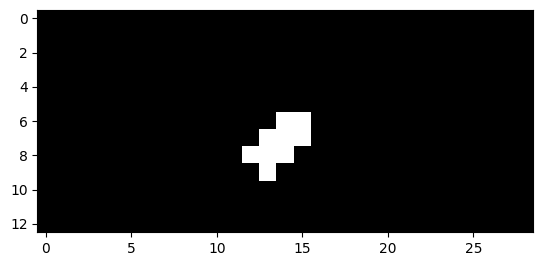

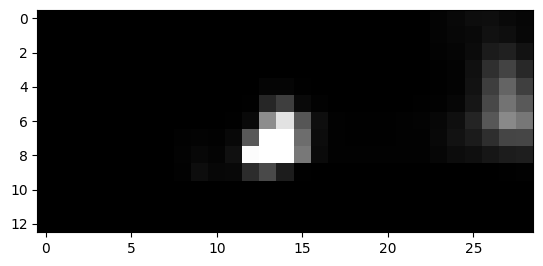

110


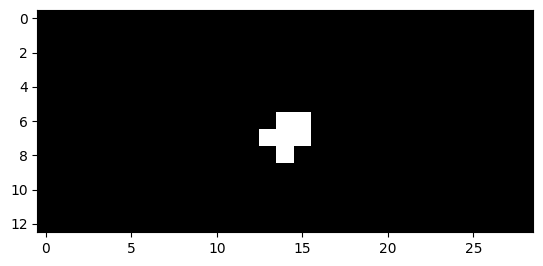

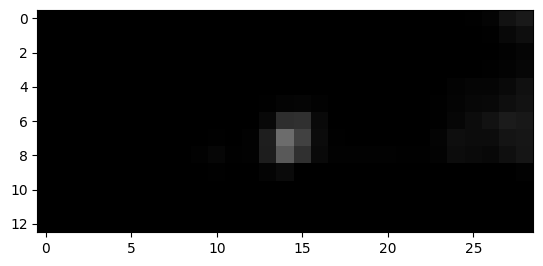

111


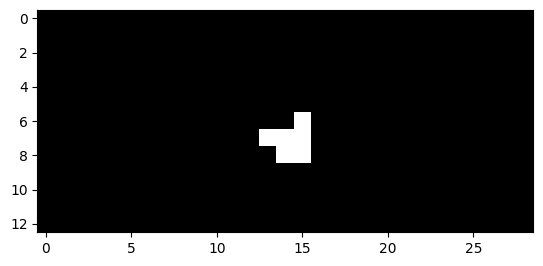

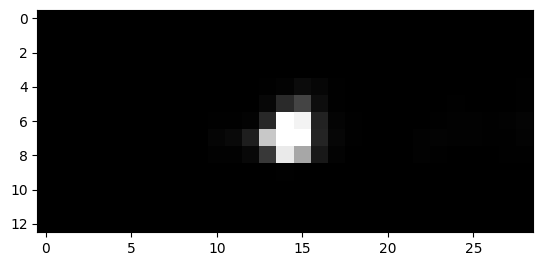

112


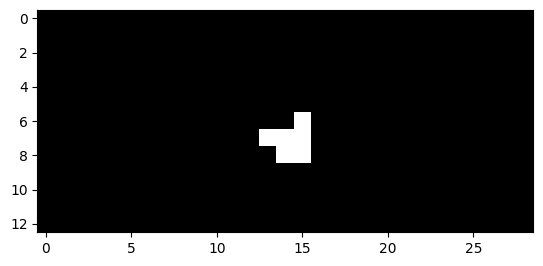

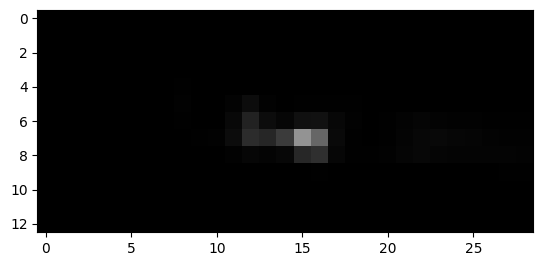

195


196


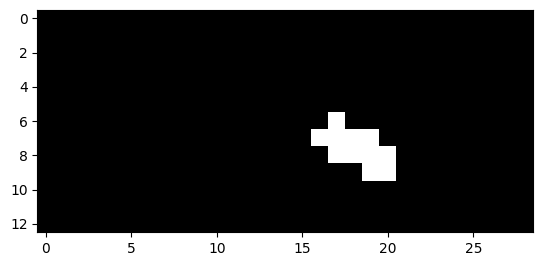

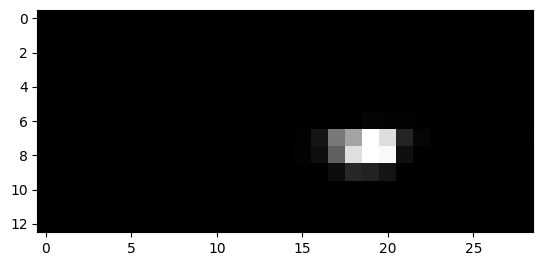

197


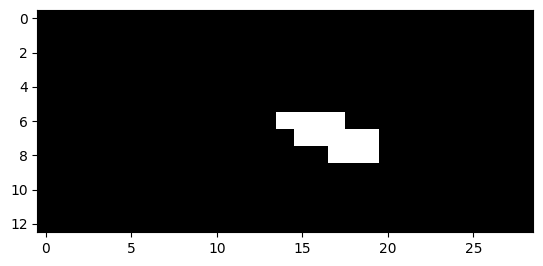

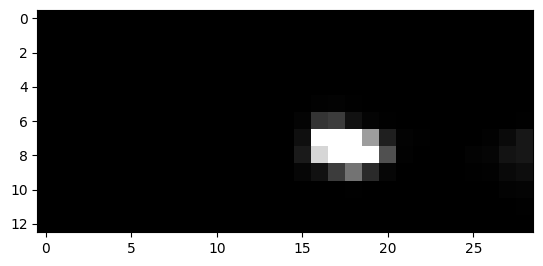

198


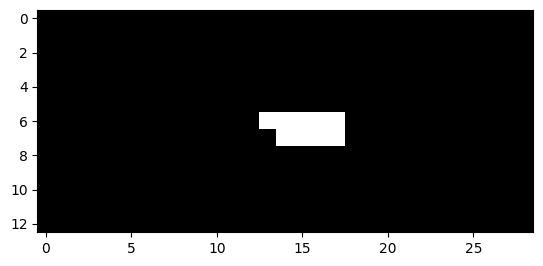

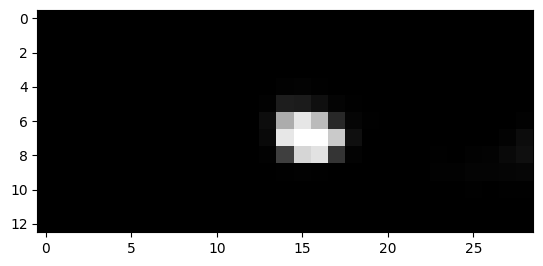

199


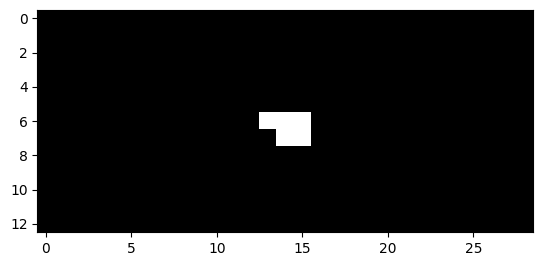

274


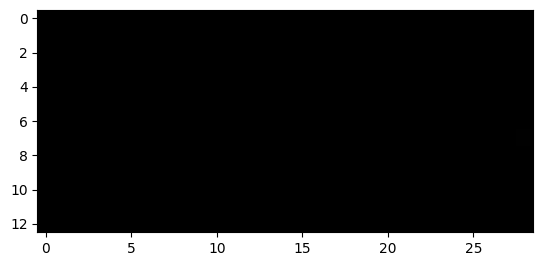

275


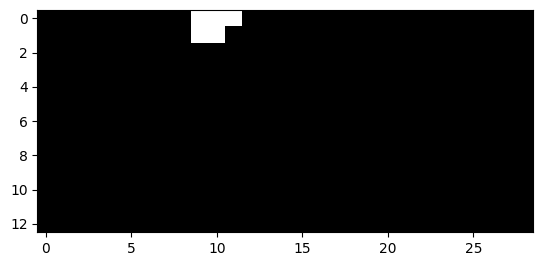

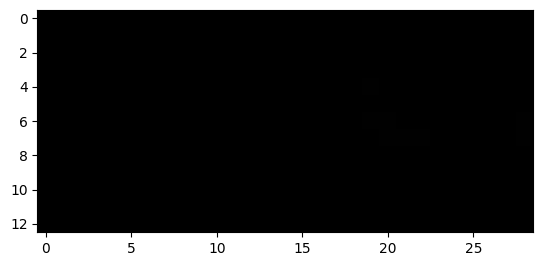

276


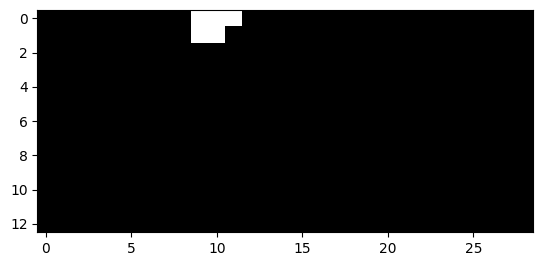

277


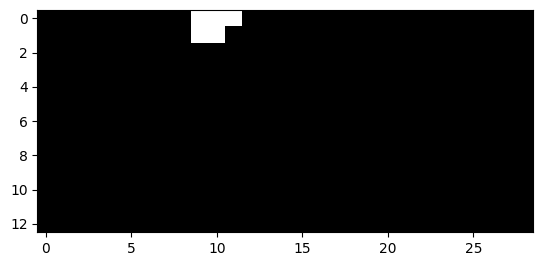

278


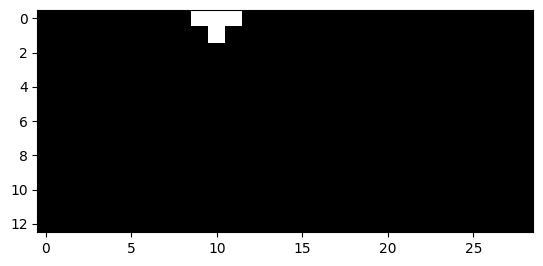

398


399


400


401


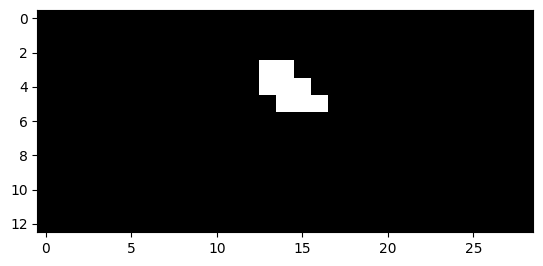

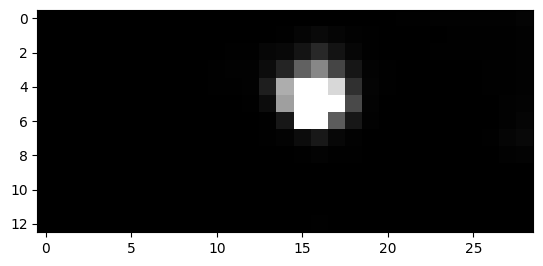

402


403


404


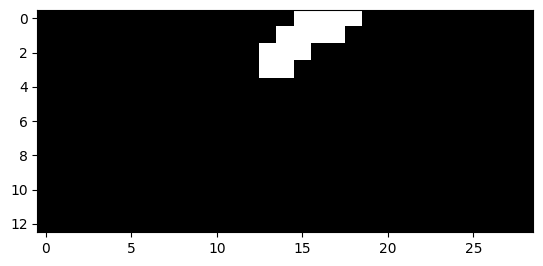

405


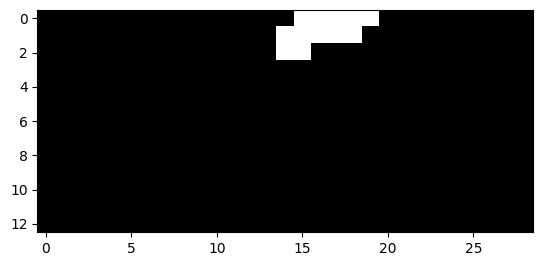

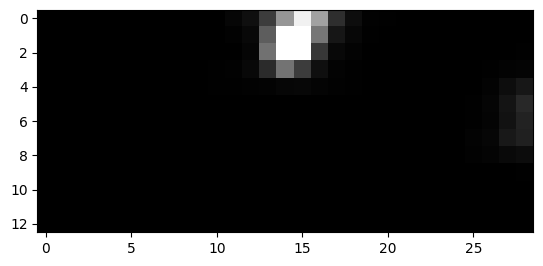

406


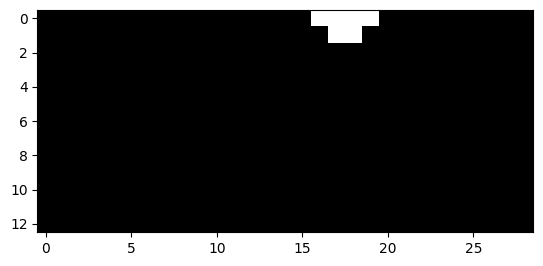

407


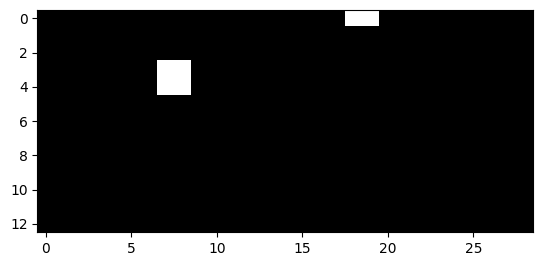

408


409


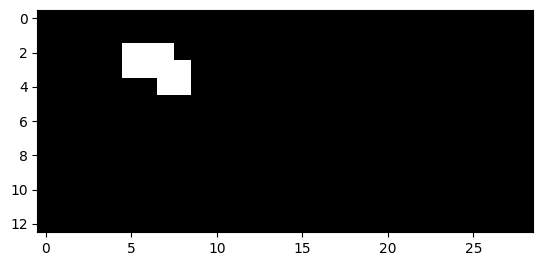

410


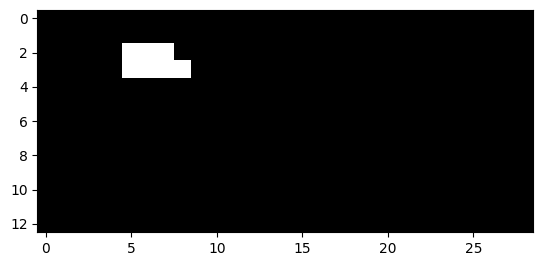

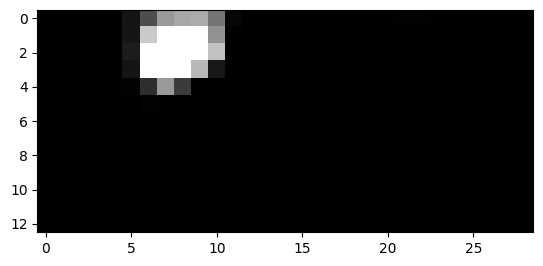

411


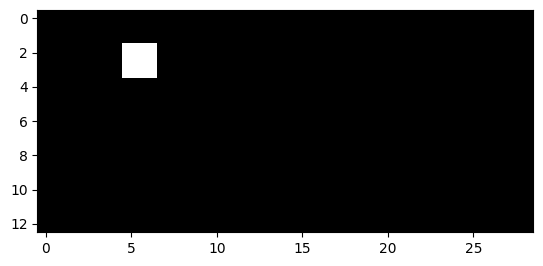

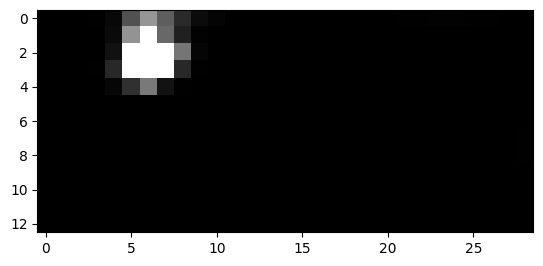

425


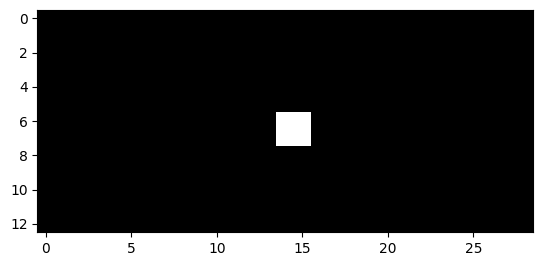

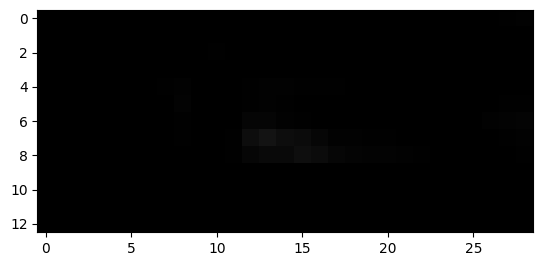

426


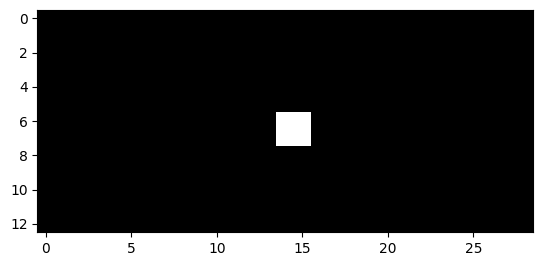

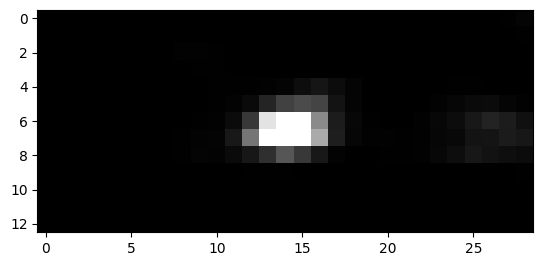

427


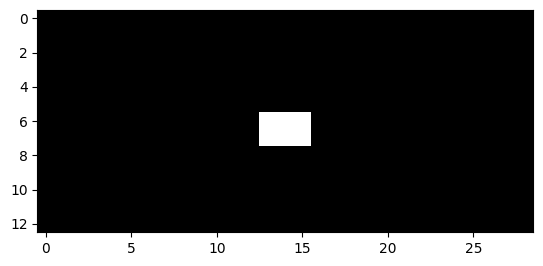

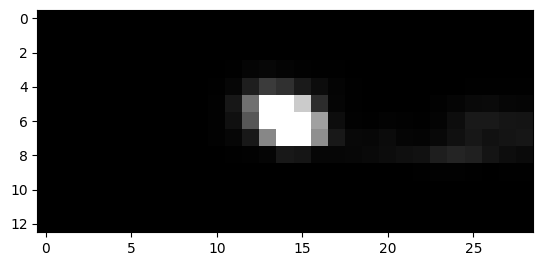

428


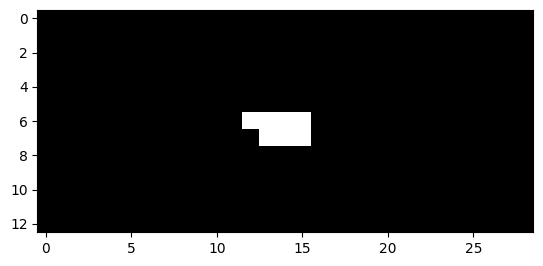

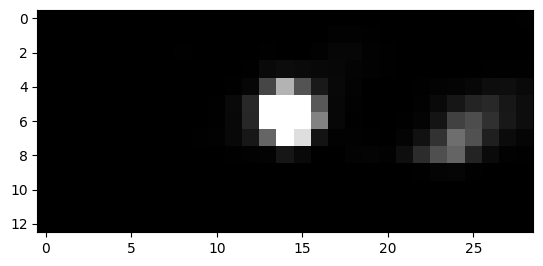

429


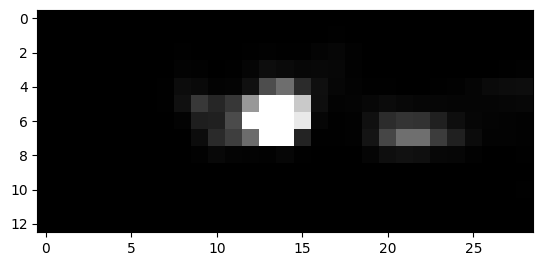

430


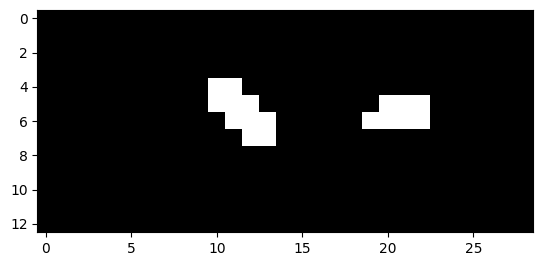

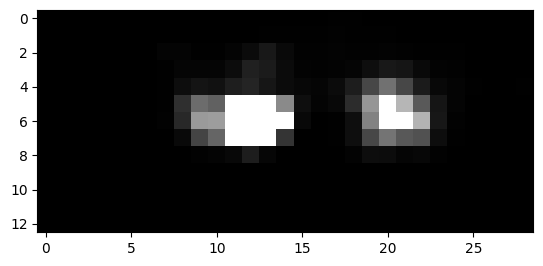

431


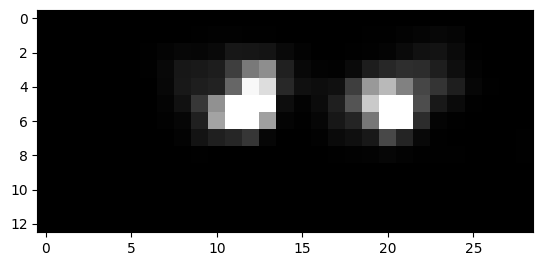

432


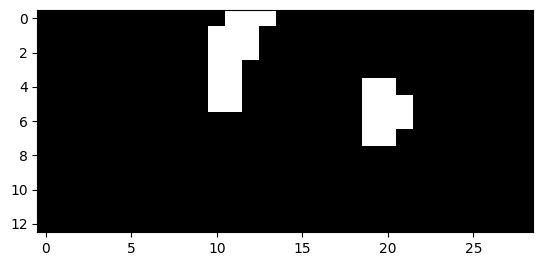

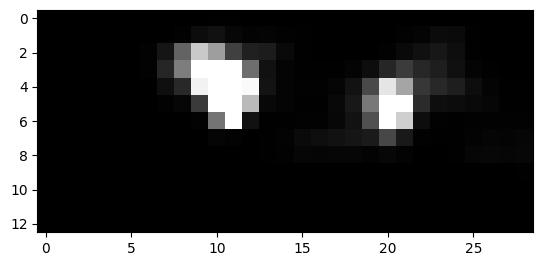

433


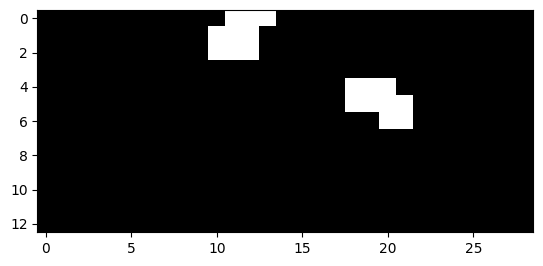

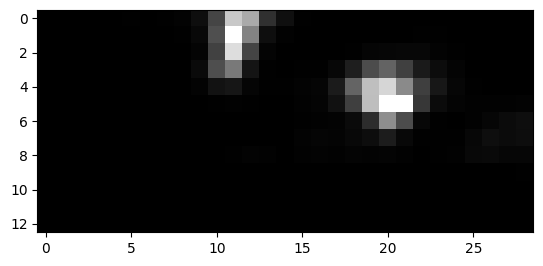

434


436


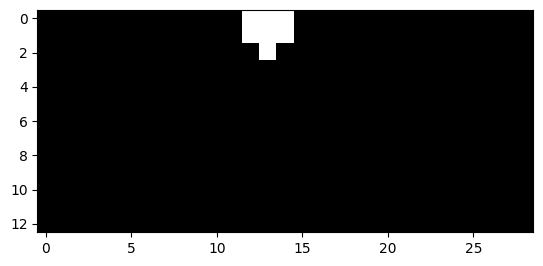

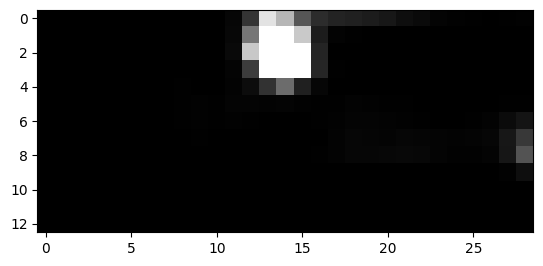

437


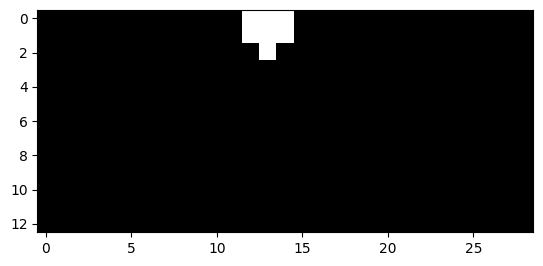

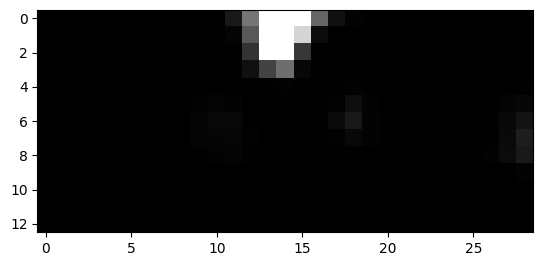

438


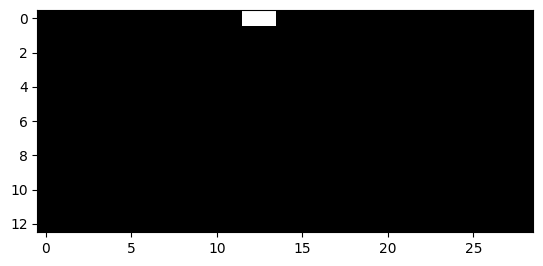

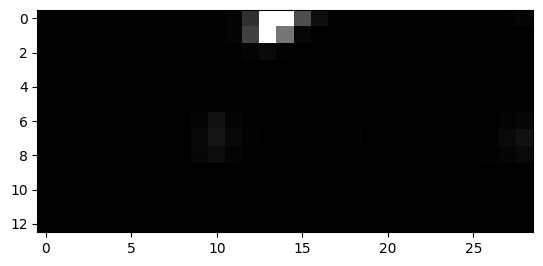

730


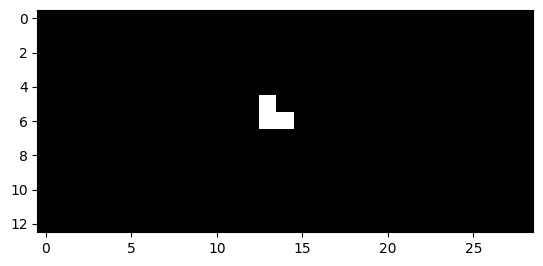

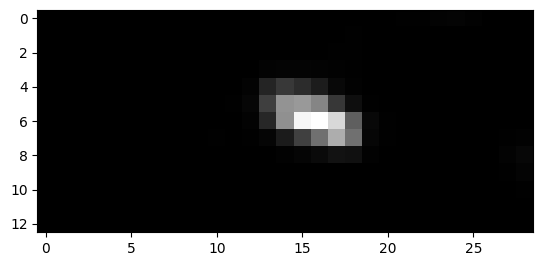

731


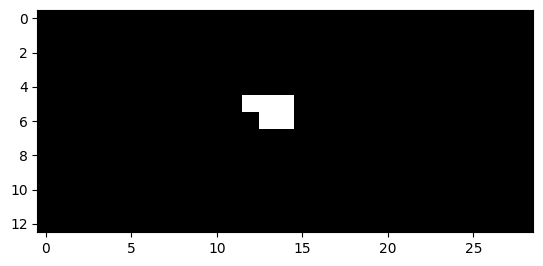

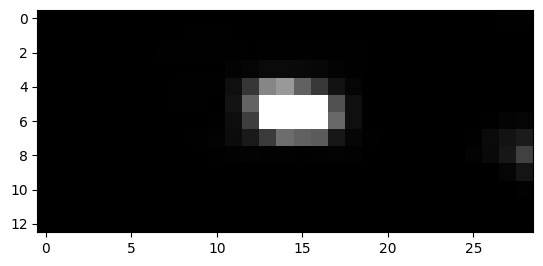

732


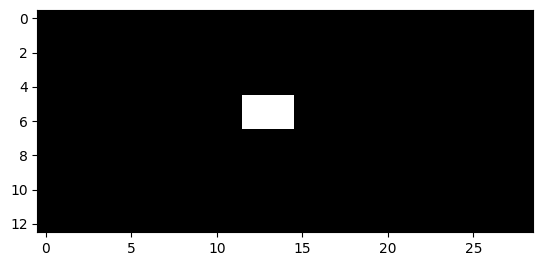

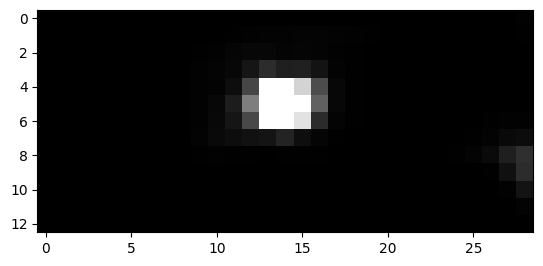

733


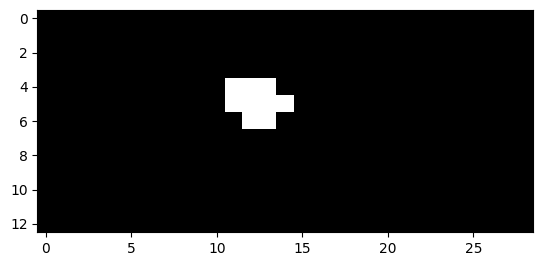

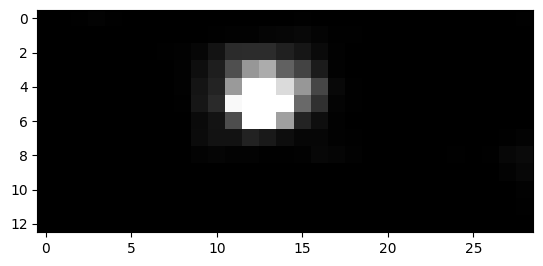

734


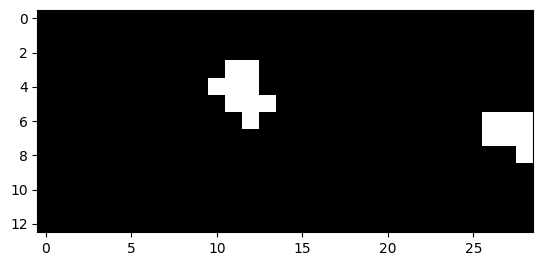

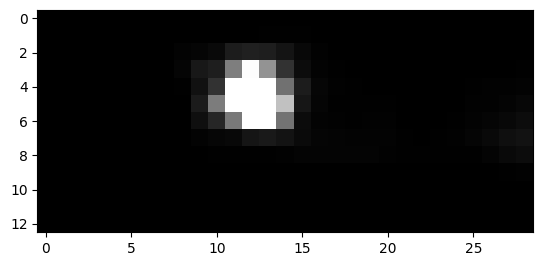

735


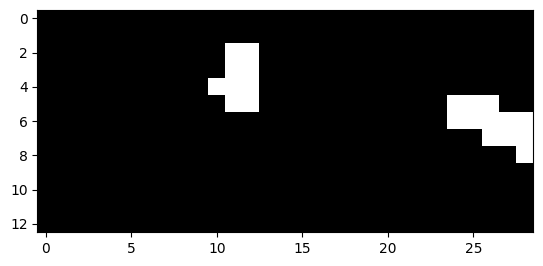

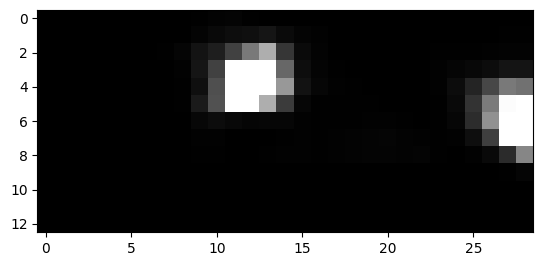

736


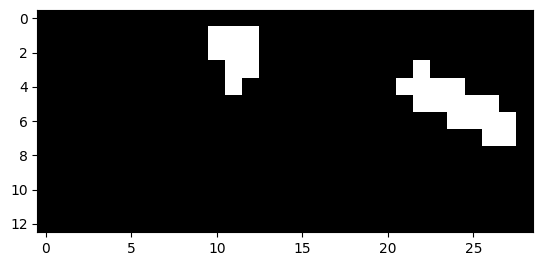

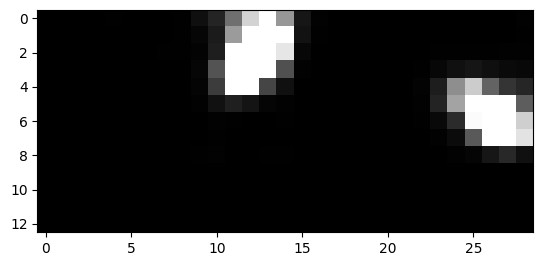

737


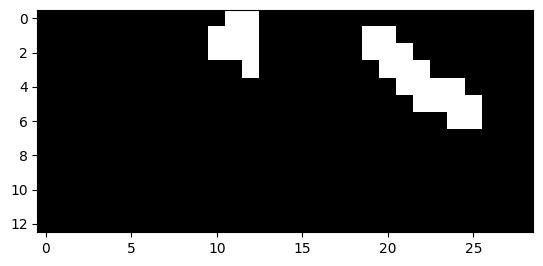

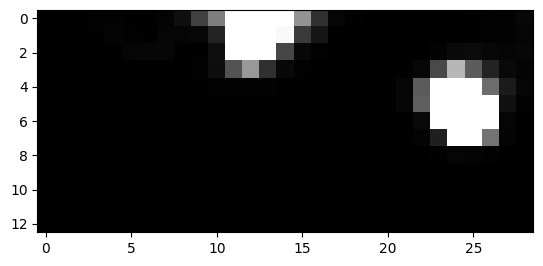

738


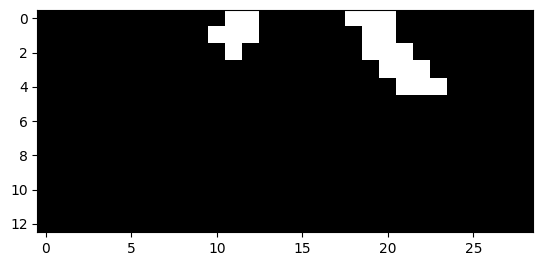

739


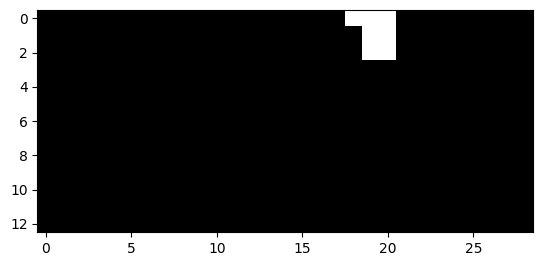

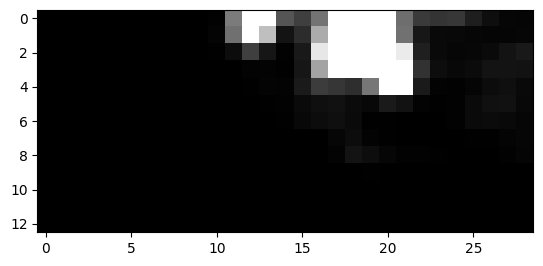

741


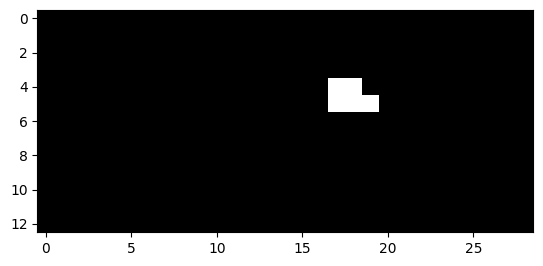

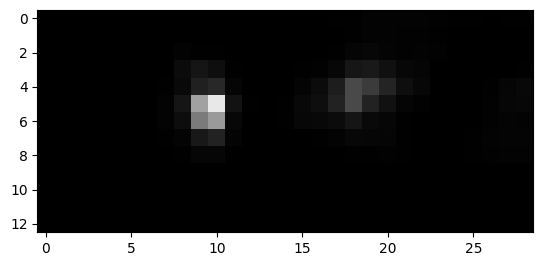

742


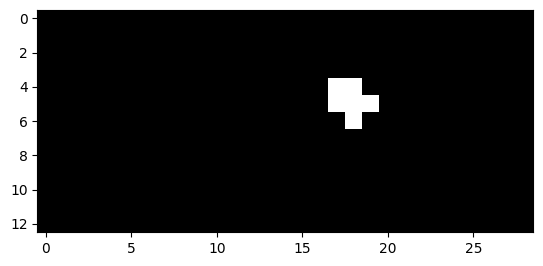

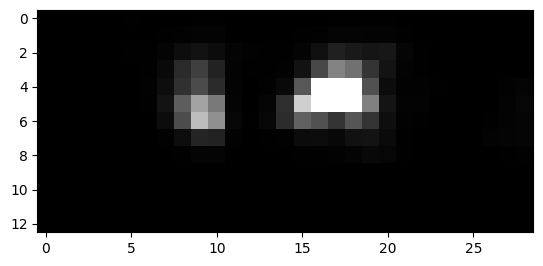

743


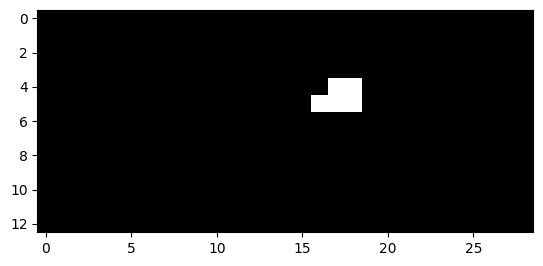

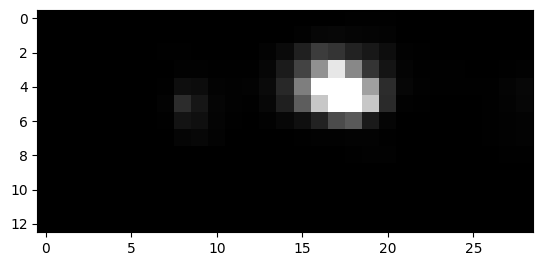

744


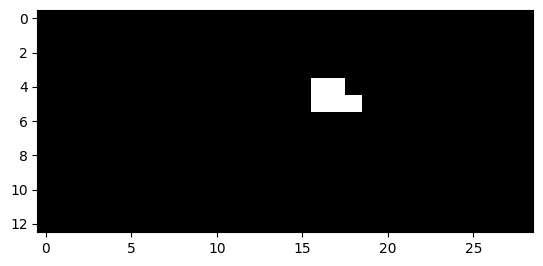

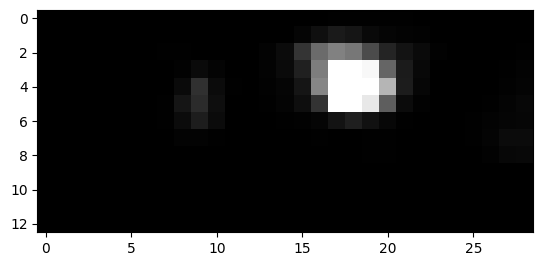

745


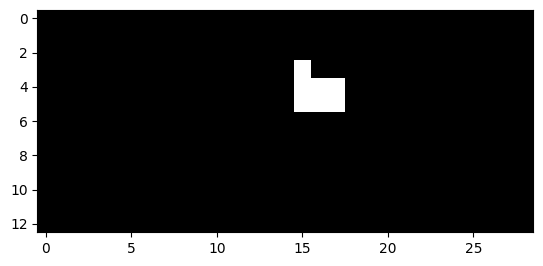

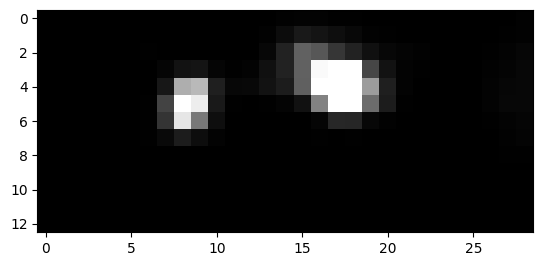

746


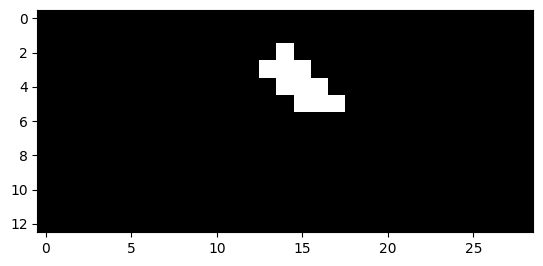

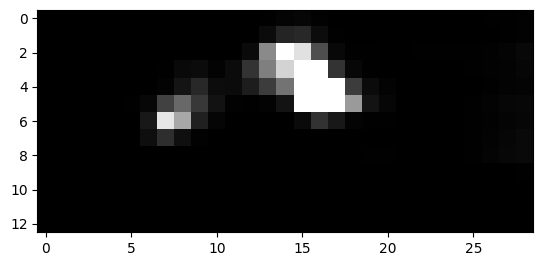

747


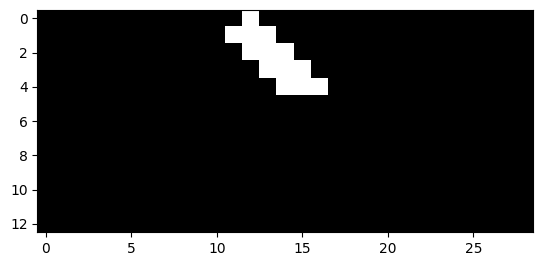

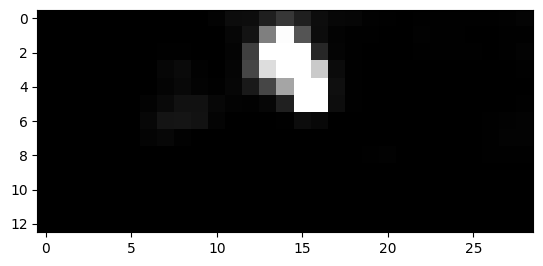

748


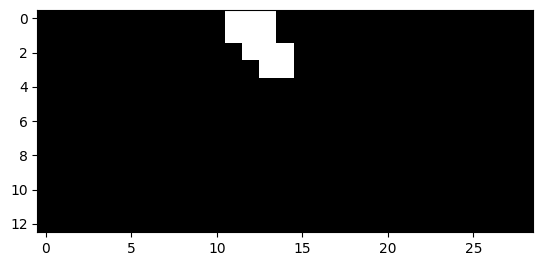

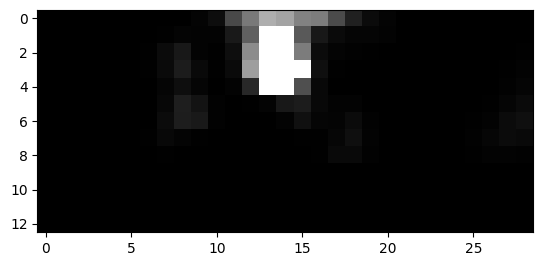

749


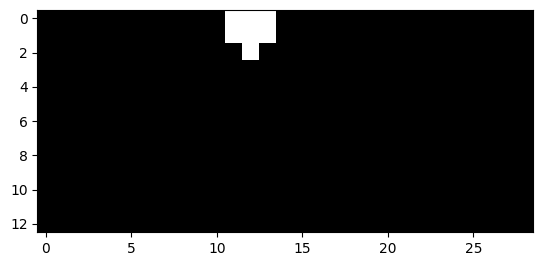

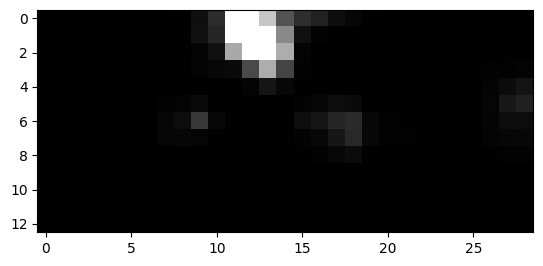

755


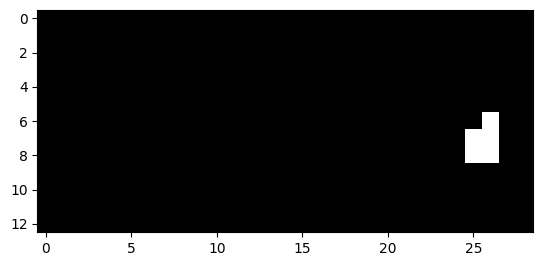

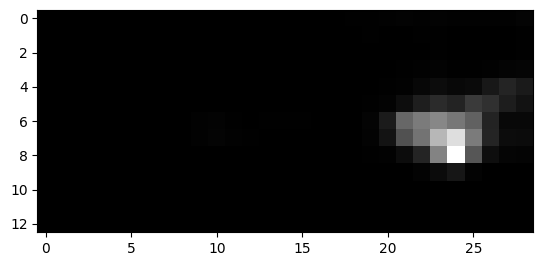

756


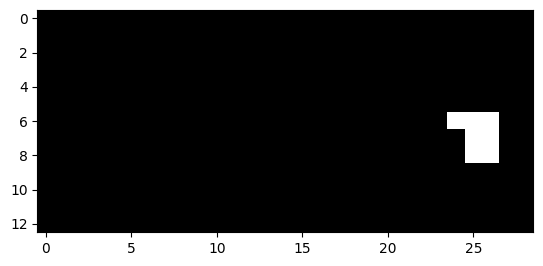

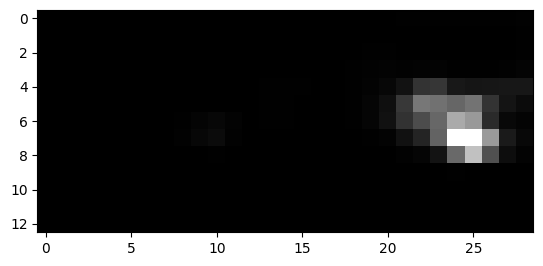

757


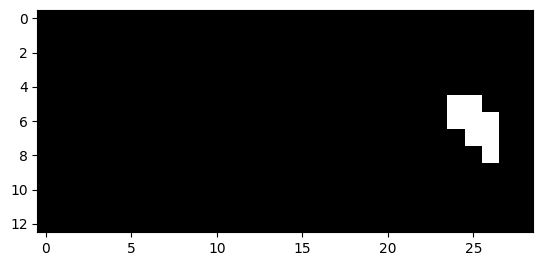

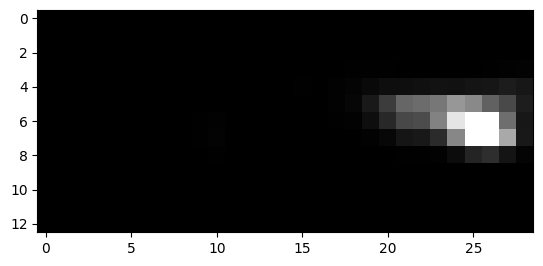

758


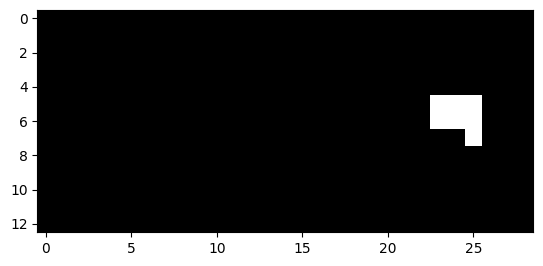

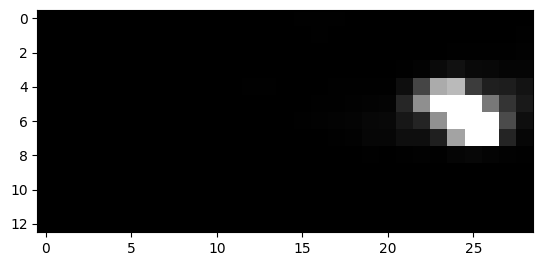

759


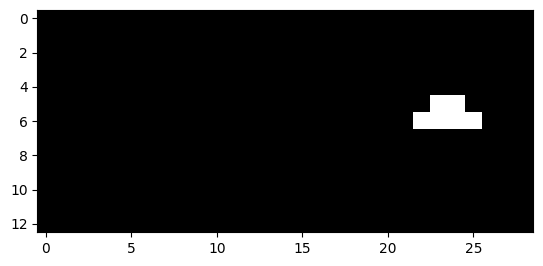

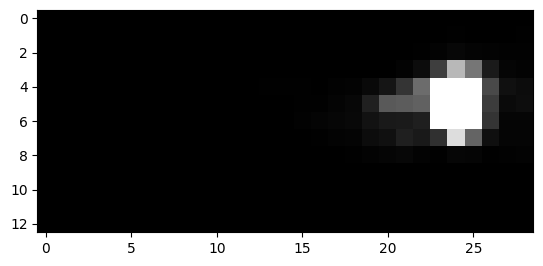

760


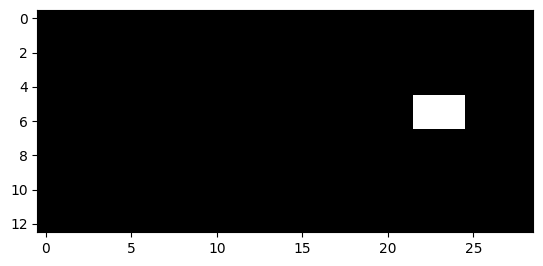

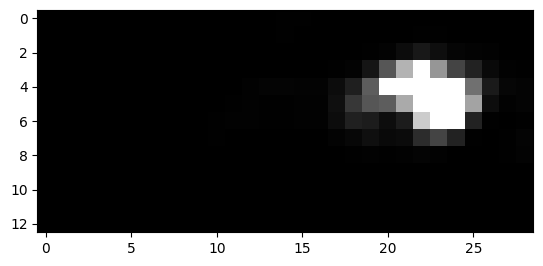

761


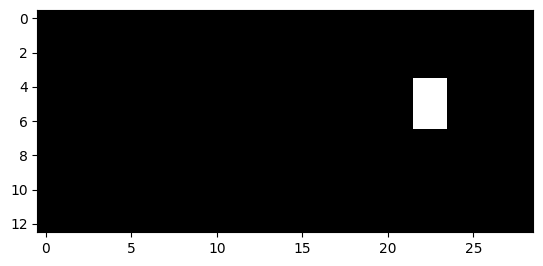

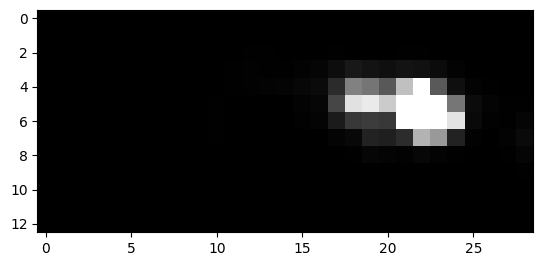

762


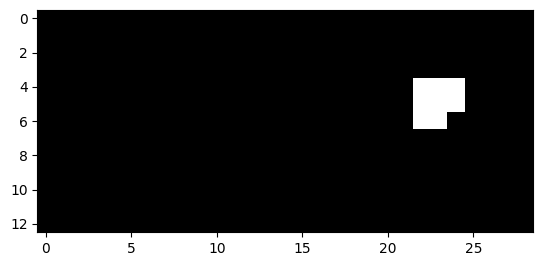

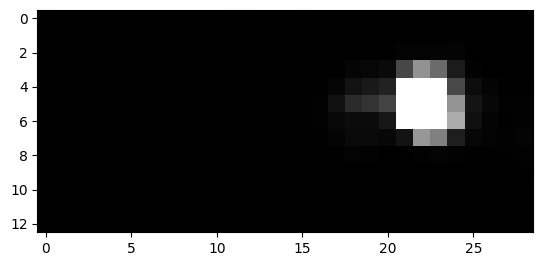

763


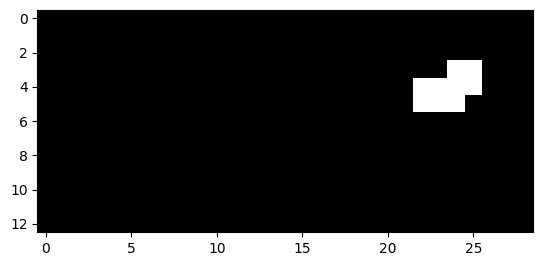

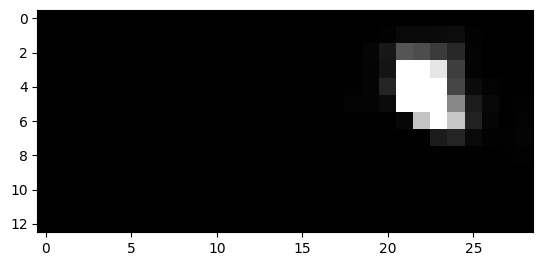

764


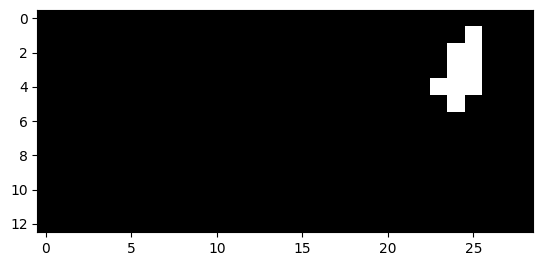

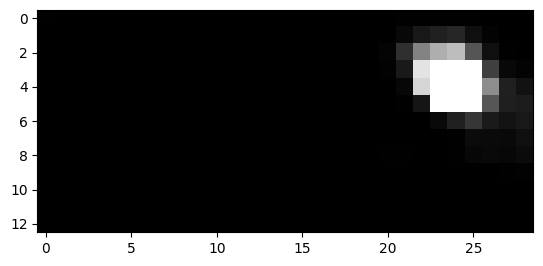

765


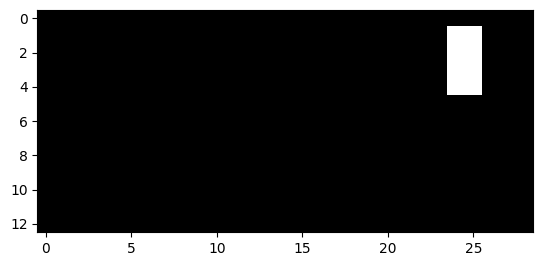

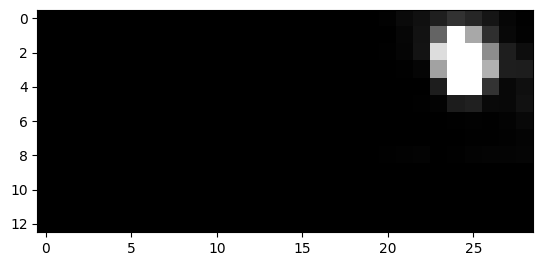

766


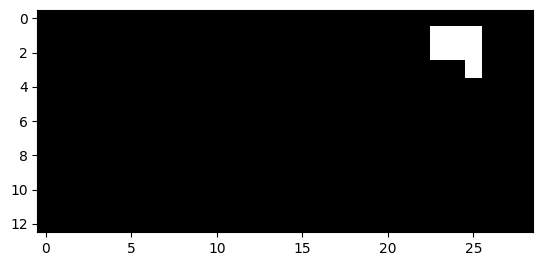

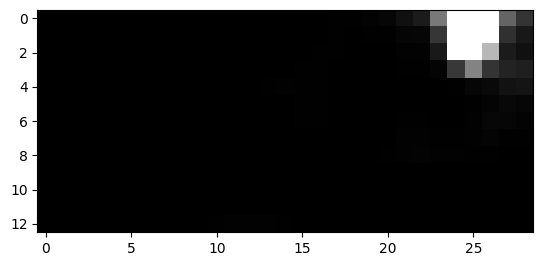

767


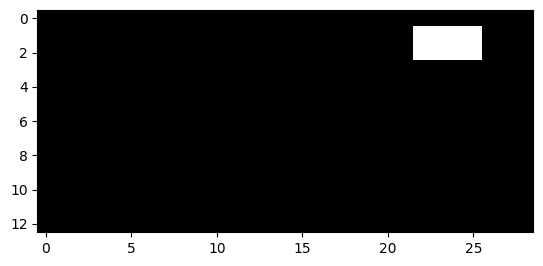

768


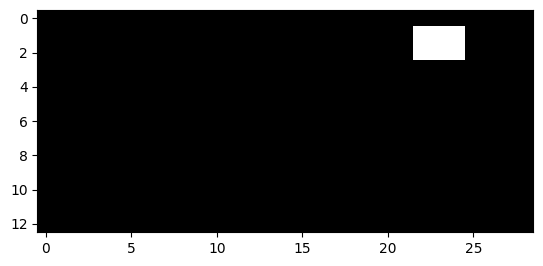

789


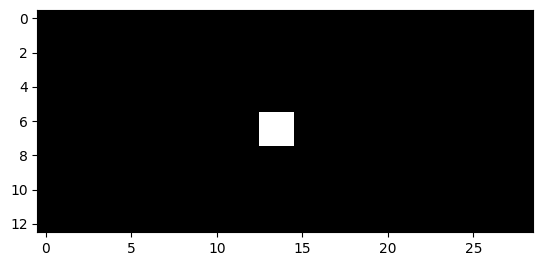

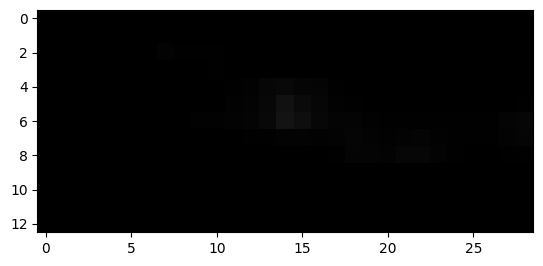

790


791


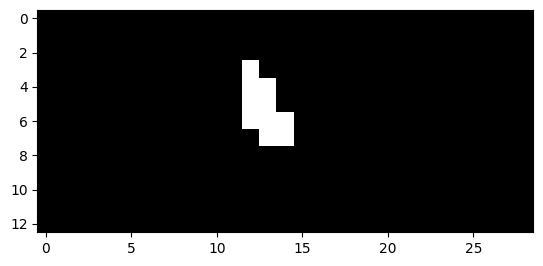

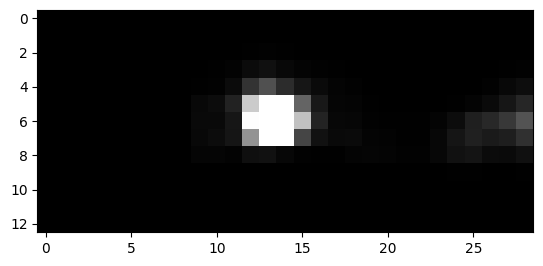

792


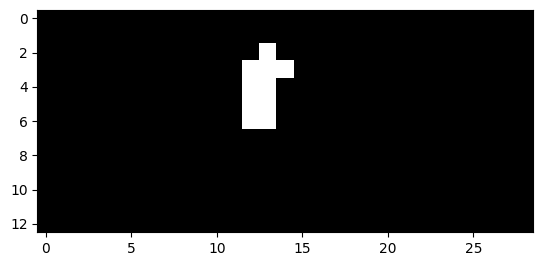

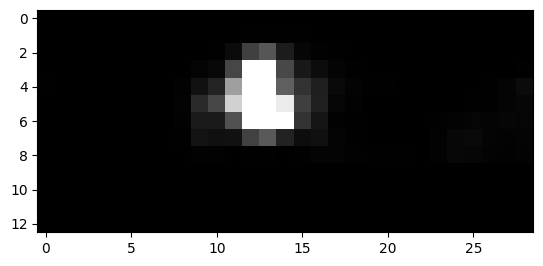

793


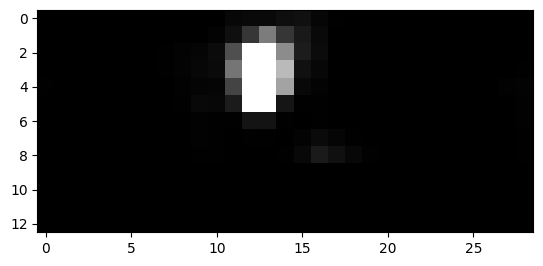

794


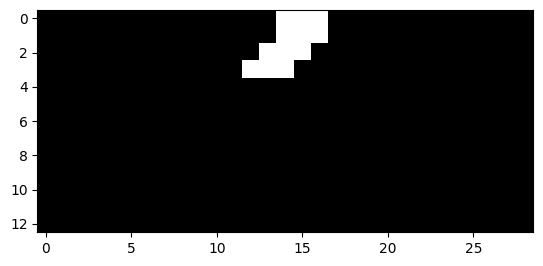

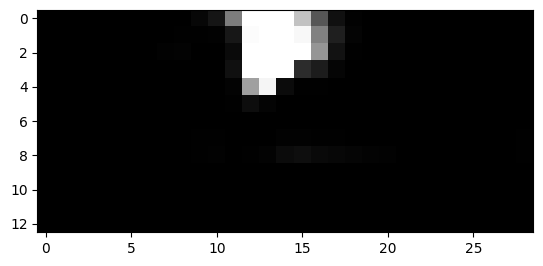

795


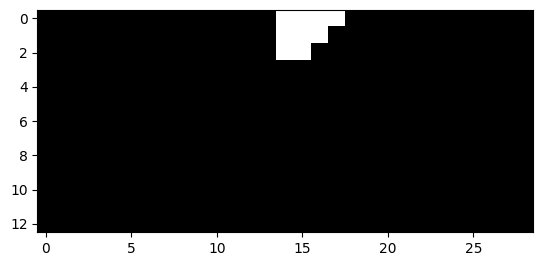

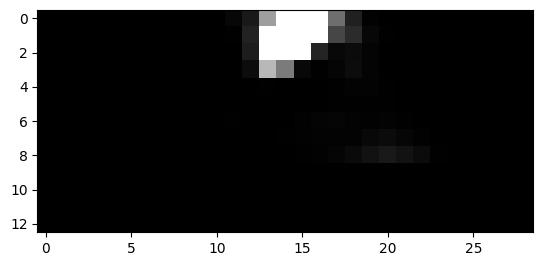

796


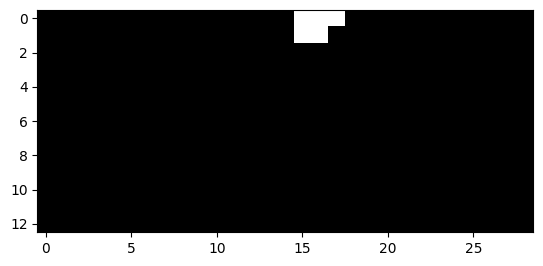

801


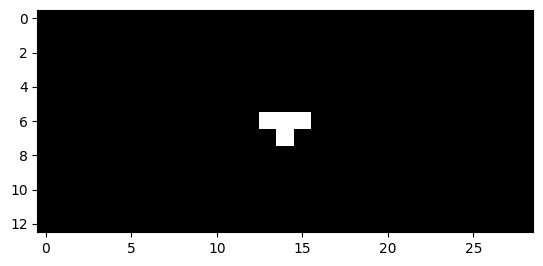

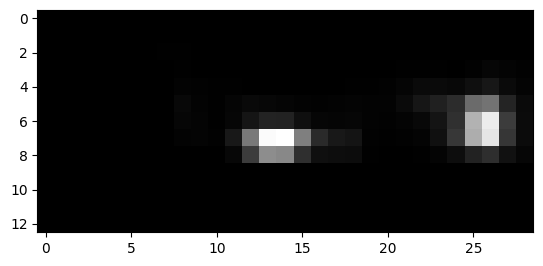

802


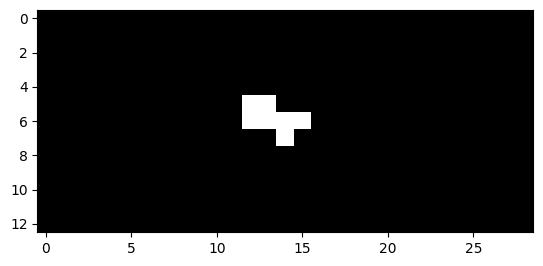

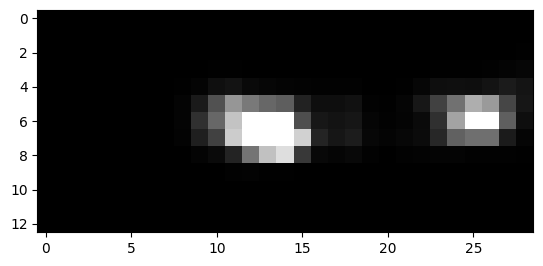

803


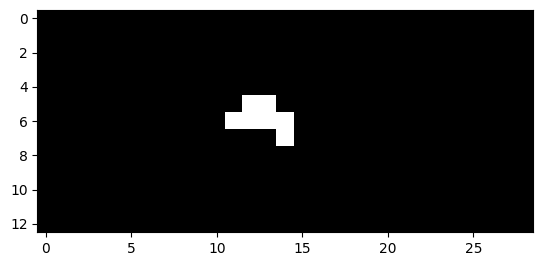

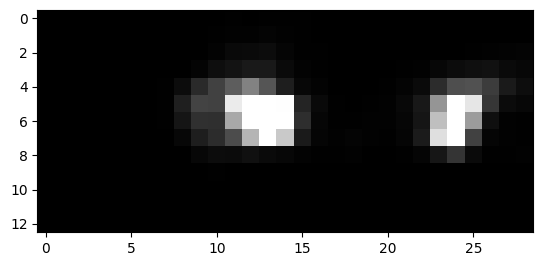

804


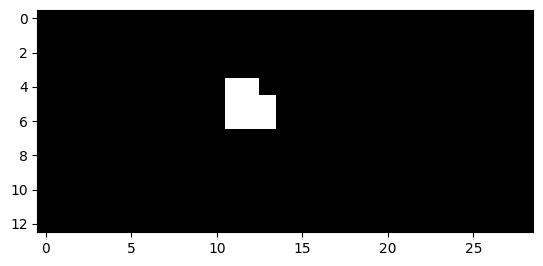

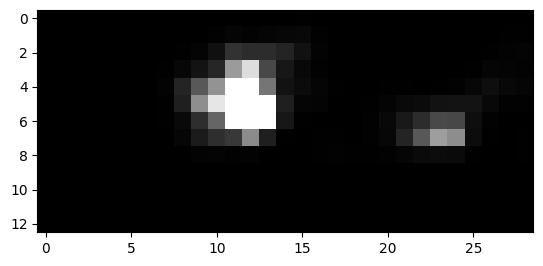

805


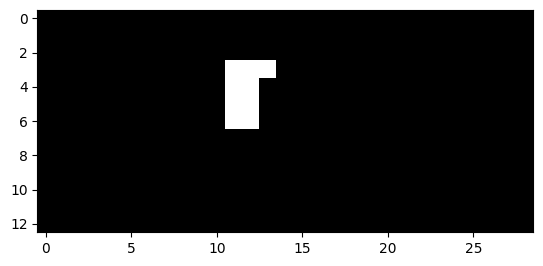

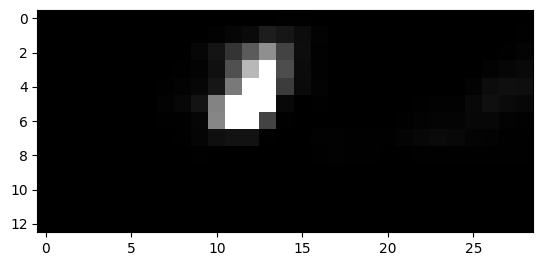

806


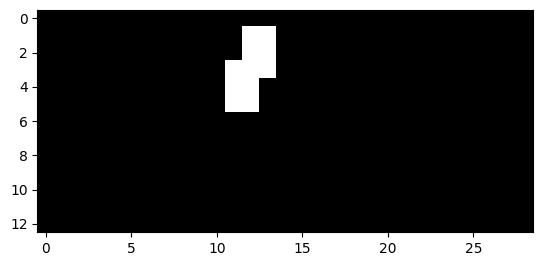

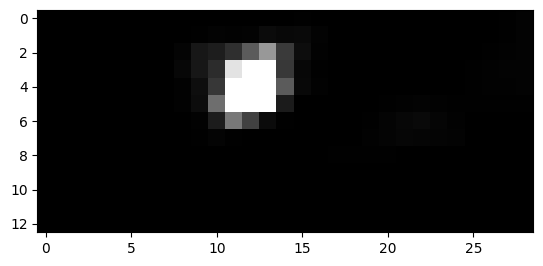

807


808


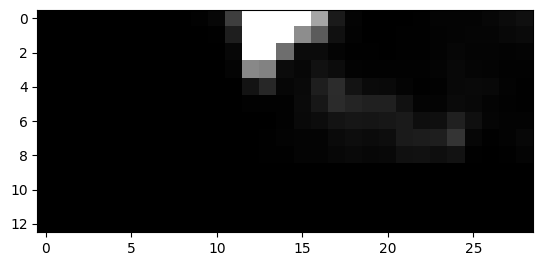

809


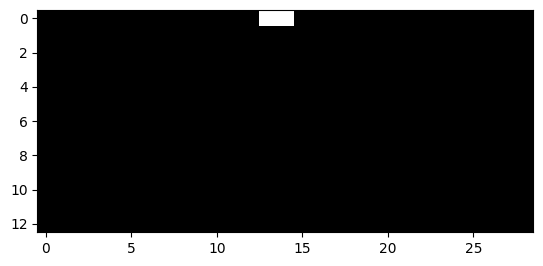

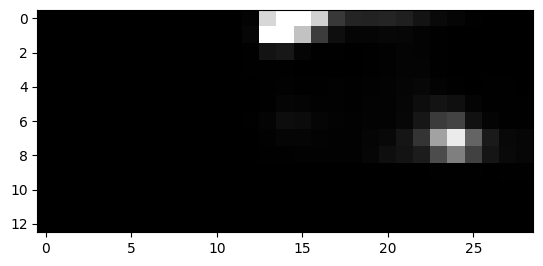

841


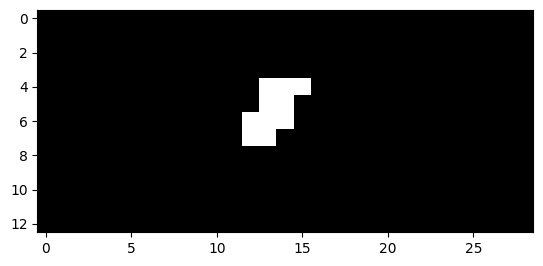

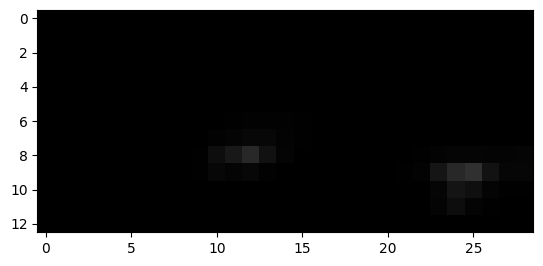

842


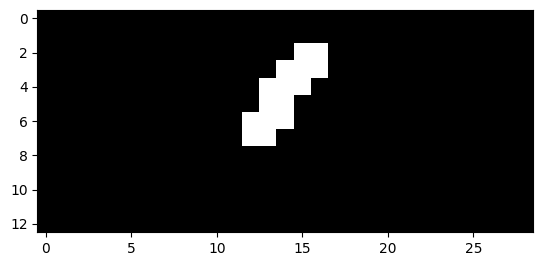

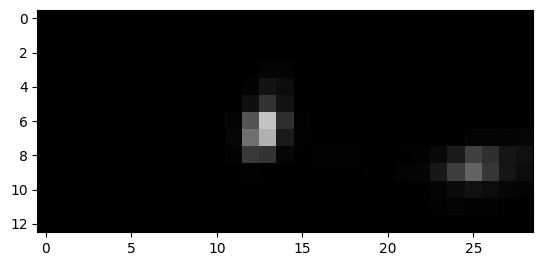

843


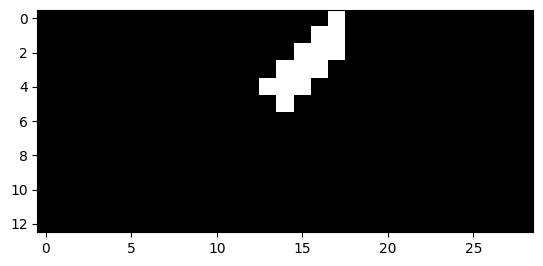

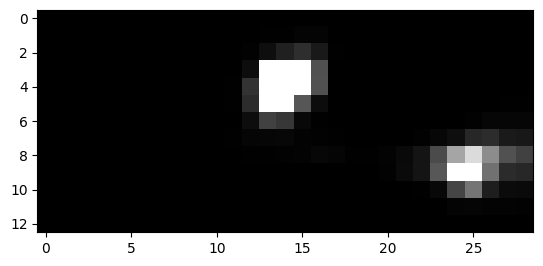

844


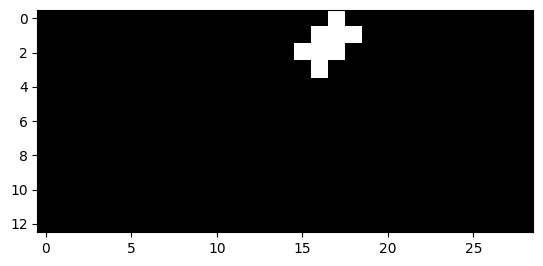

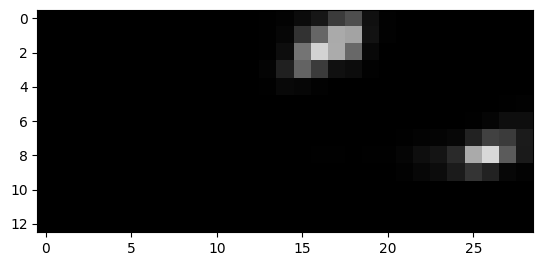

845


846


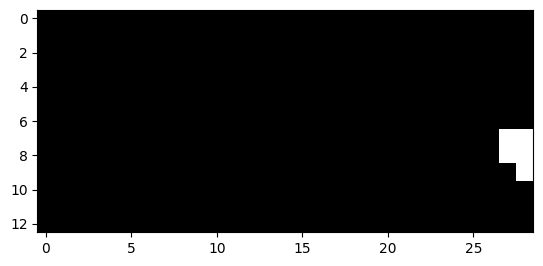

847


848


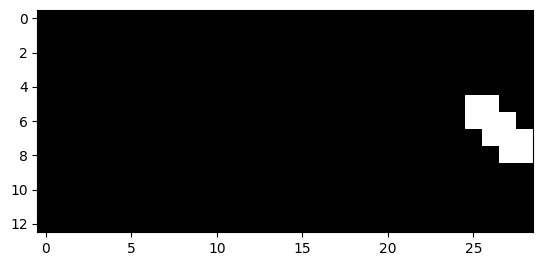

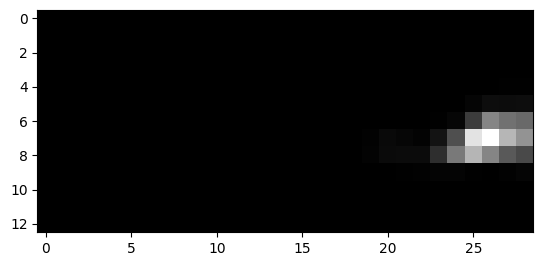

849


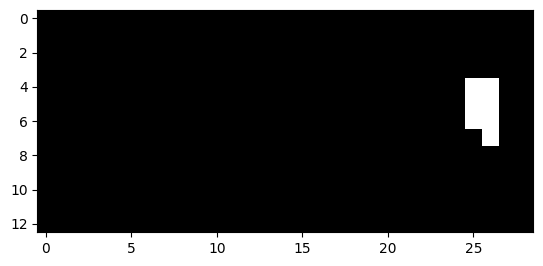

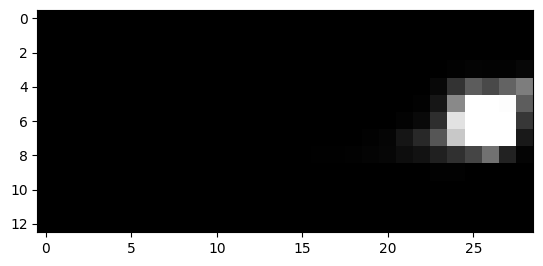

850


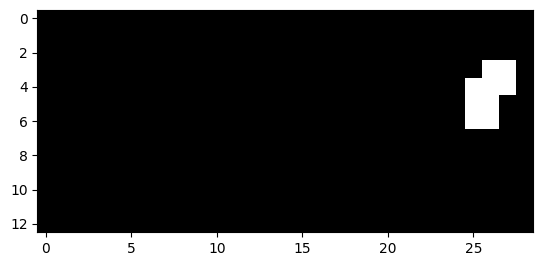

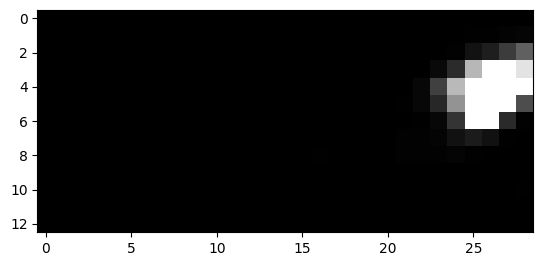

851


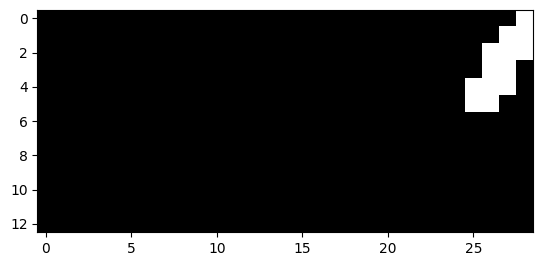

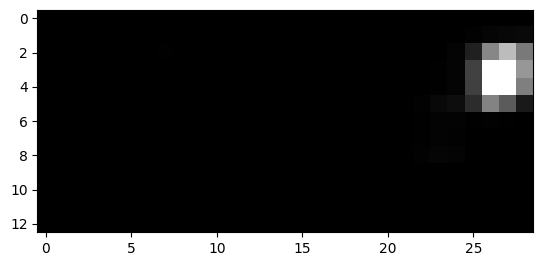

852


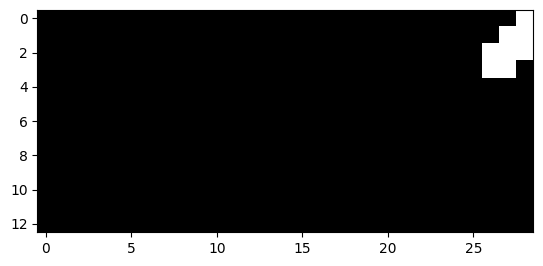

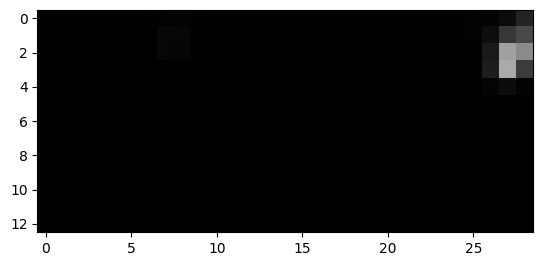

853


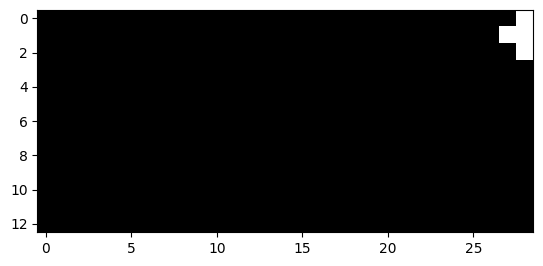

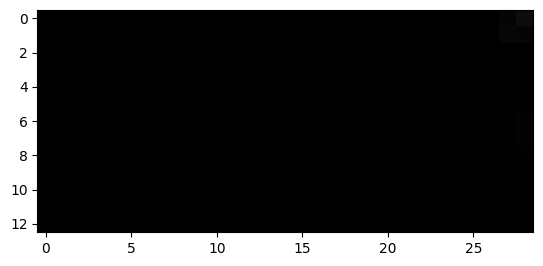

986


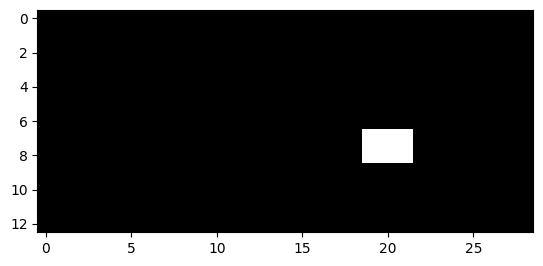

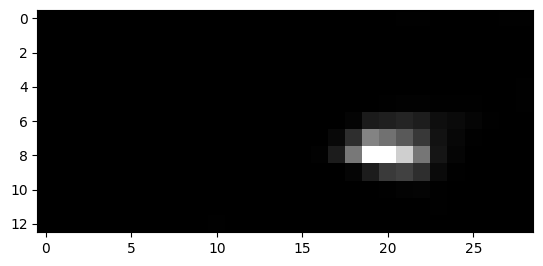

987


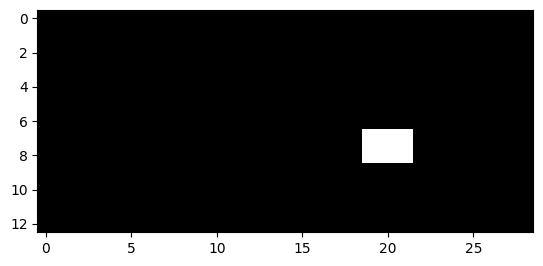

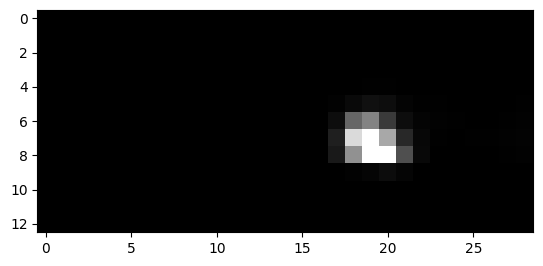

1038


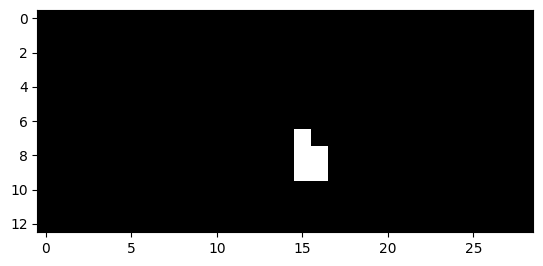

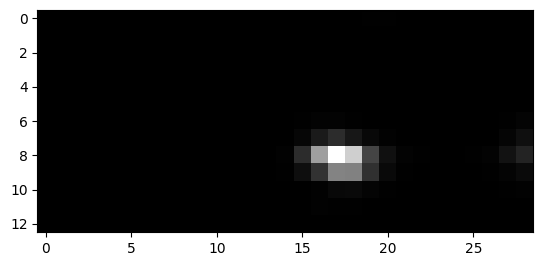

1039


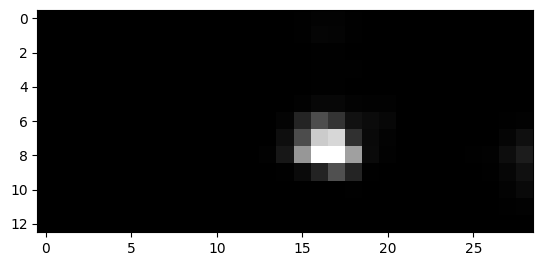

1040


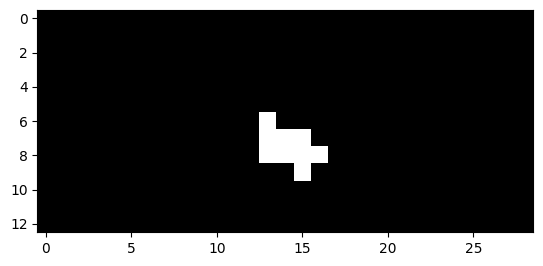

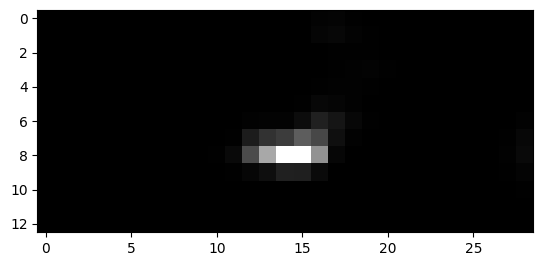

1041


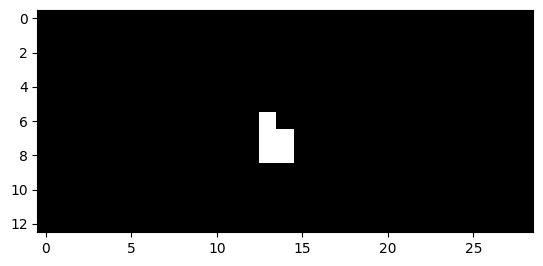

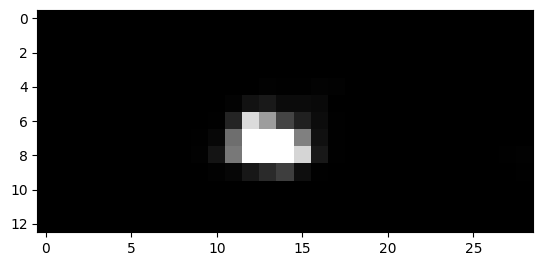

1042


1043


1044


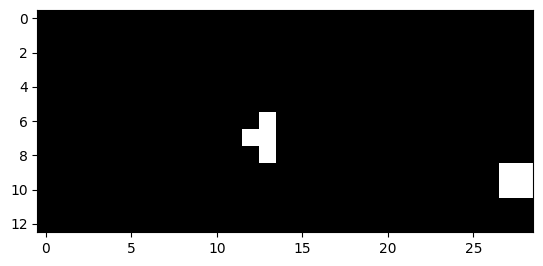

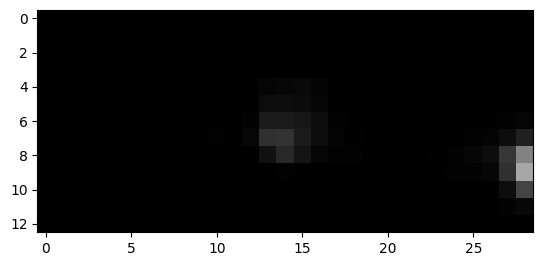

1045


1049


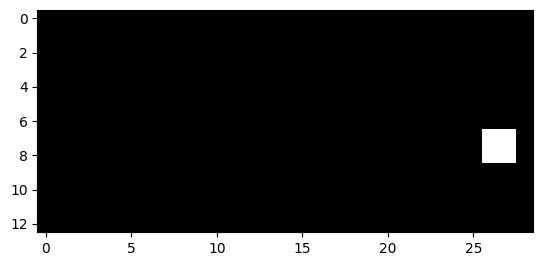

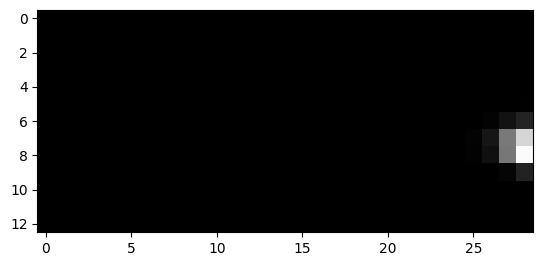

1050


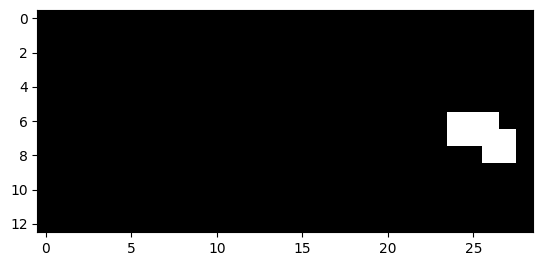

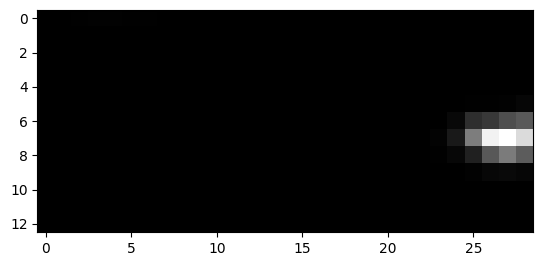

1051


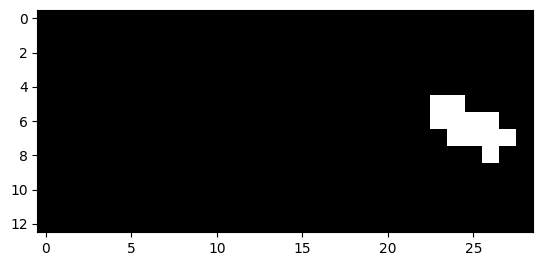

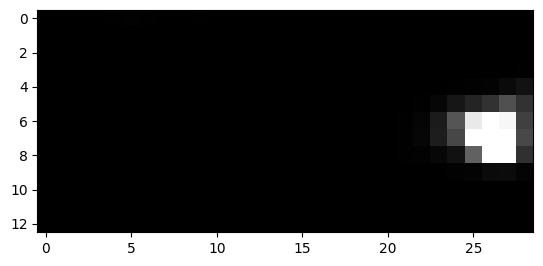

1052


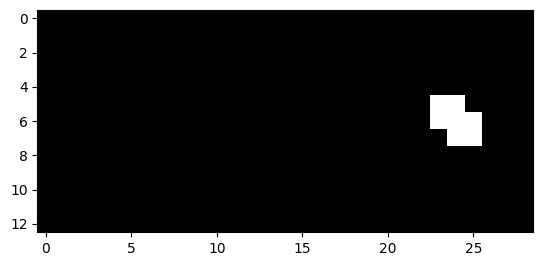

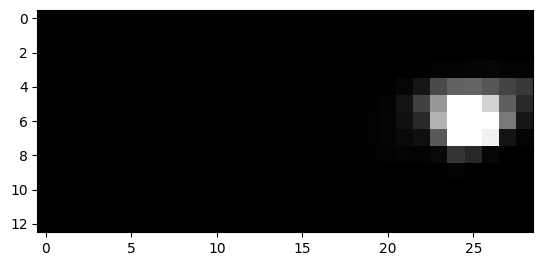

1077


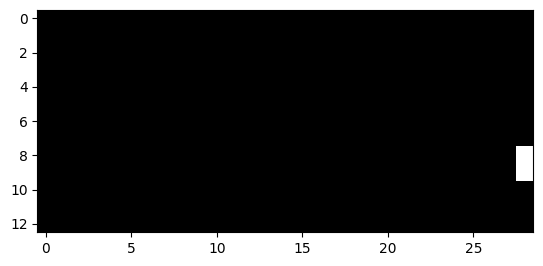

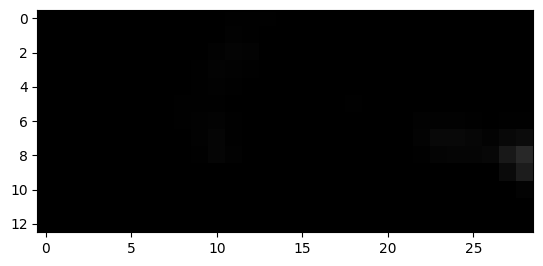

1078


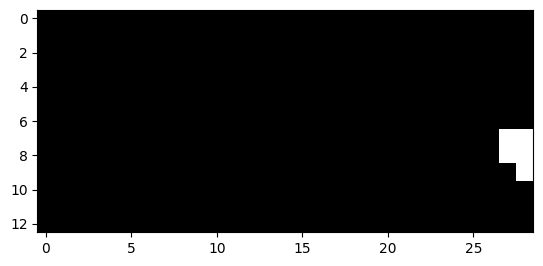

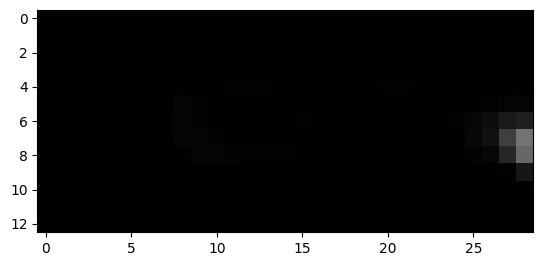

1079


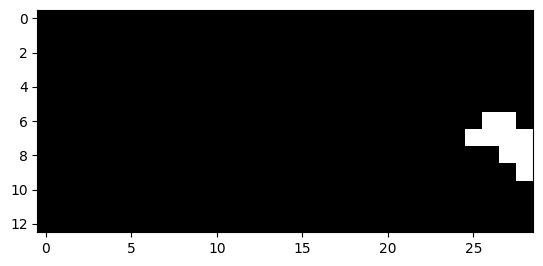

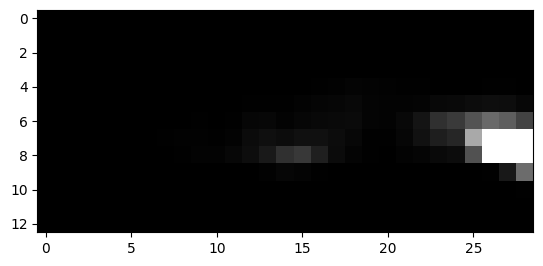

1080


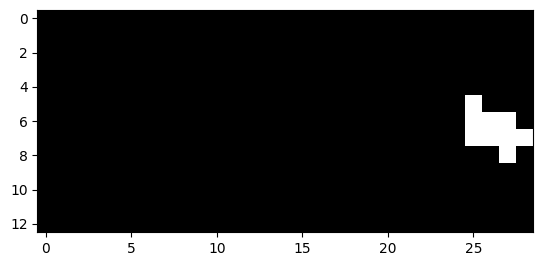

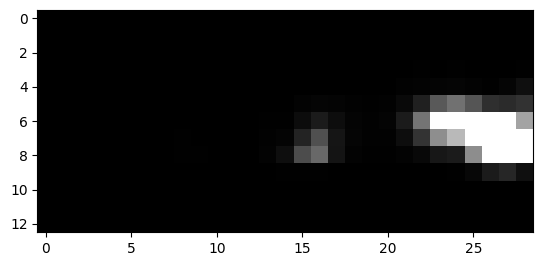

1081


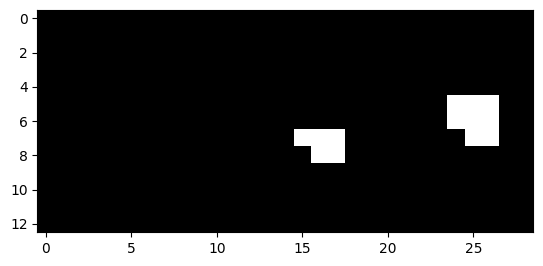

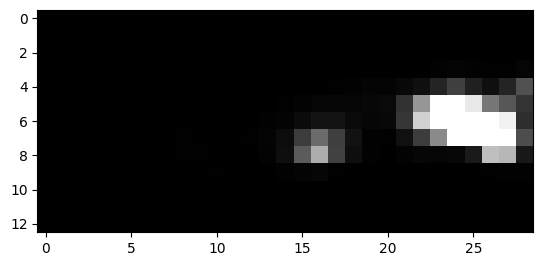

1082


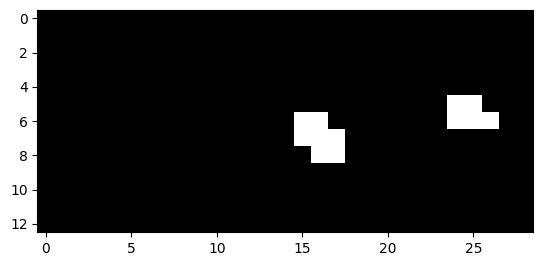

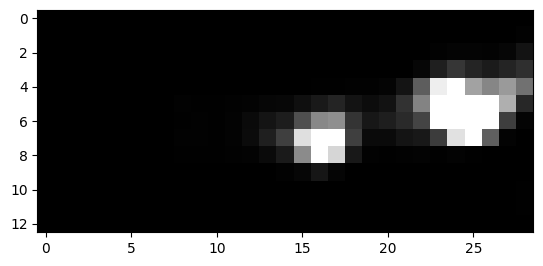

1083


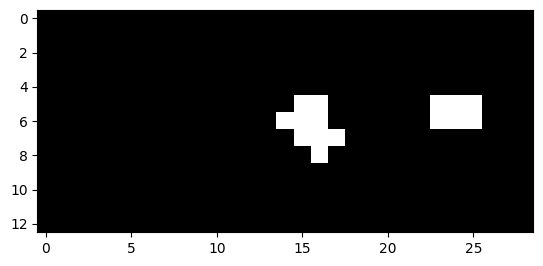

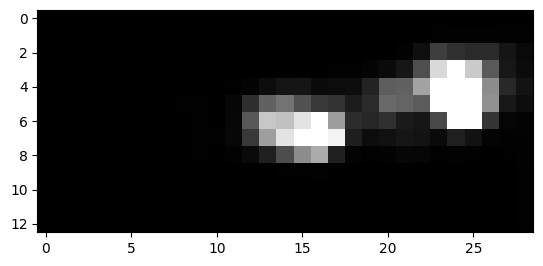

1084


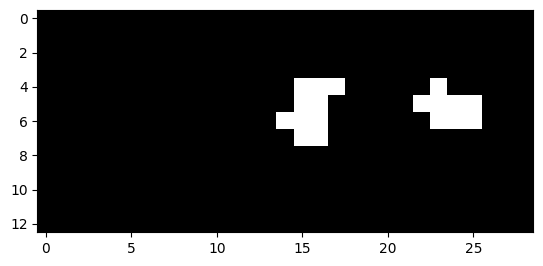

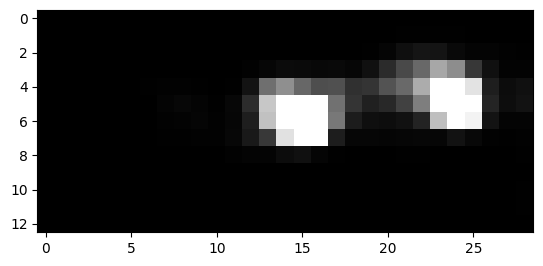

1085


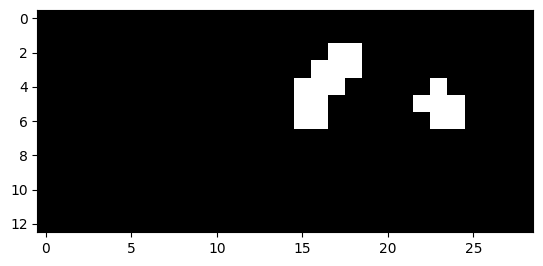

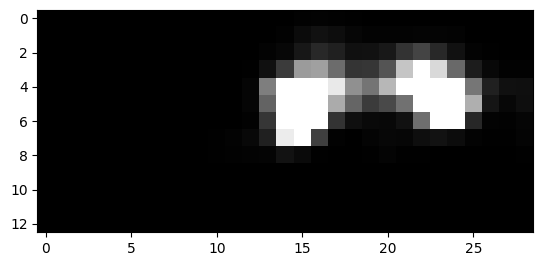

1086


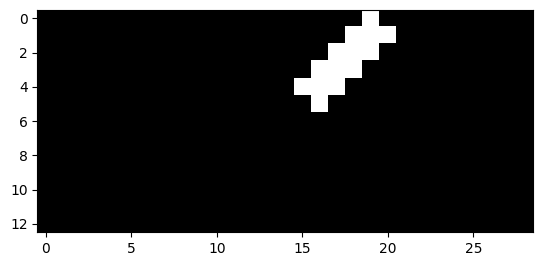

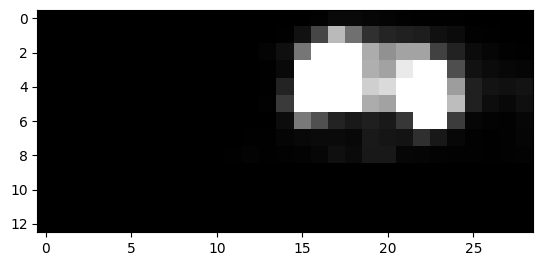

1087


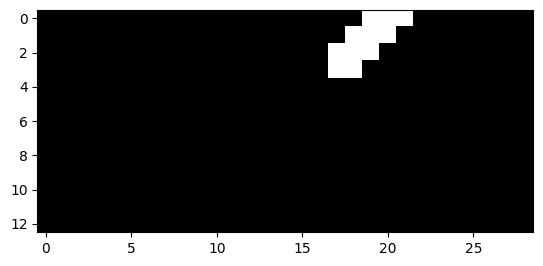

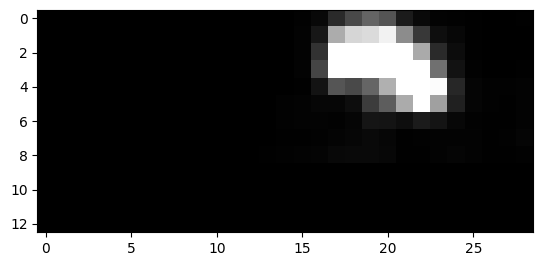

1088


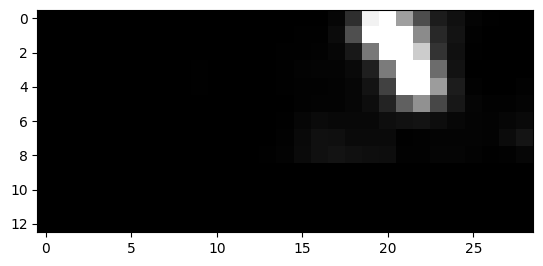

1113


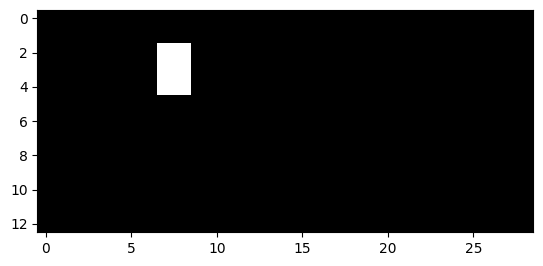

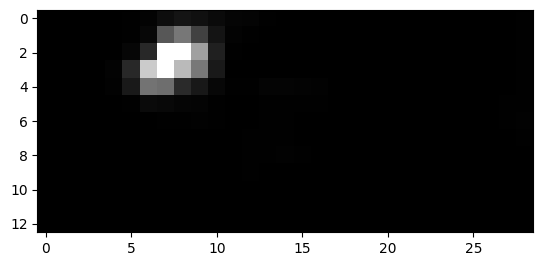

1114


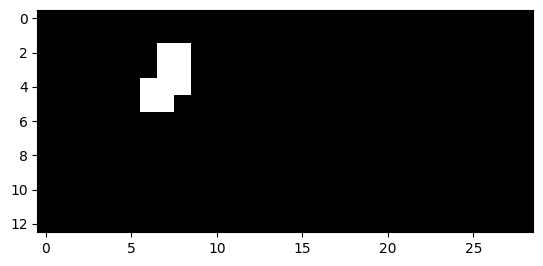

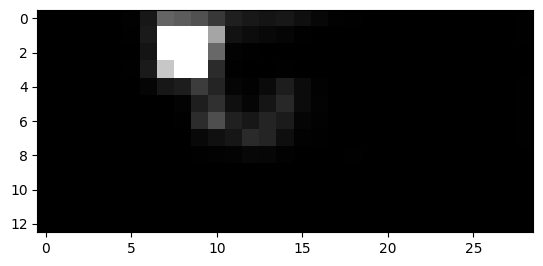

1115


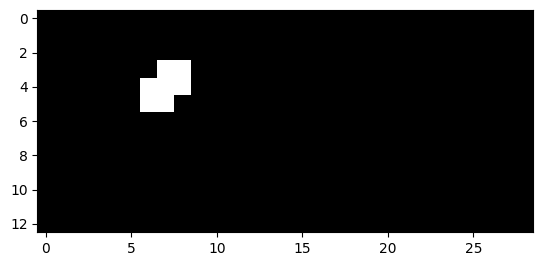

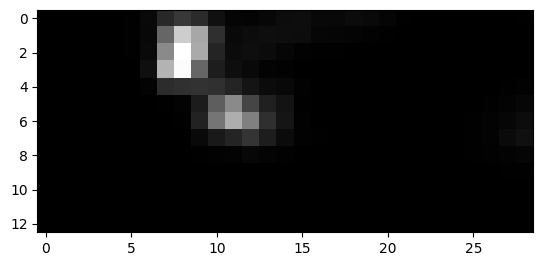

1117


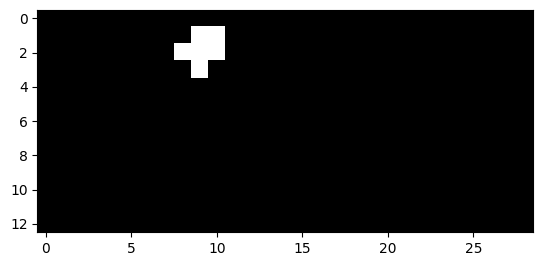

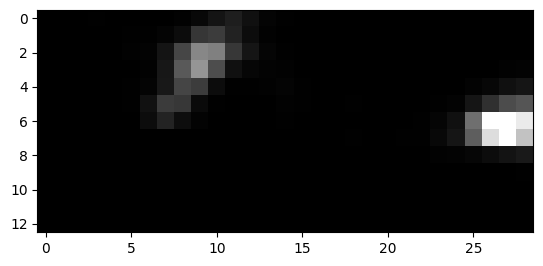

1118


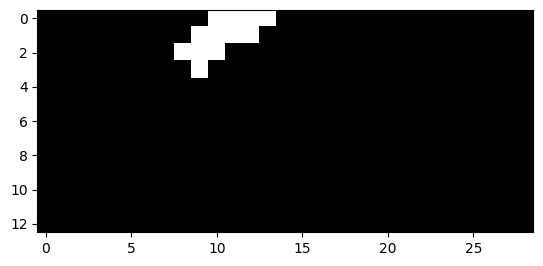

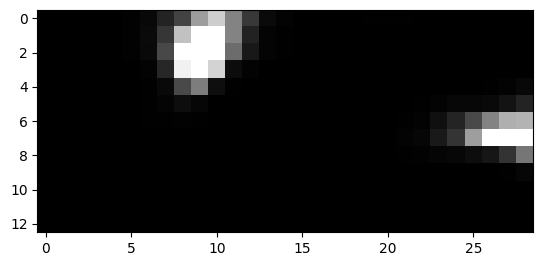

1119


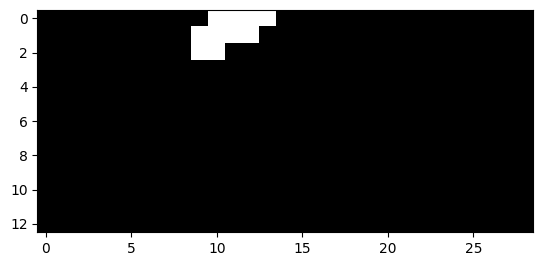

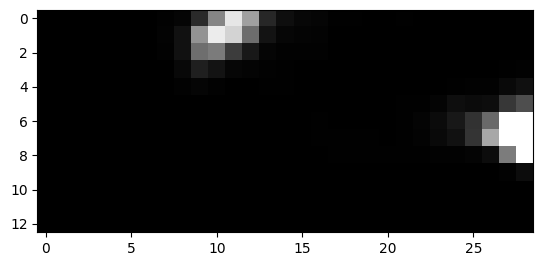

1129


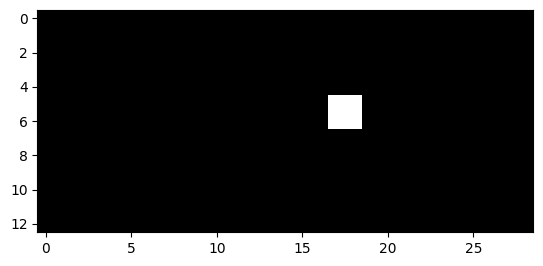

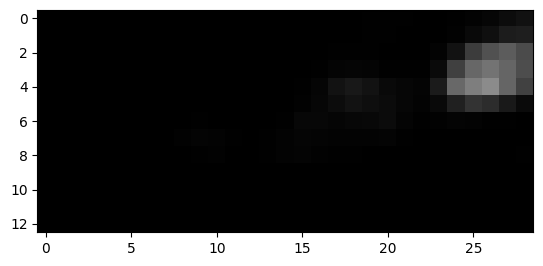

1130


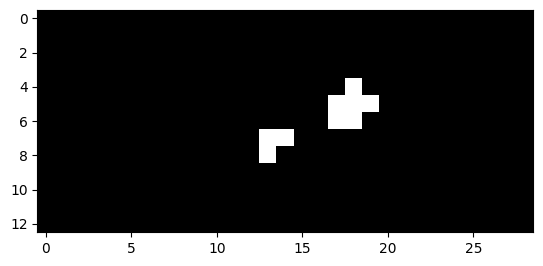

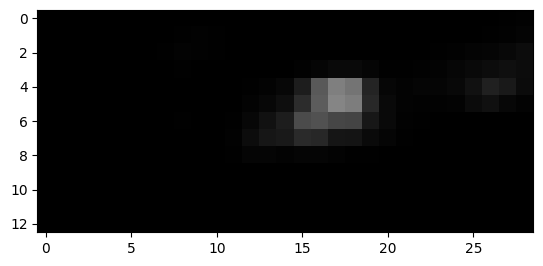

1131


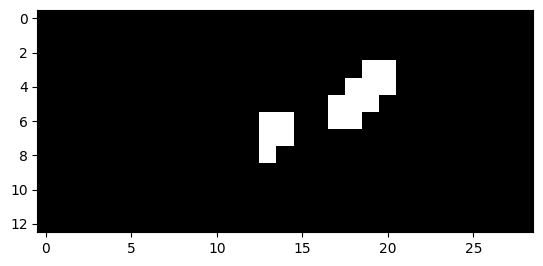

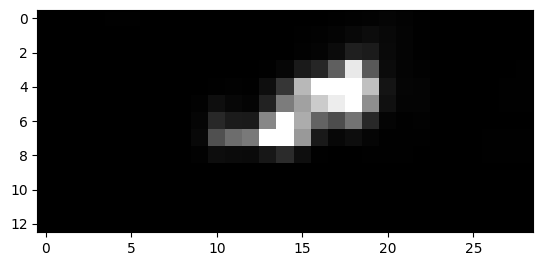

1132


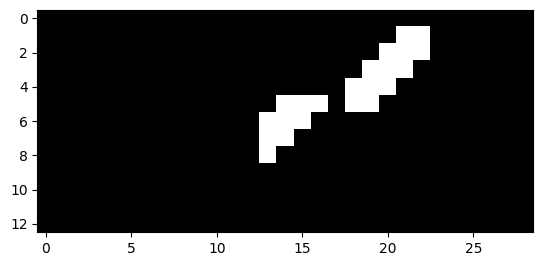

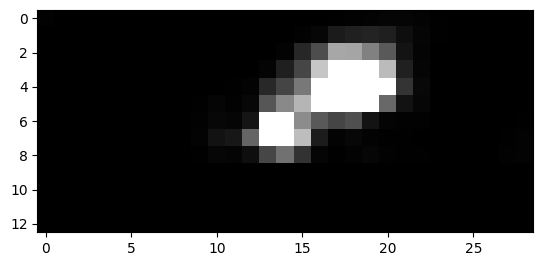

1133


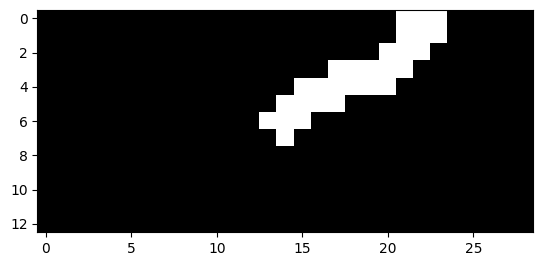

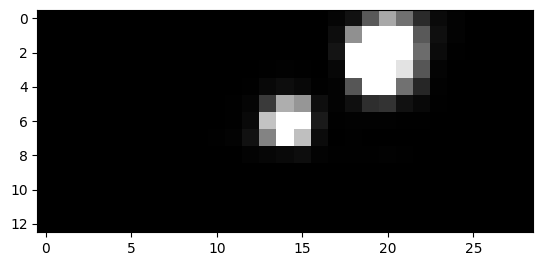

1134


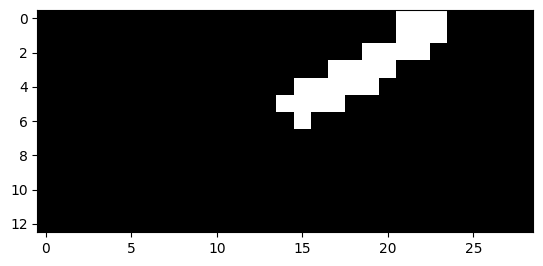

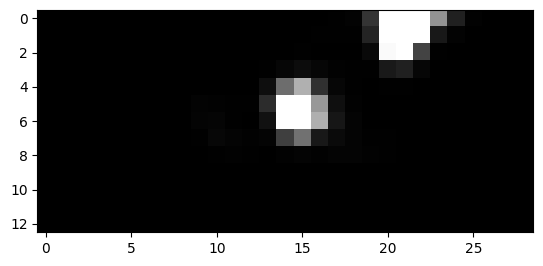

1135


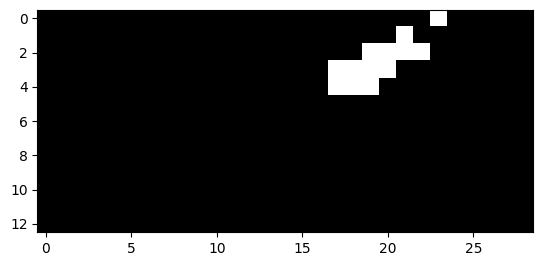

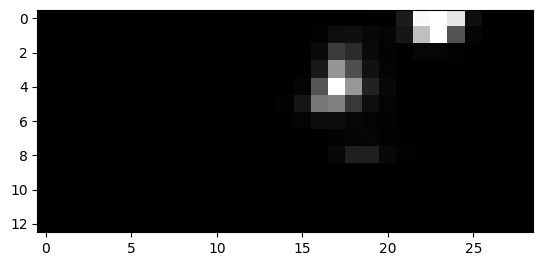

1136


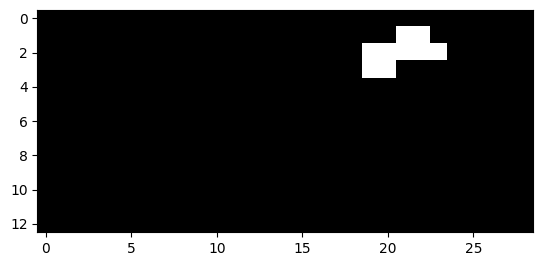

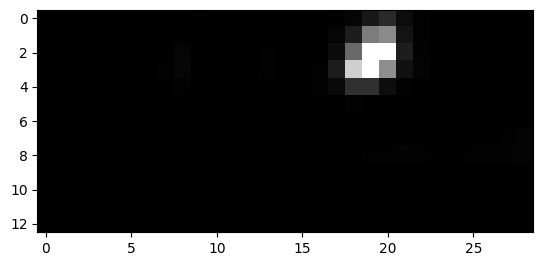

1137


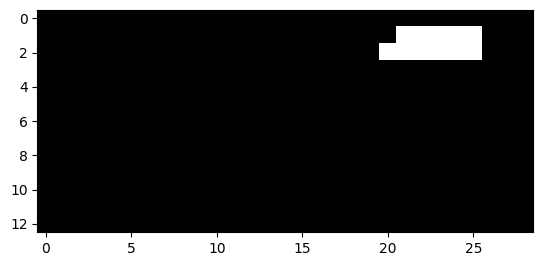

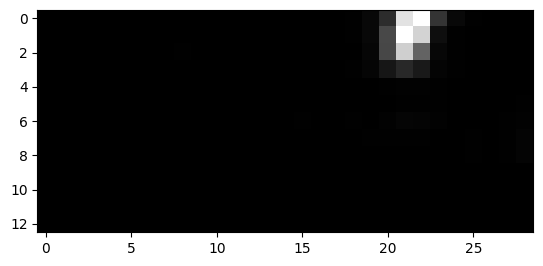

1138


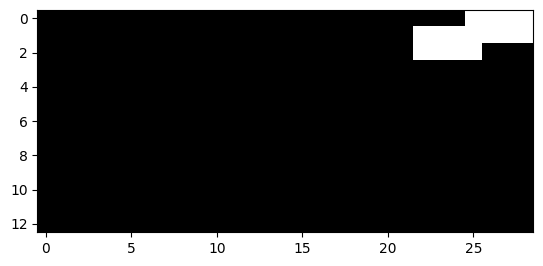

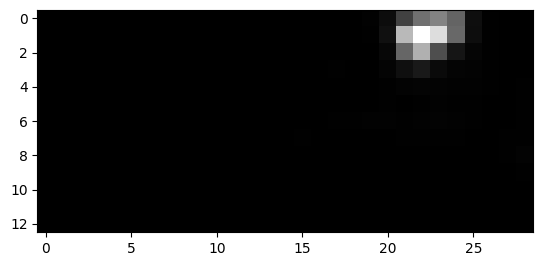

1139


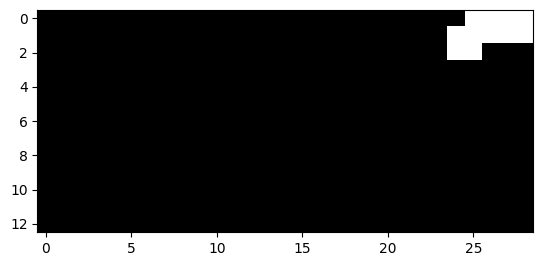

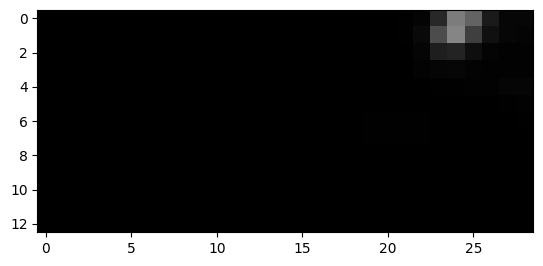

1140


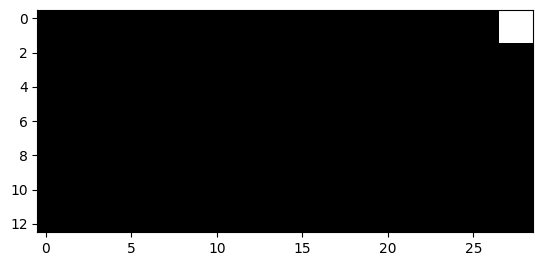

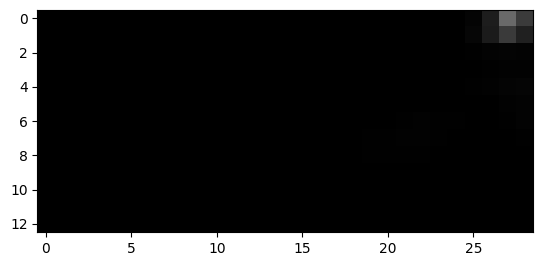

1154


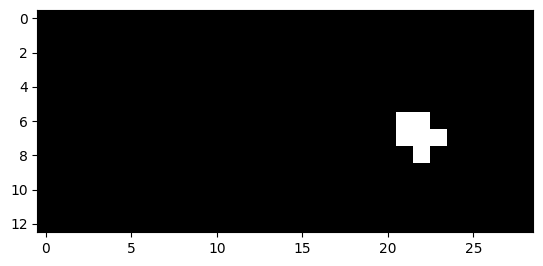

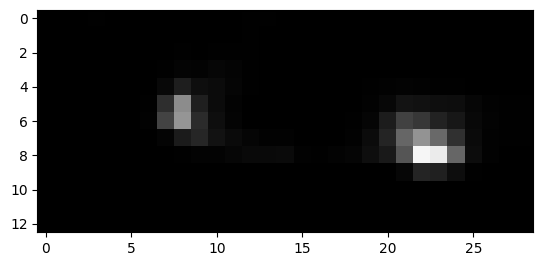

1155


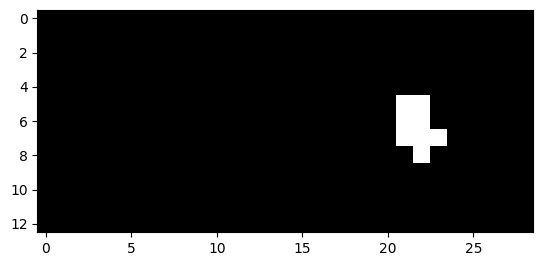

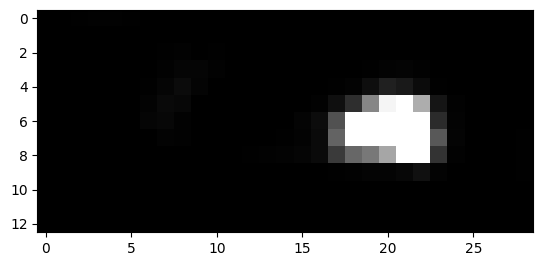

1156


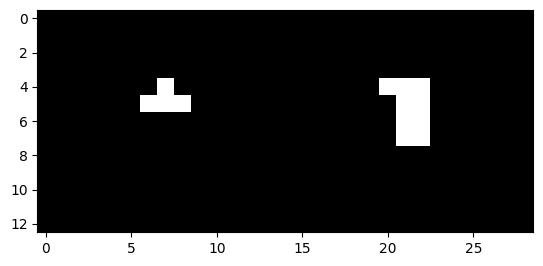

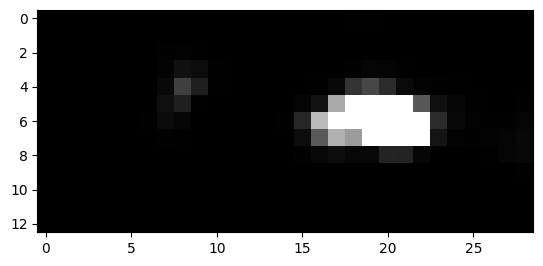

1157


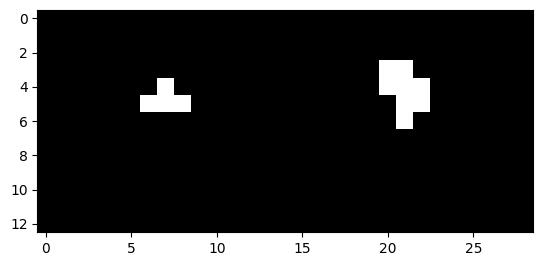

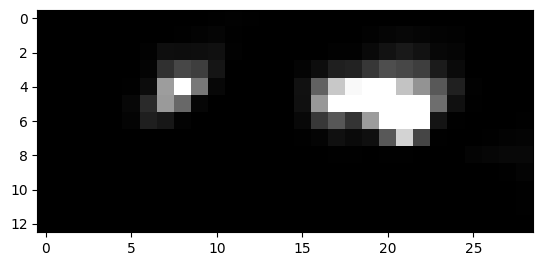

1158


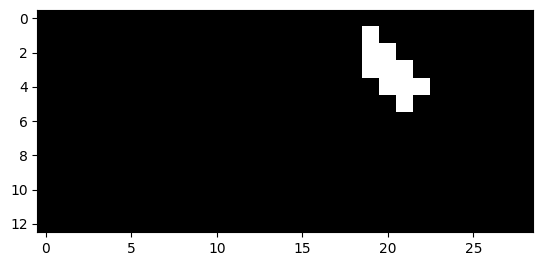

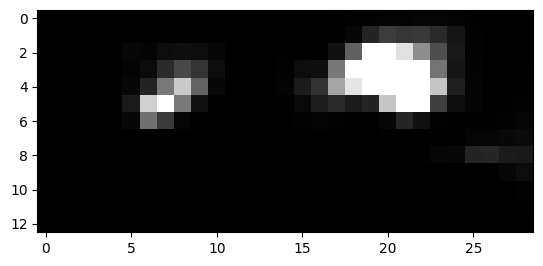

1159


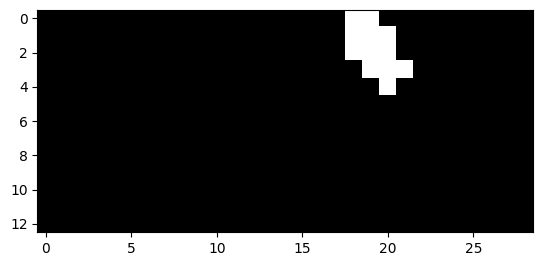

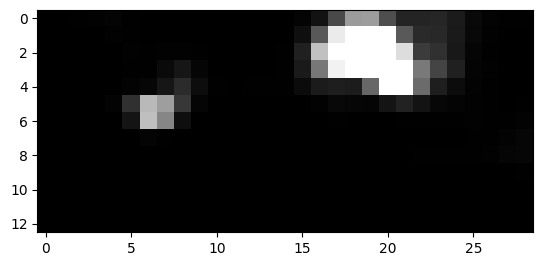

1160


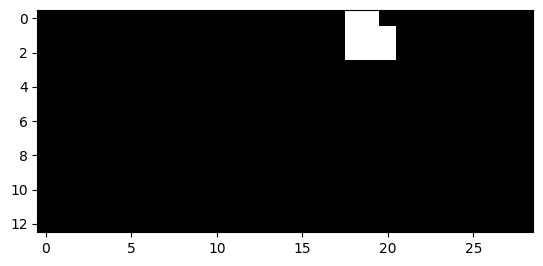

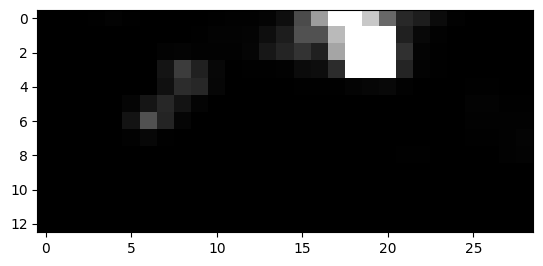

1161


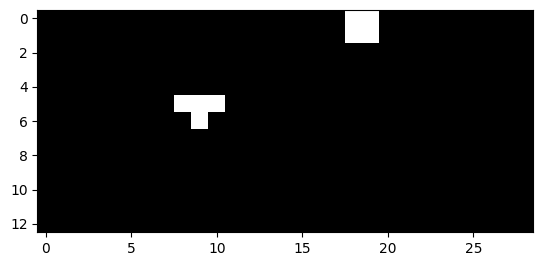

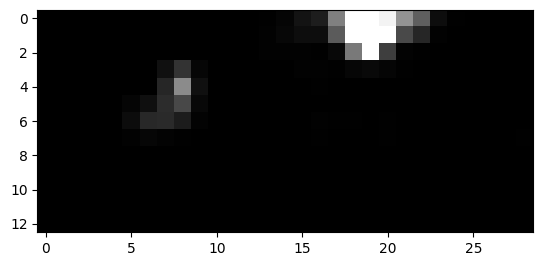

1162


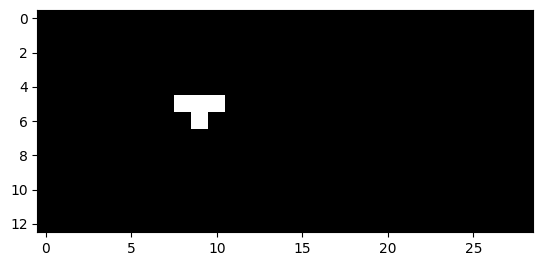

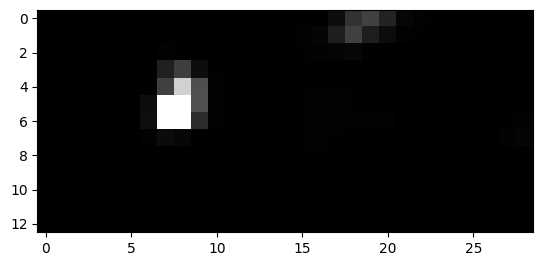

1163


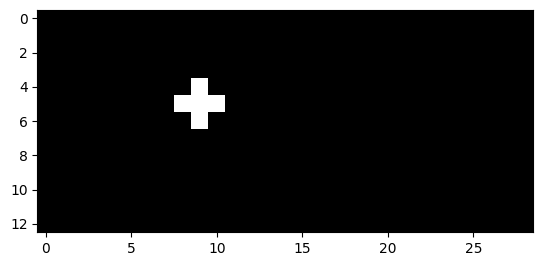

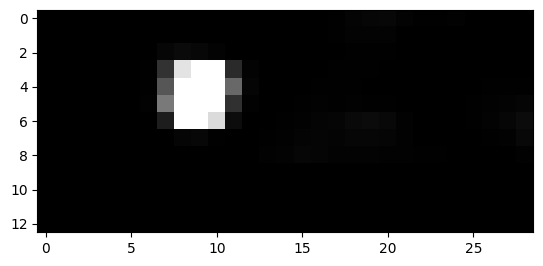

1164


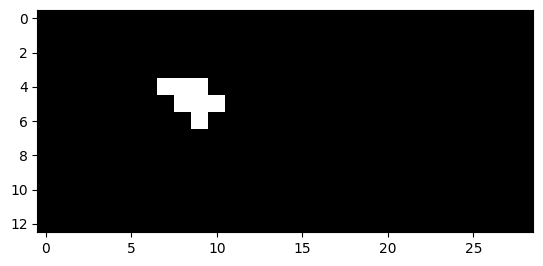

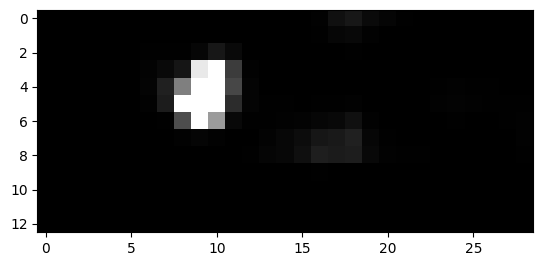

1165


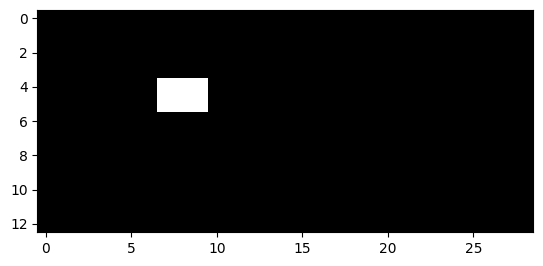

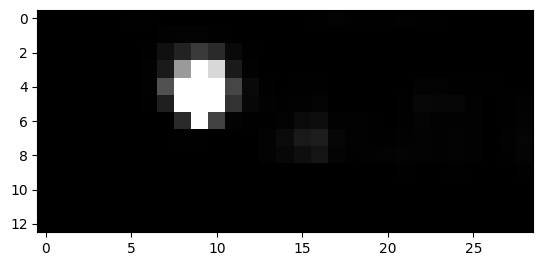

1166


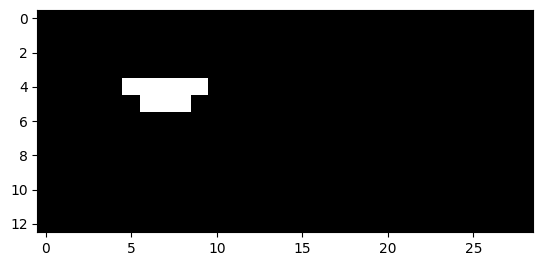

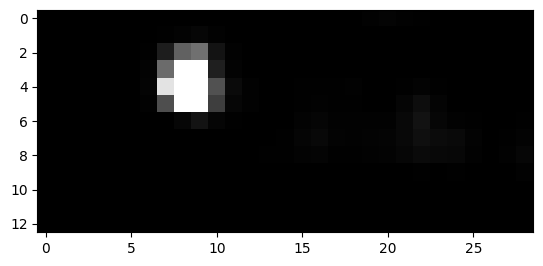

1167


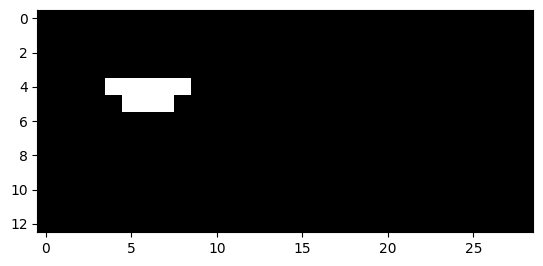

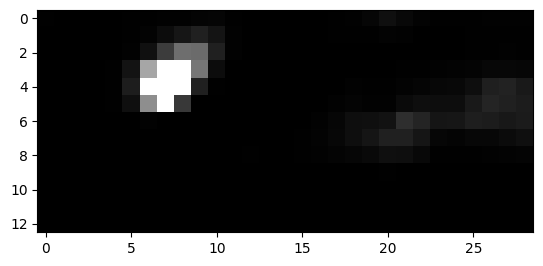

1168


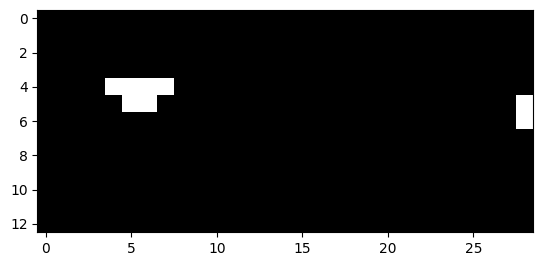

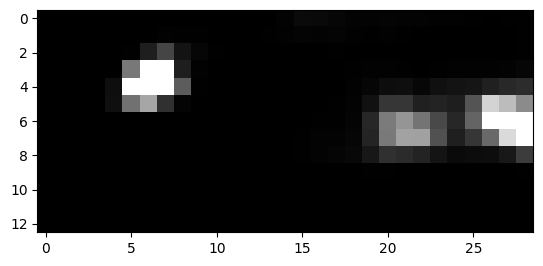

1169


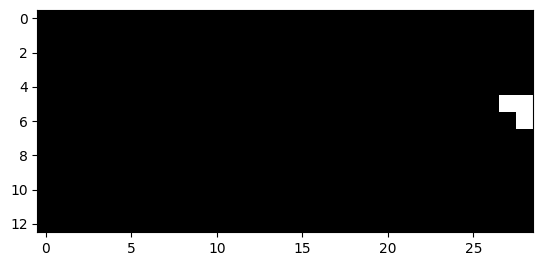

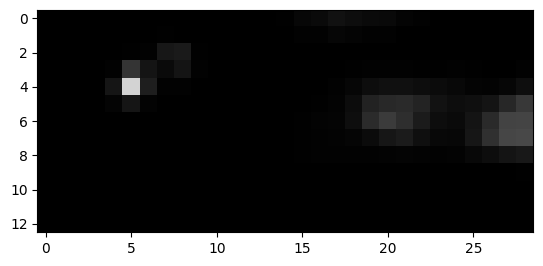

1170


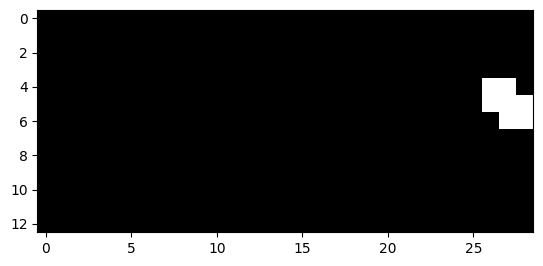

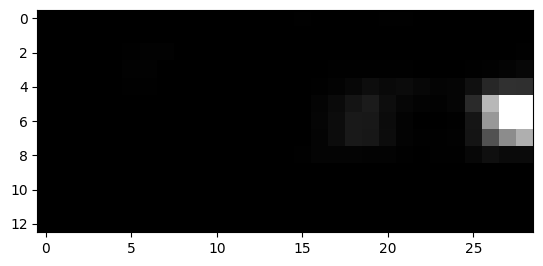

1171


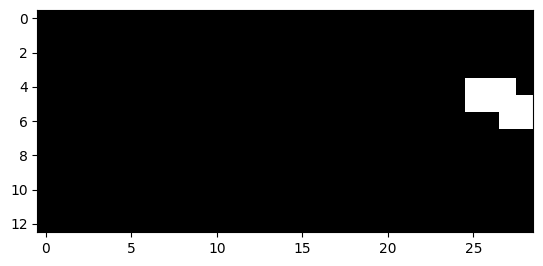

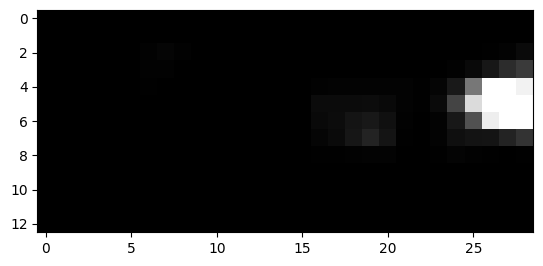

1172


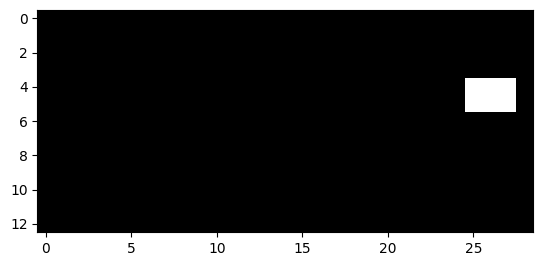

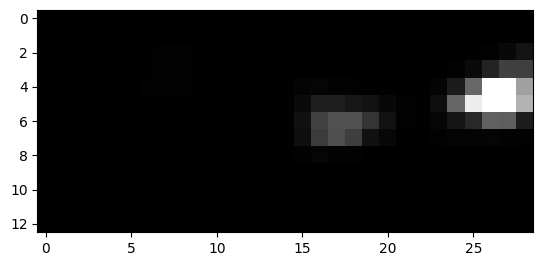

1173


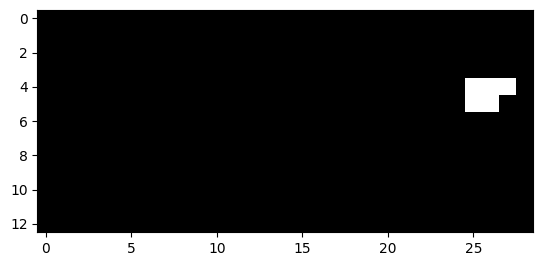

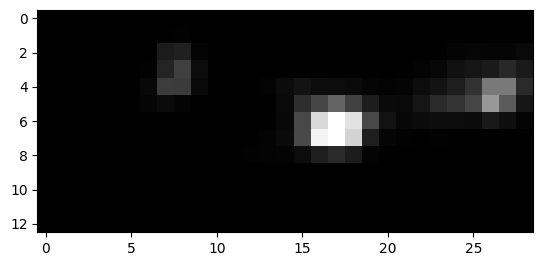

1174


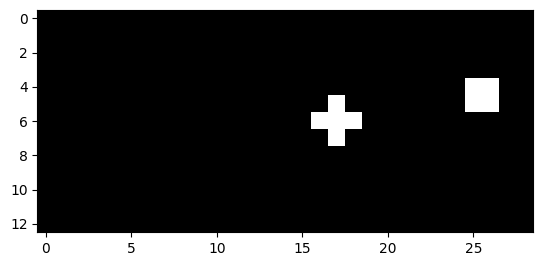

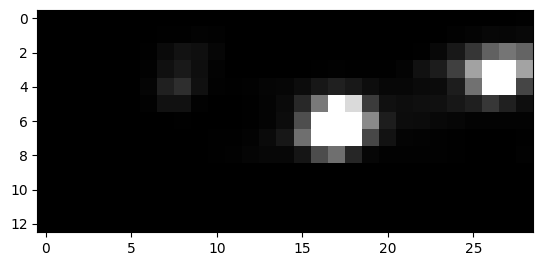

1175


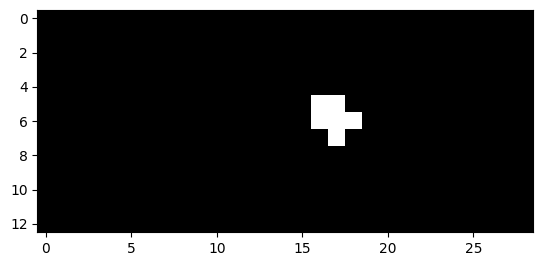

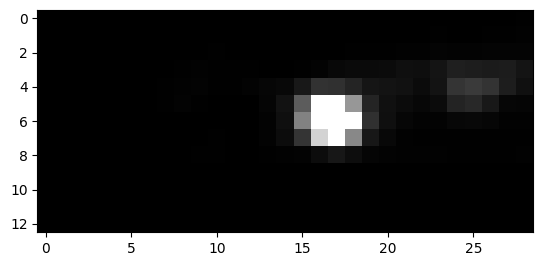

1176


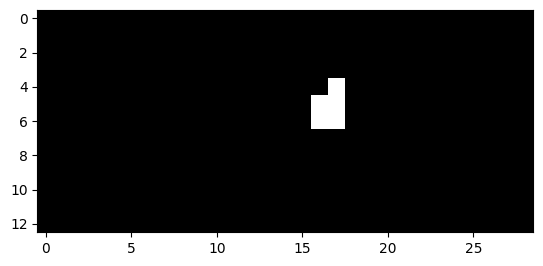

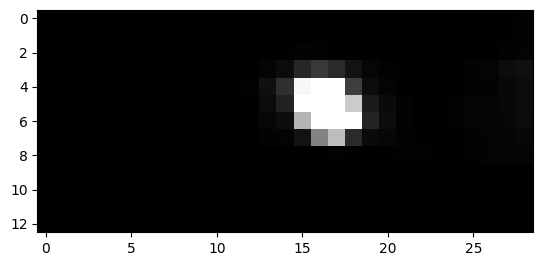

1177


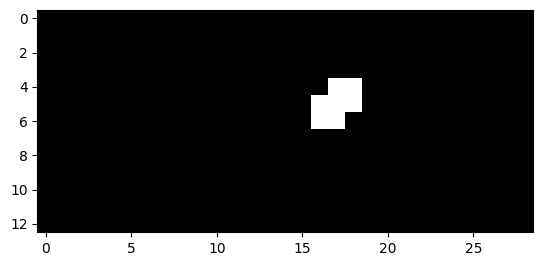

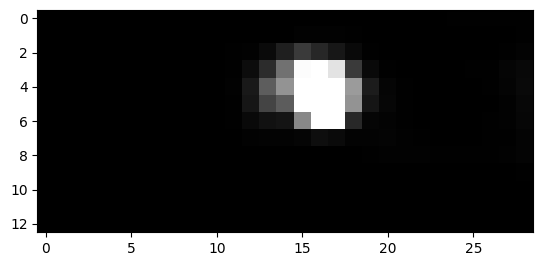

1178


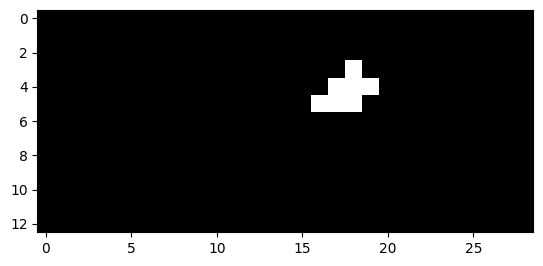

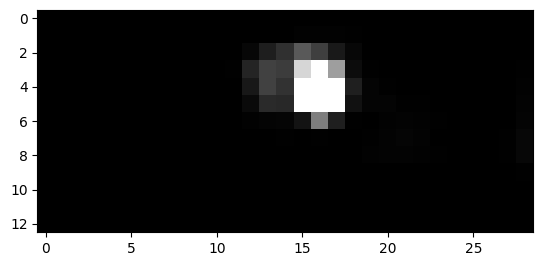

1179


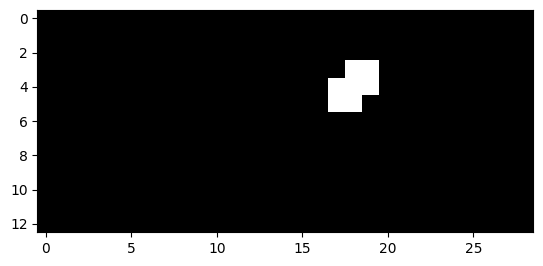

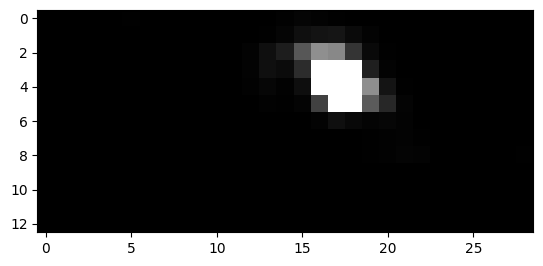

1180


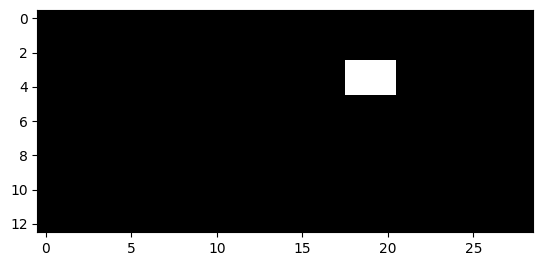

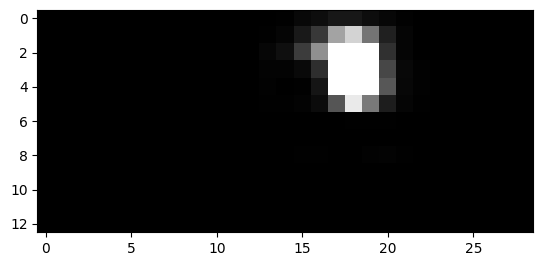

1181


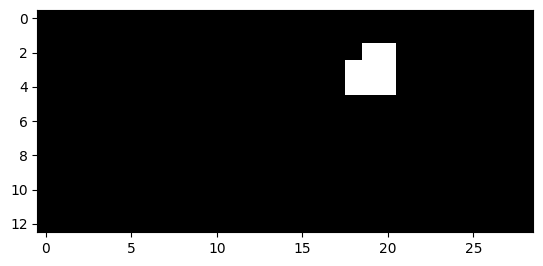

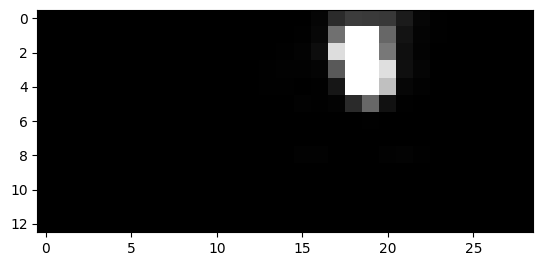

1182


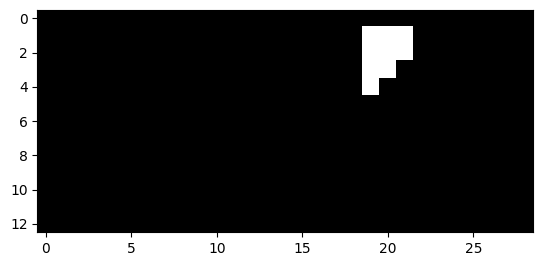

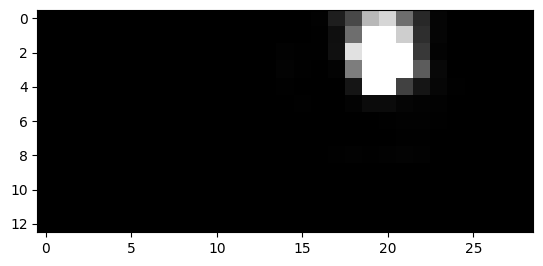

1183


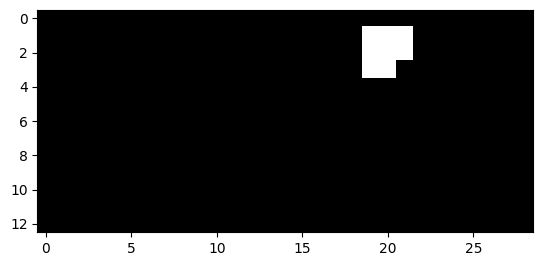

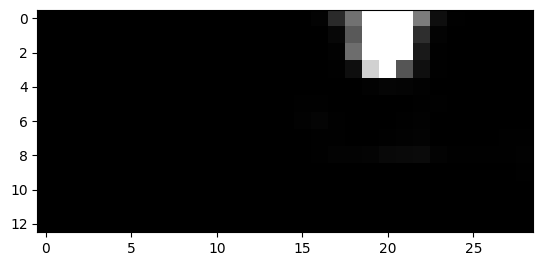

1184


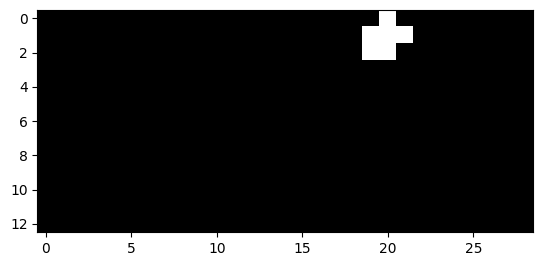

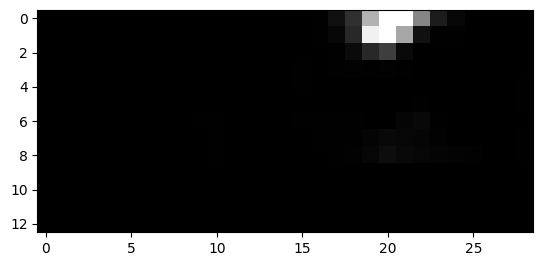

1185


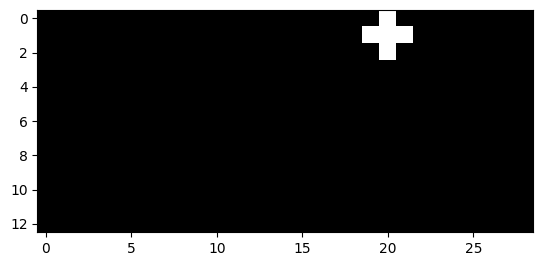

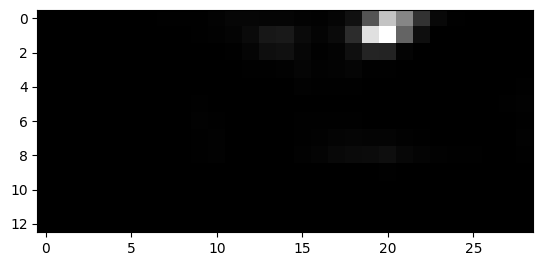

1206


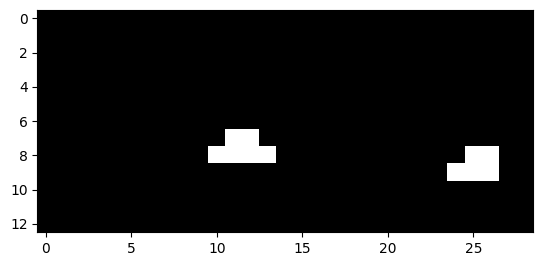

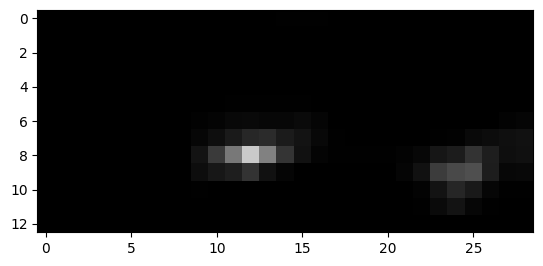

1207


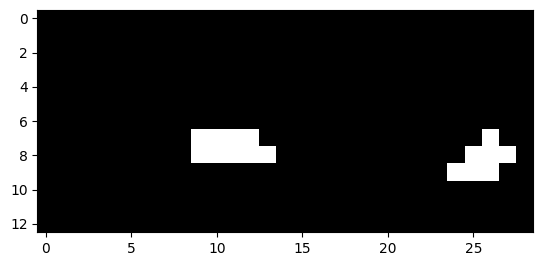

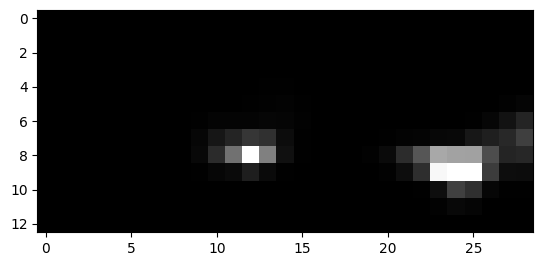

1208


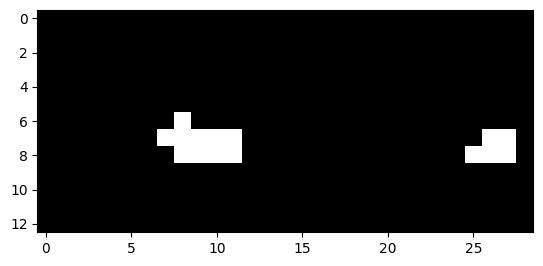

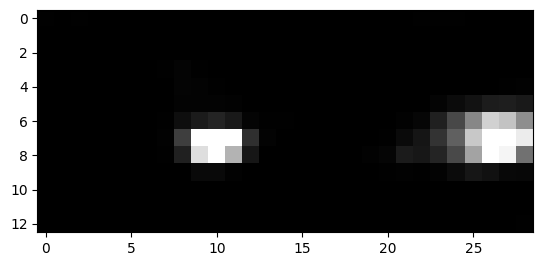

1209


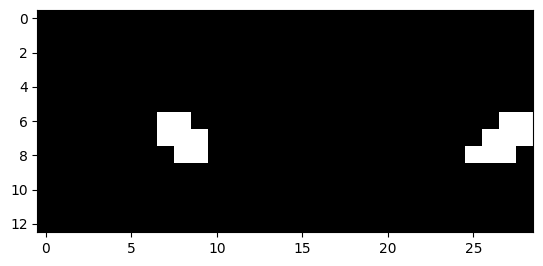

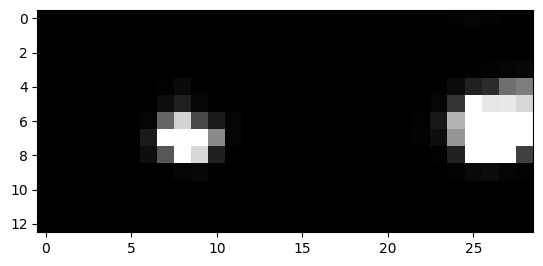

1210


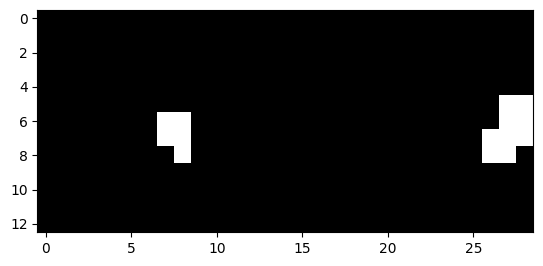

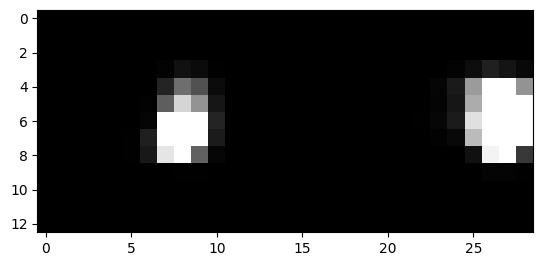

1211


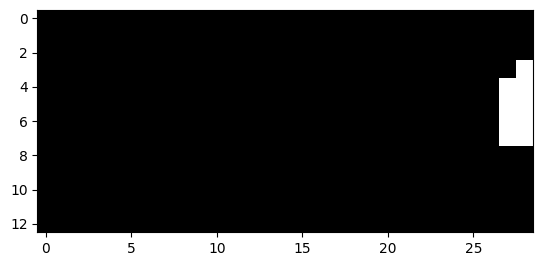

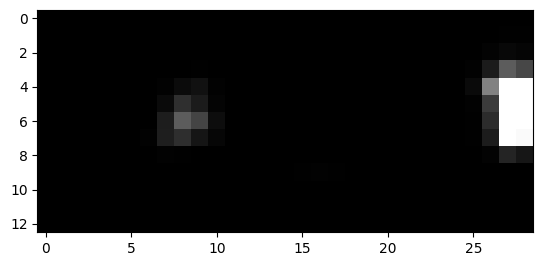

1212


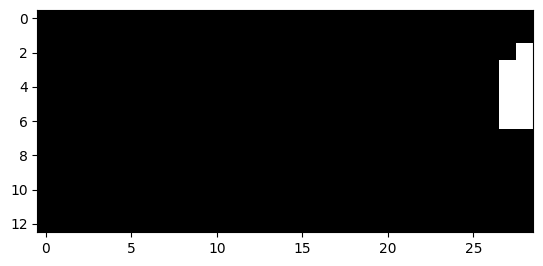

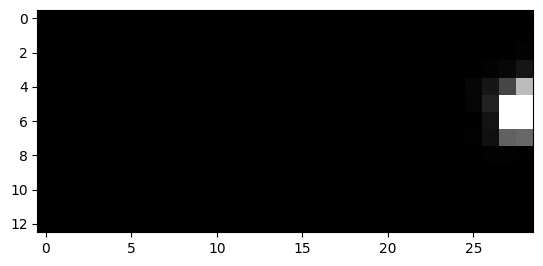

1213


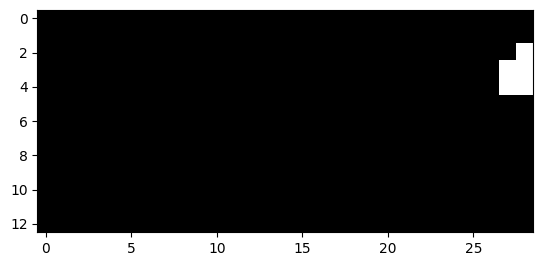

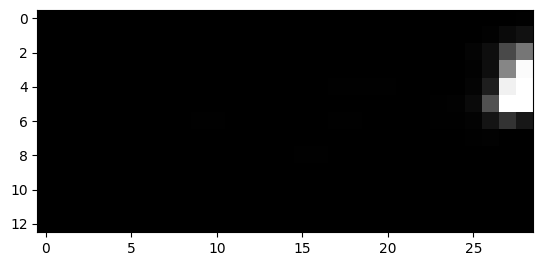

1431


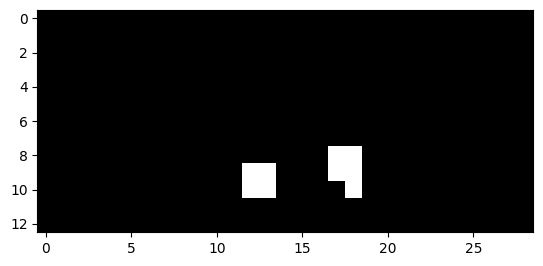

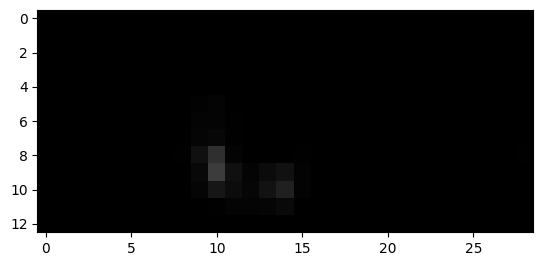

1432


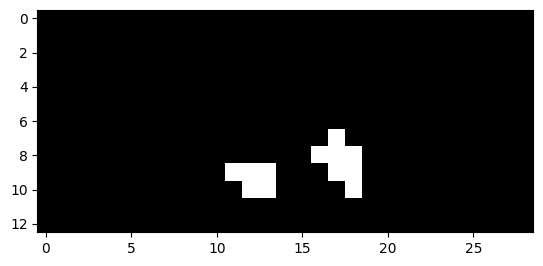

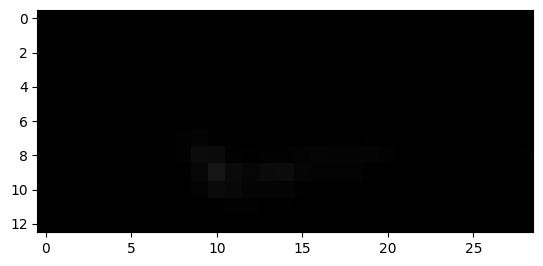

1433


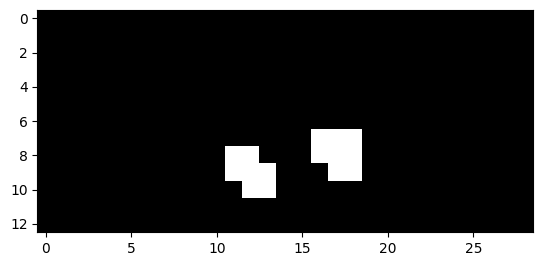

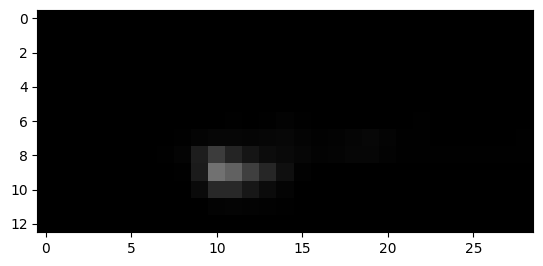

1434


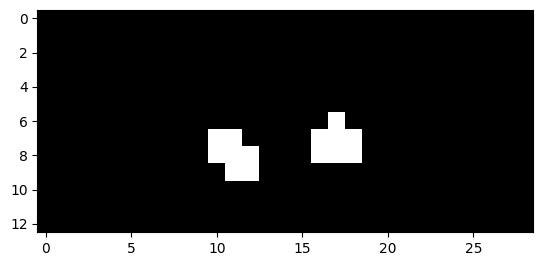

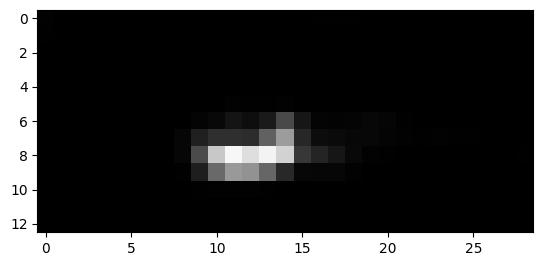

1435


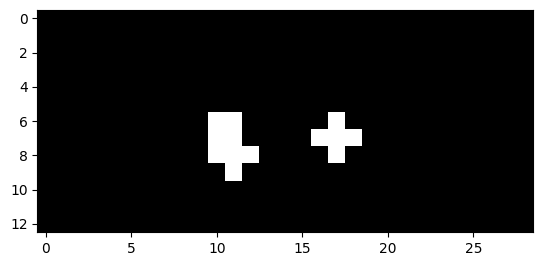

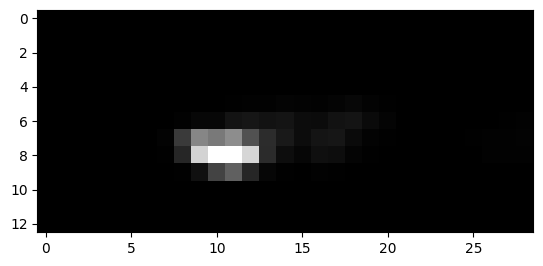

1436


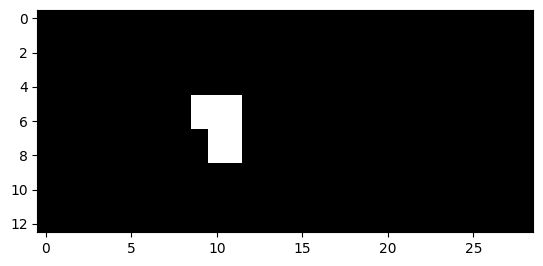

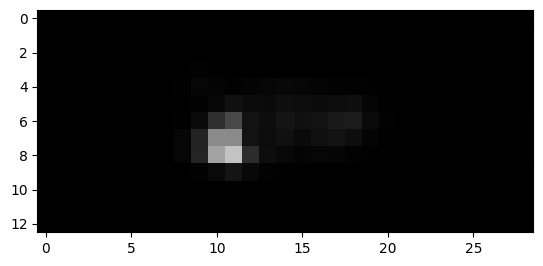

1437


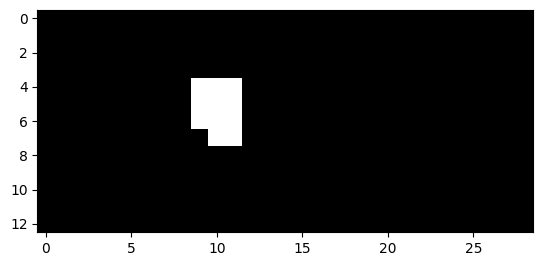

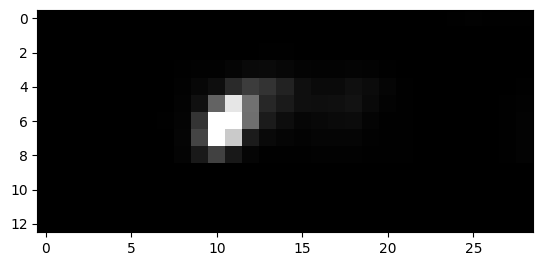

1438


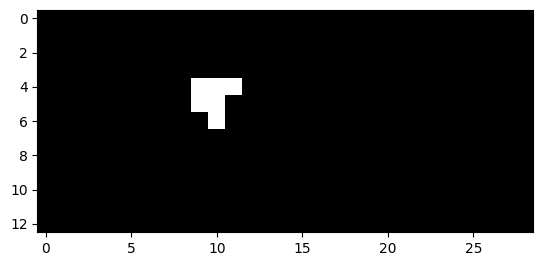

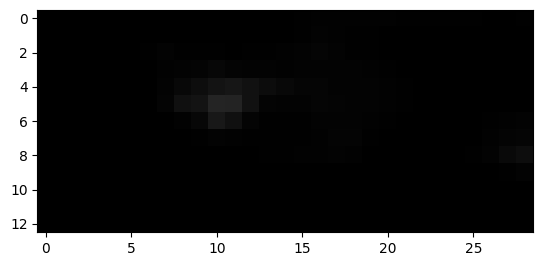

1456


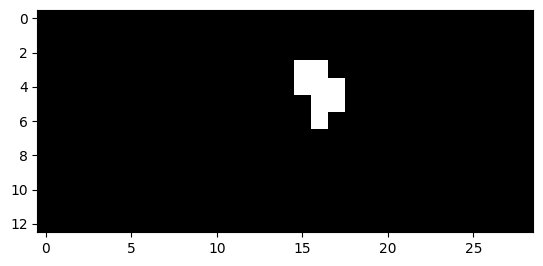

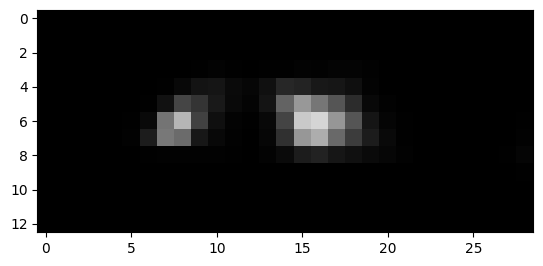

1457


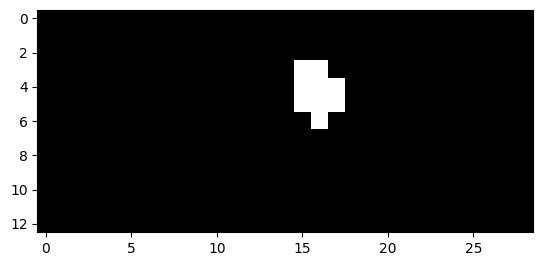

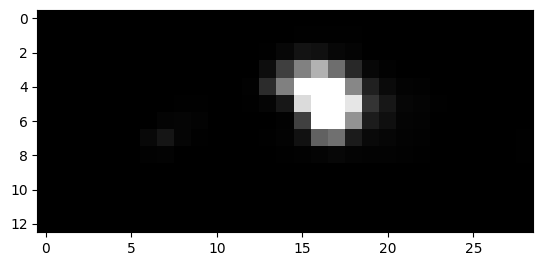

1458


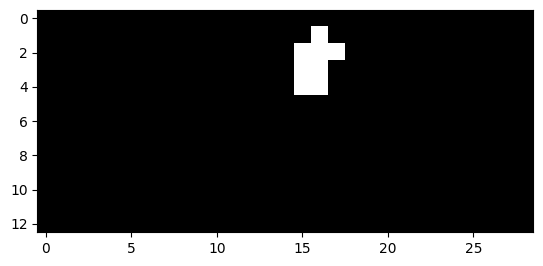

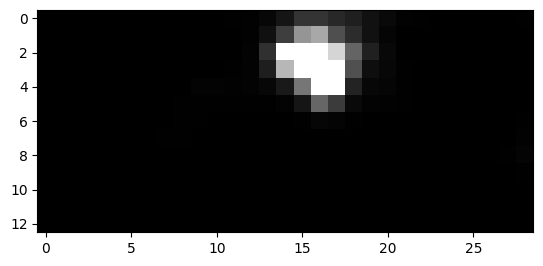

1459


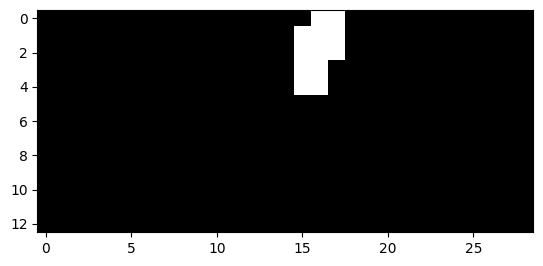

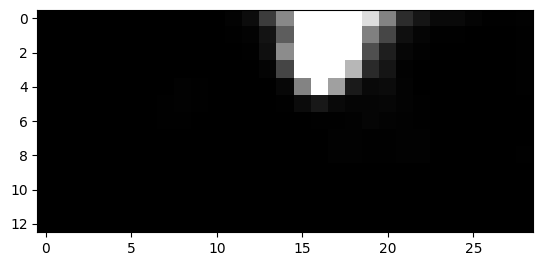

1460


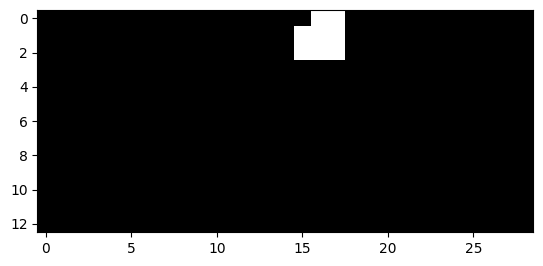

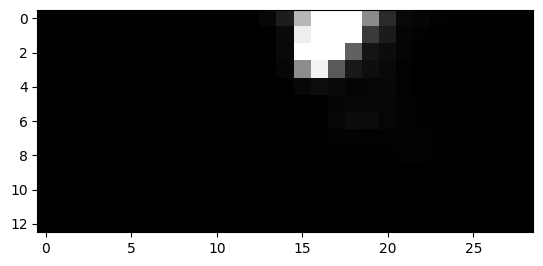

1461


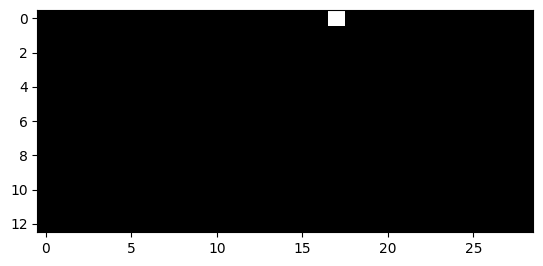

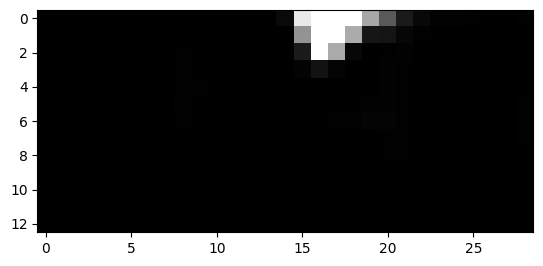

1479


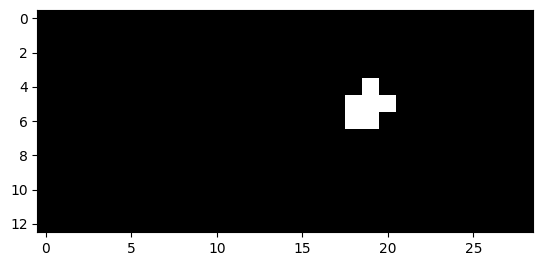

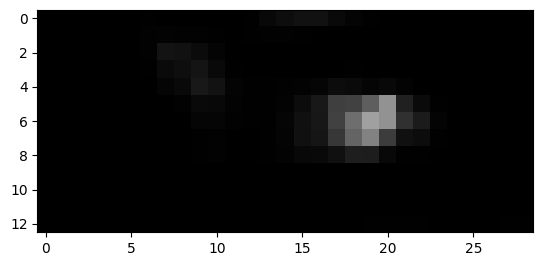

1480


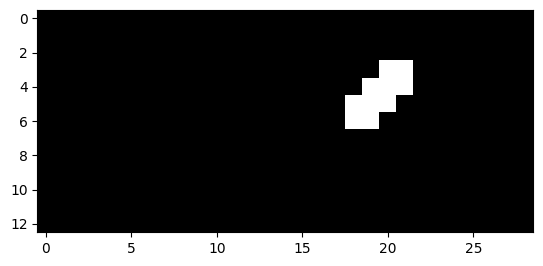

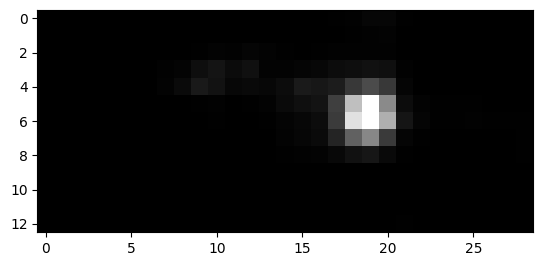

1481


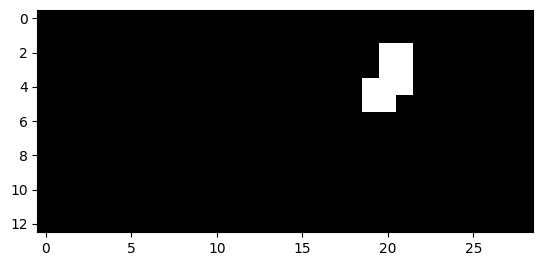

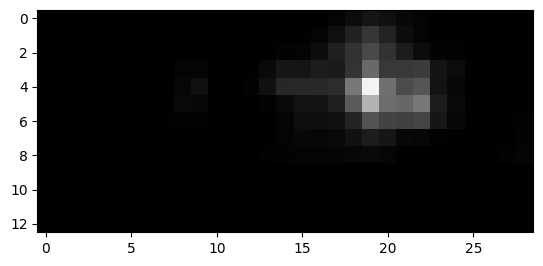

1482


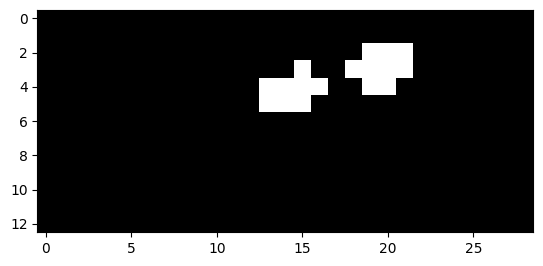

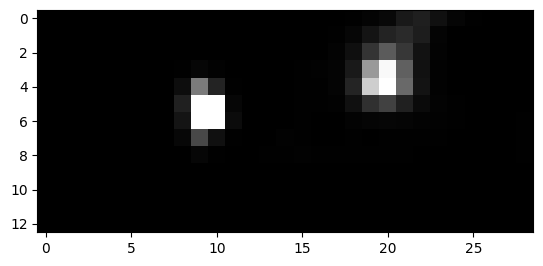

1483


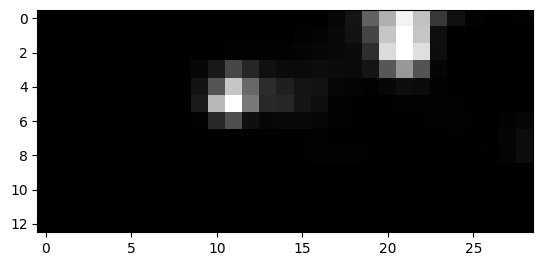

1484


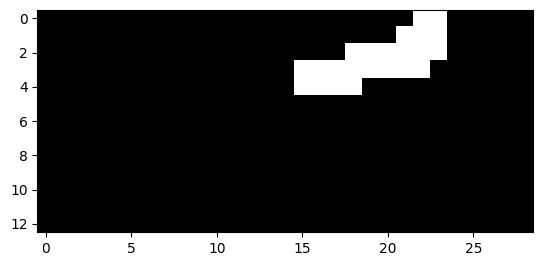

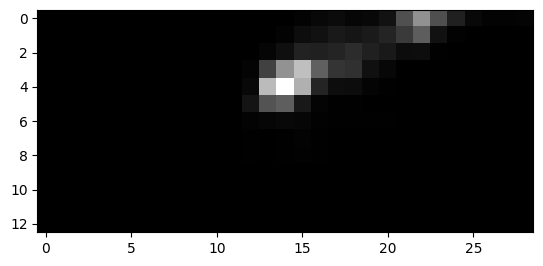

1485


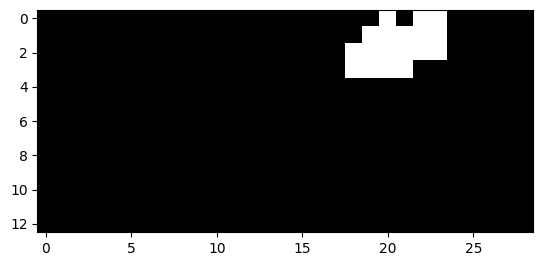

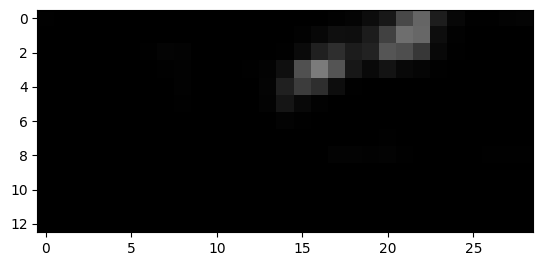

1486


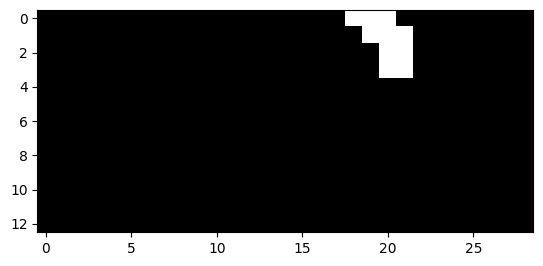

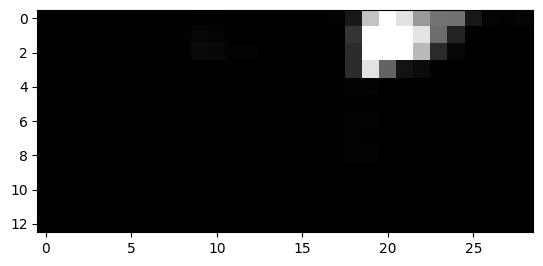

1487


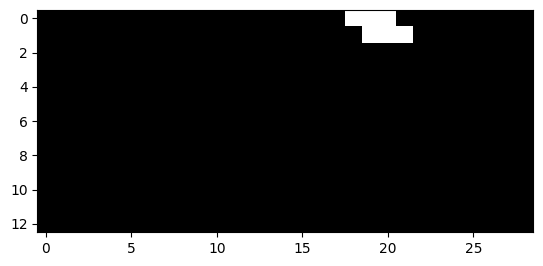

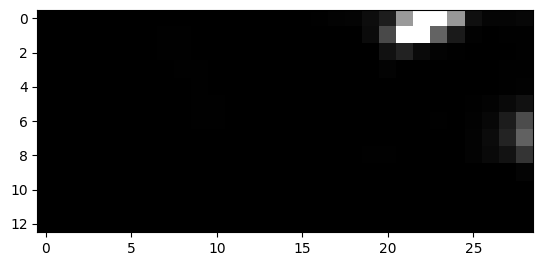

1488


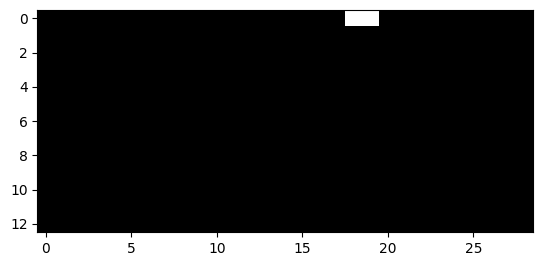

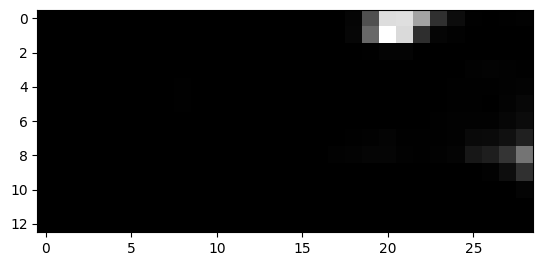

1493


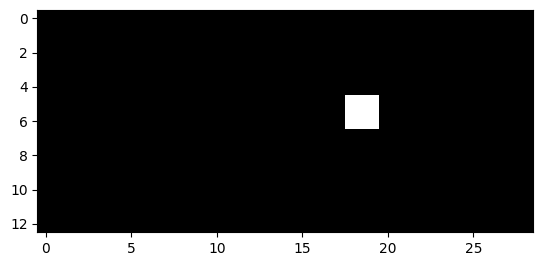

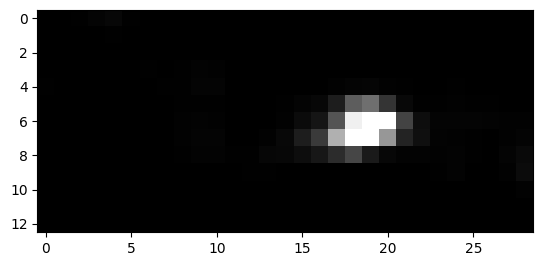

1494


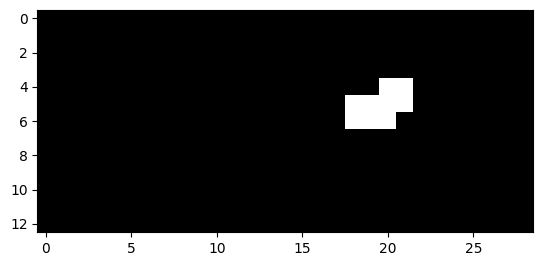

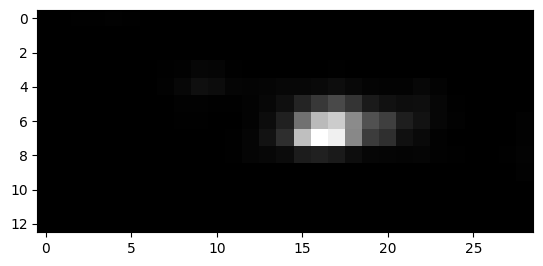

1495


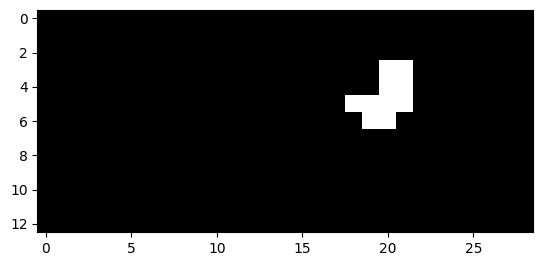

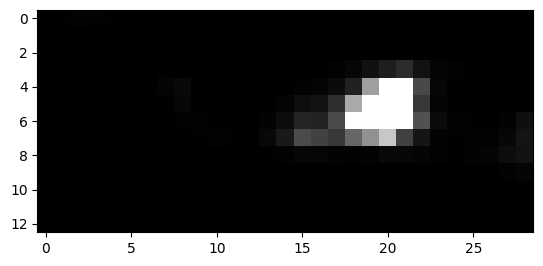

1496


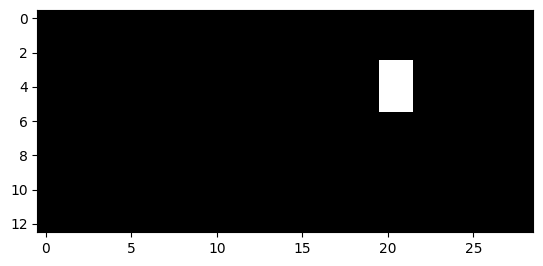

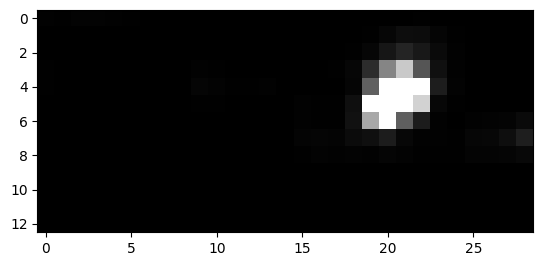

1497


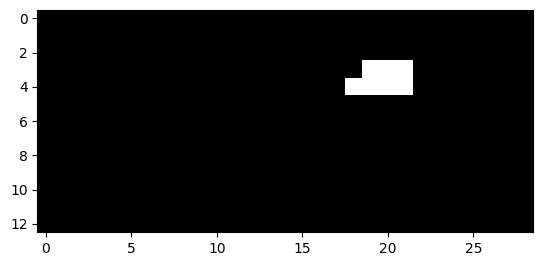

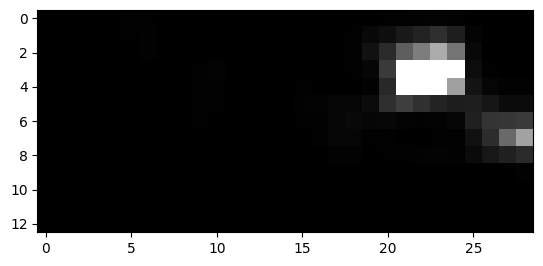

1498


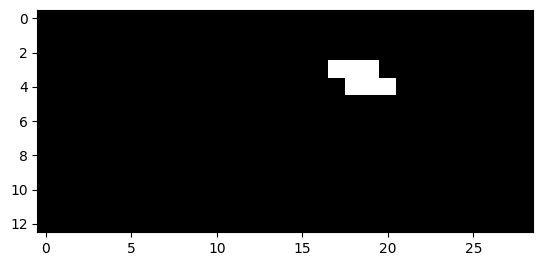

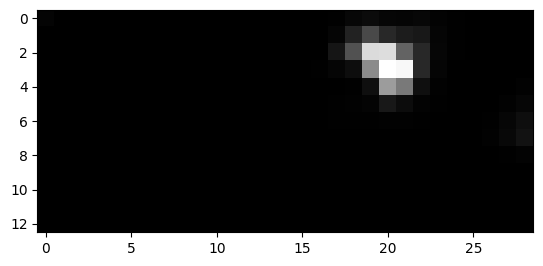

1499


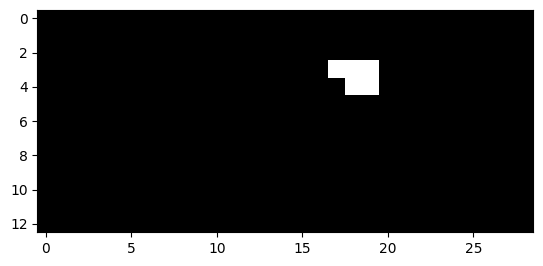

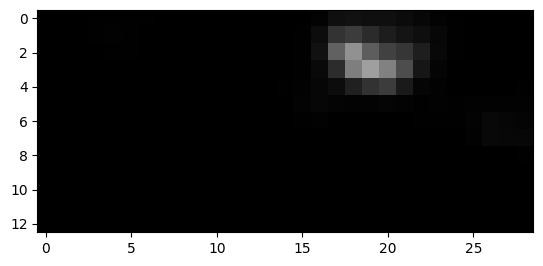

1502


1503


1504


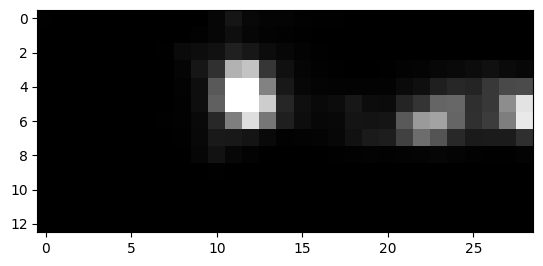

1505


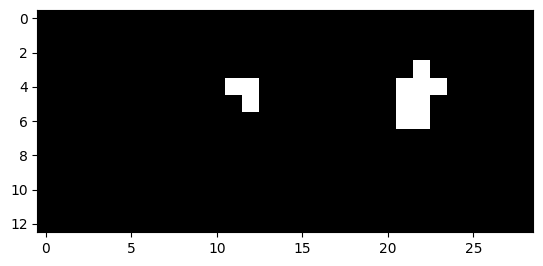

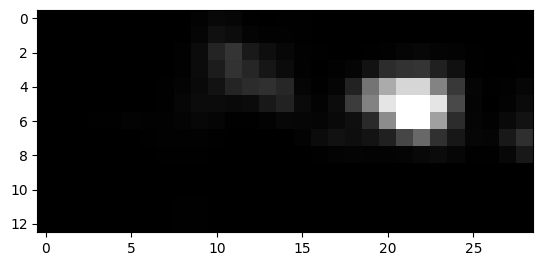

1506


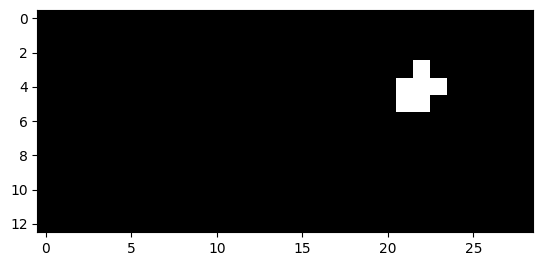

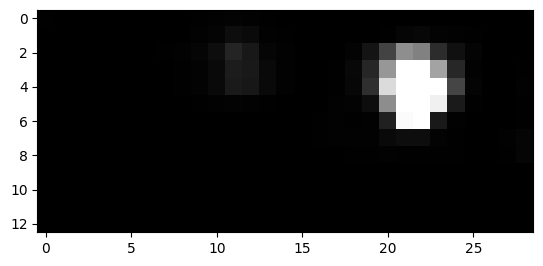

1507


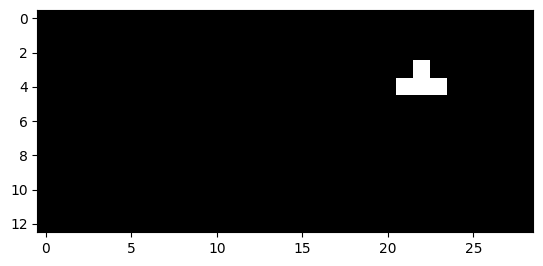

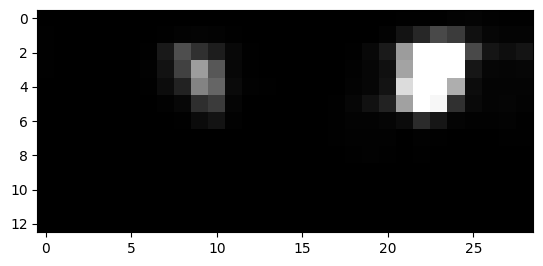

1509


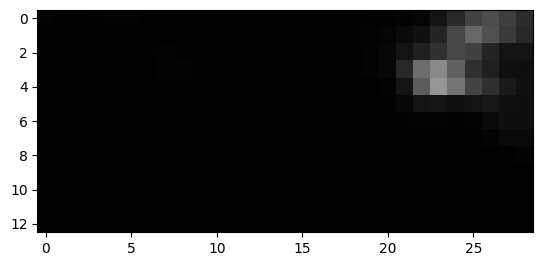

1510


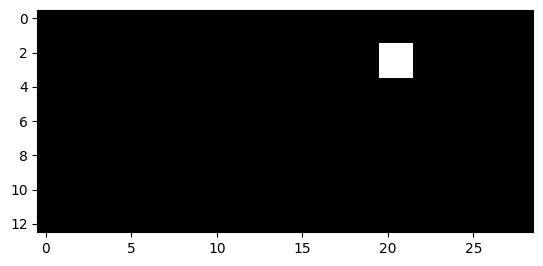

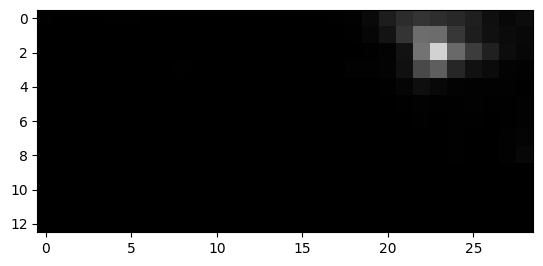

1531


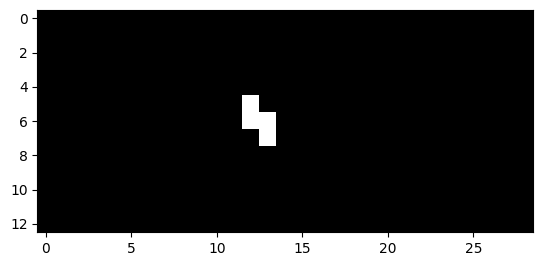

1532


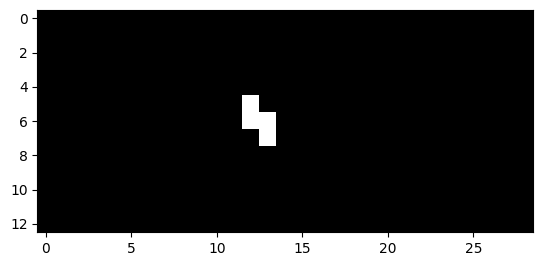

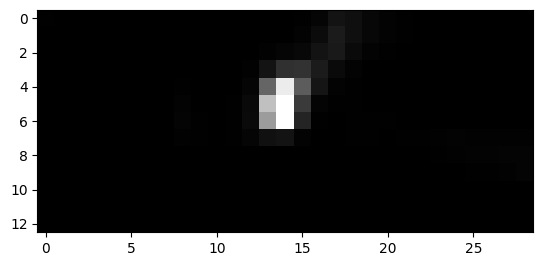

1533


1534


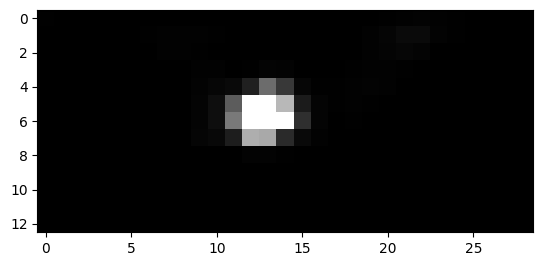

1535


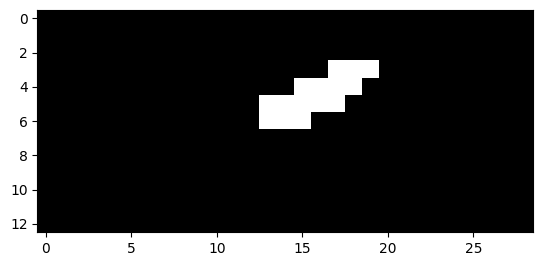

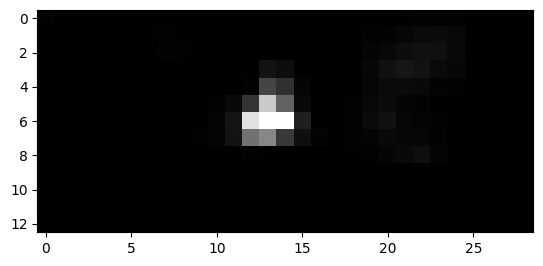

1536


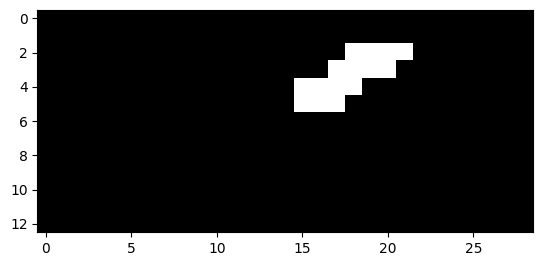

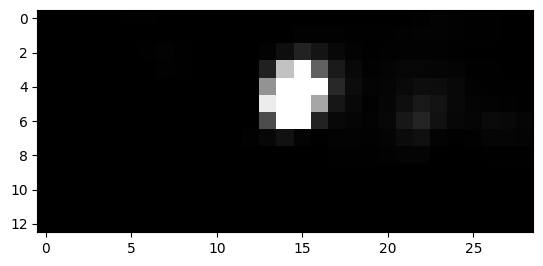

1537


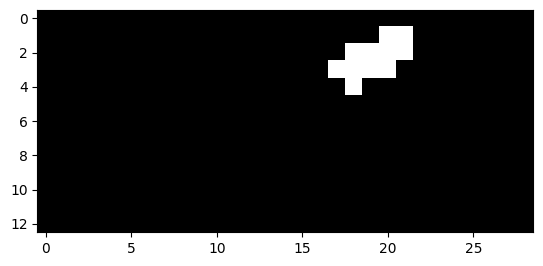

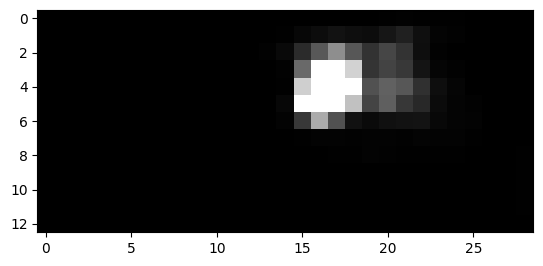

1538


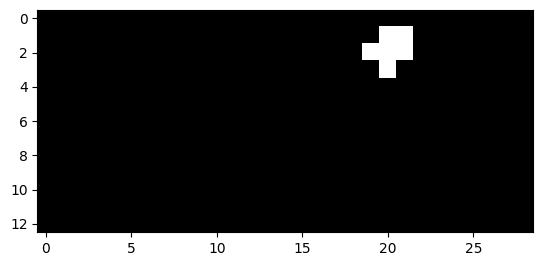

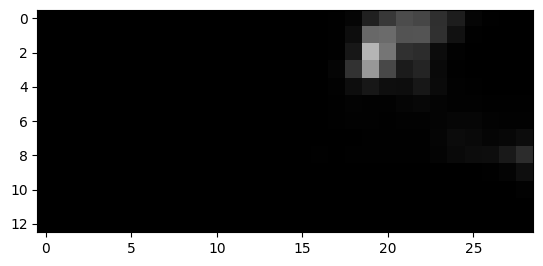

1550


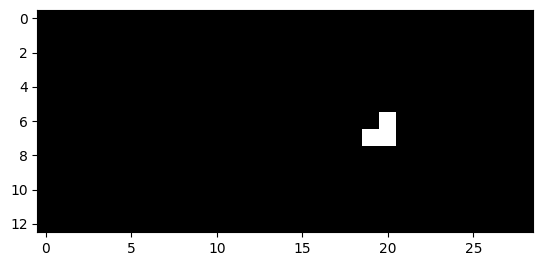

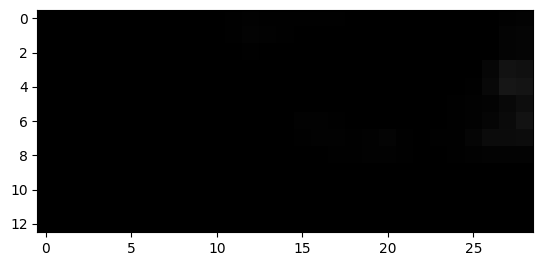

1551


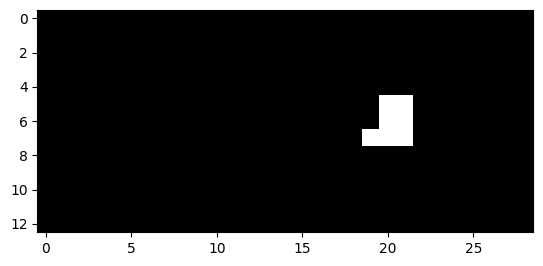

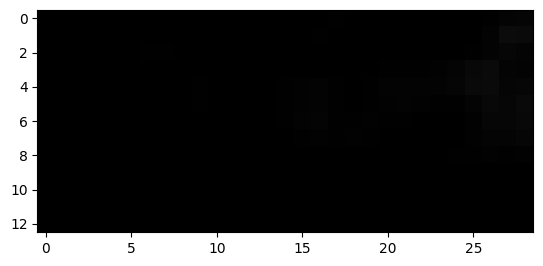

1552


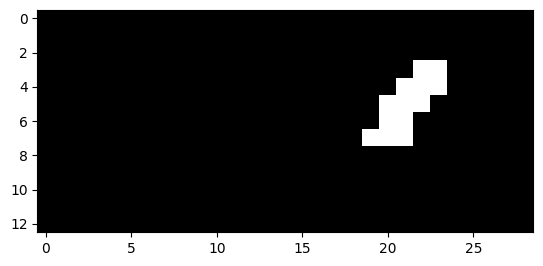

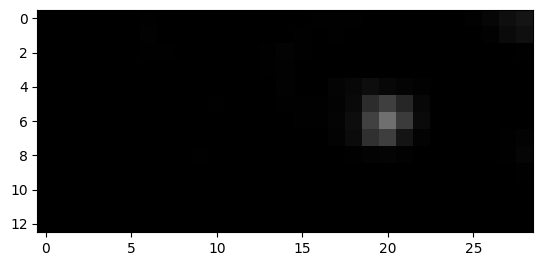

1553


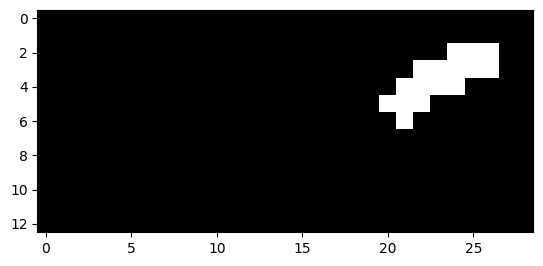

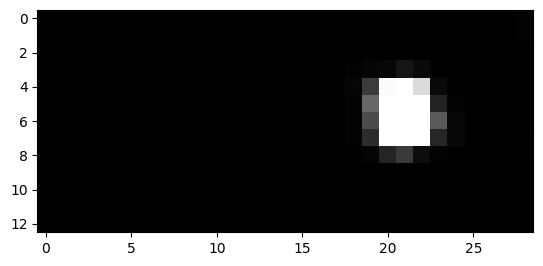

1554


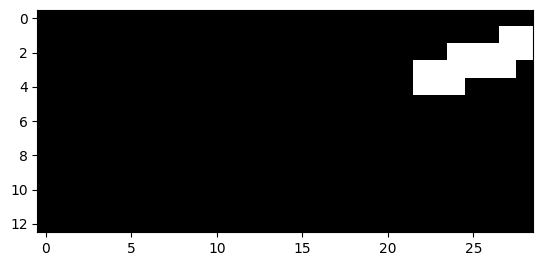

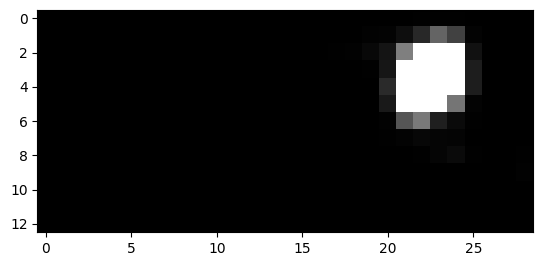

1555


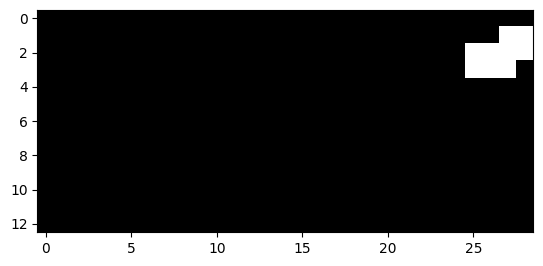

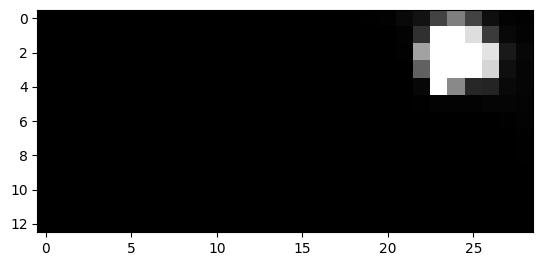

1556


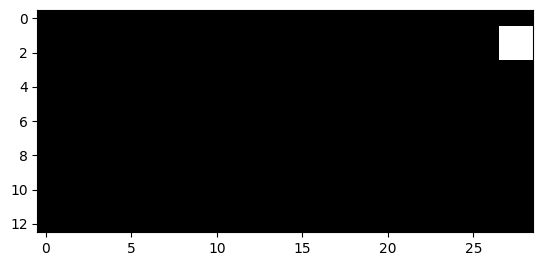

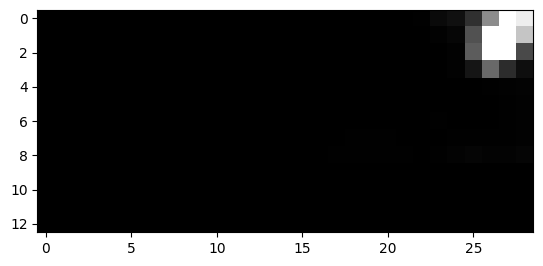

1563


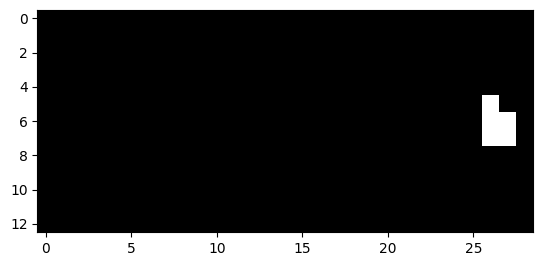

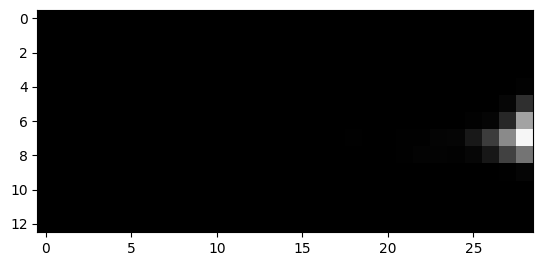

1564


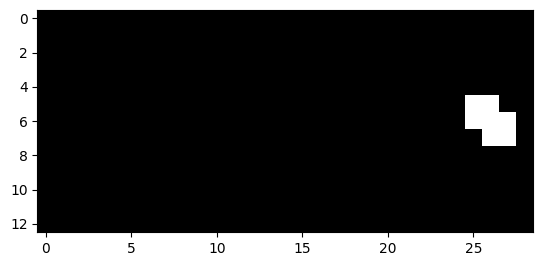

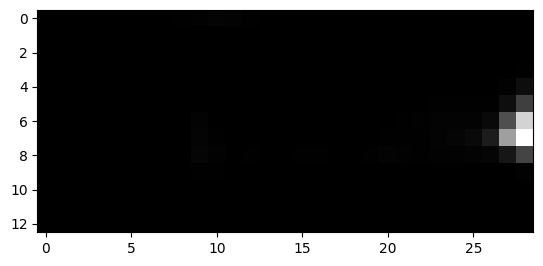

1565


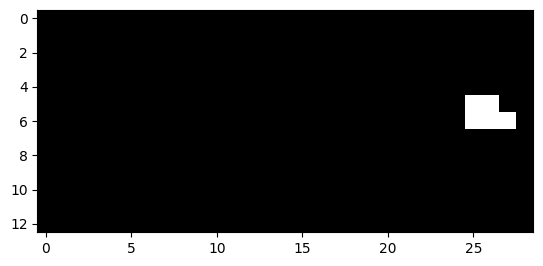

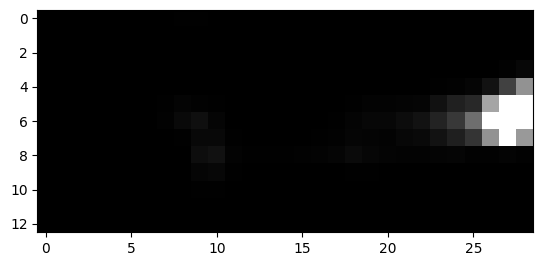

1599


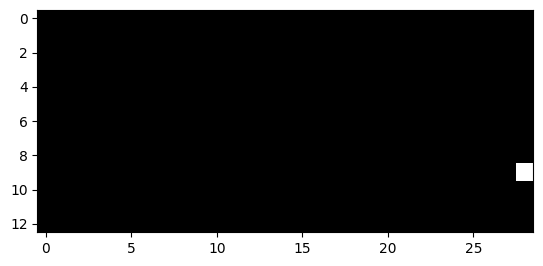

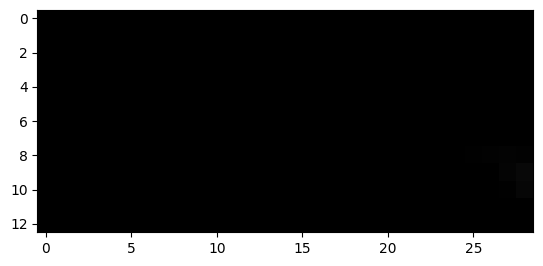

1600


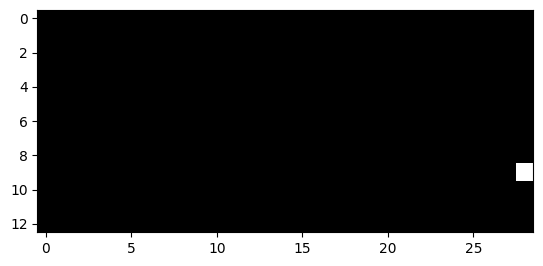

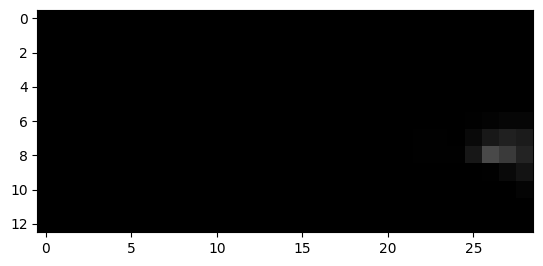

1601


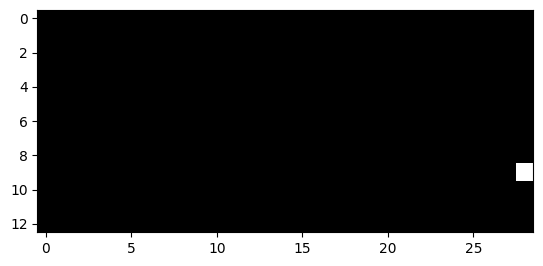

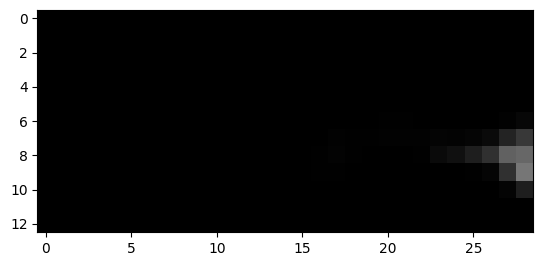

1777


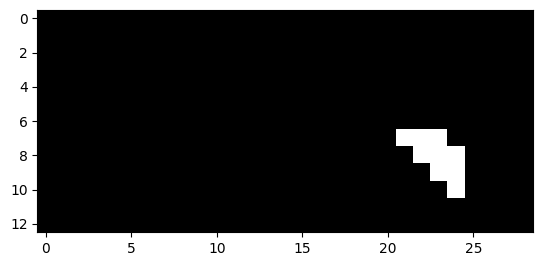

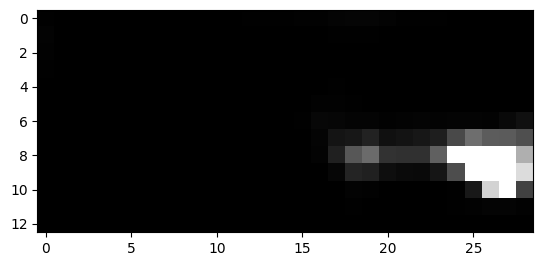

1778


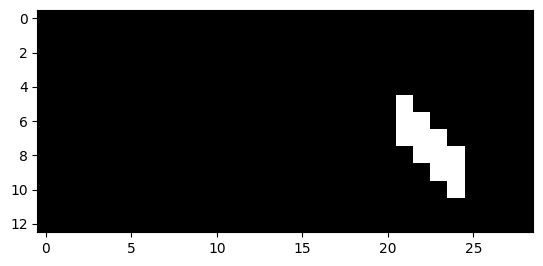

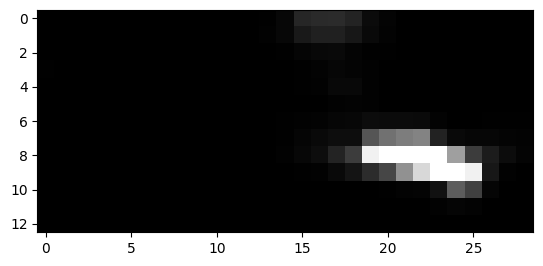

1779


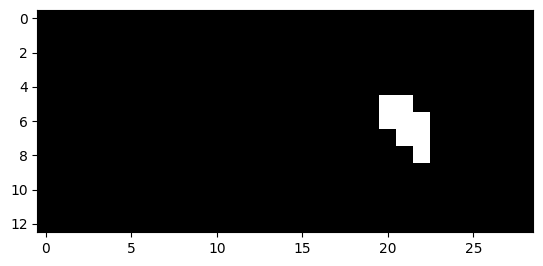

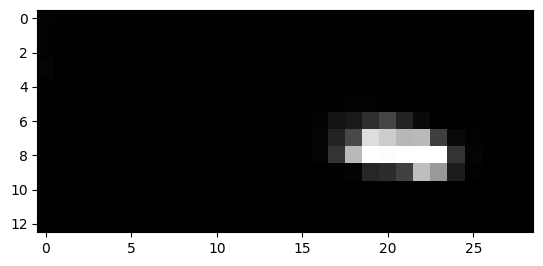

1780


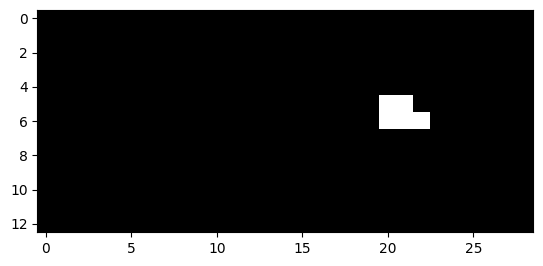

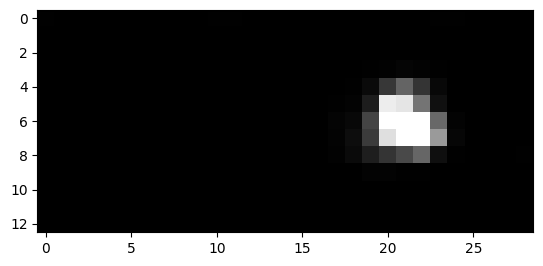

1781


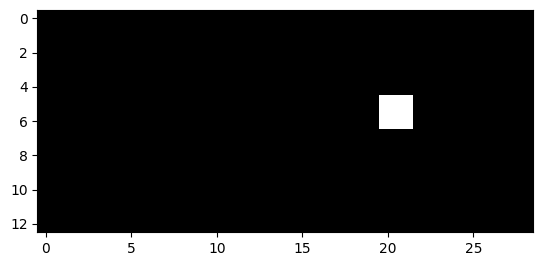

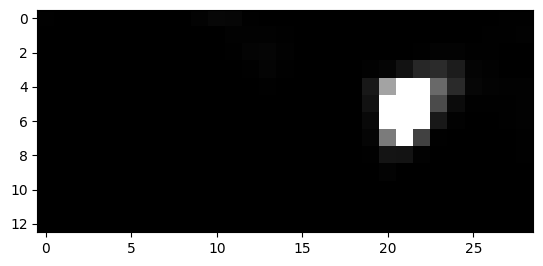

1800


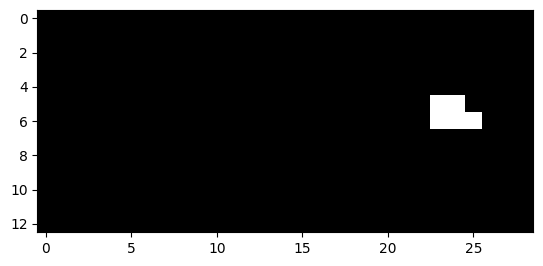

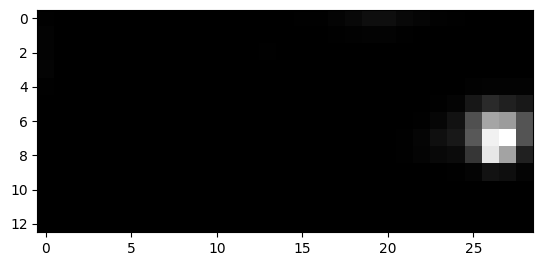

1801


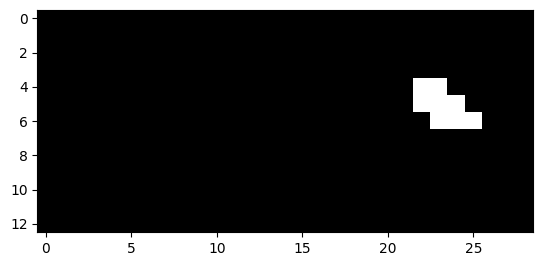

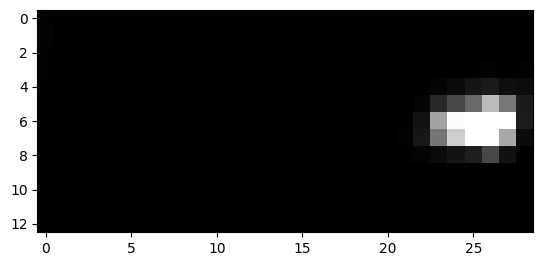

1802


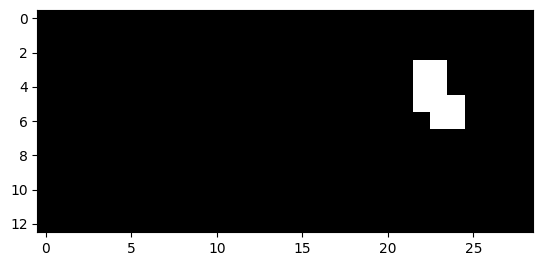

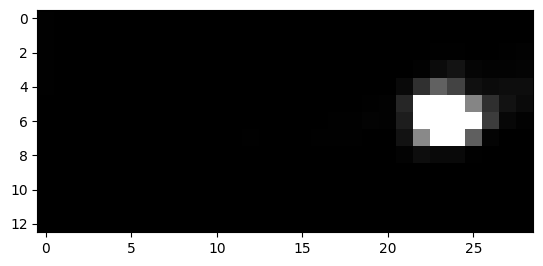

1803


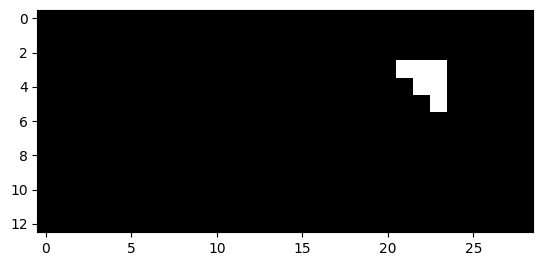

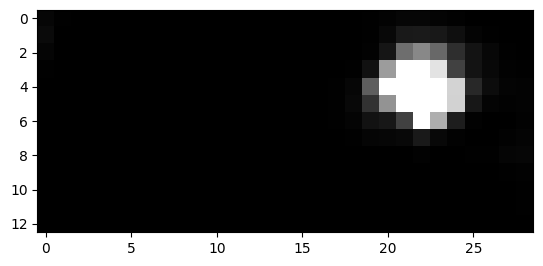

1804


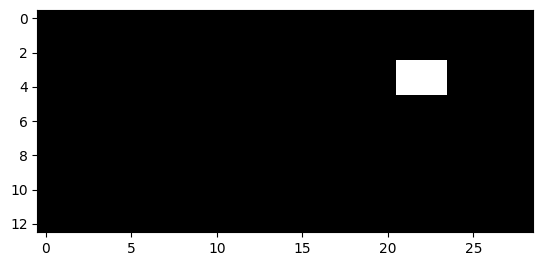

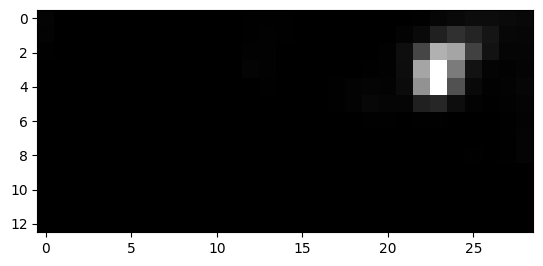

1805


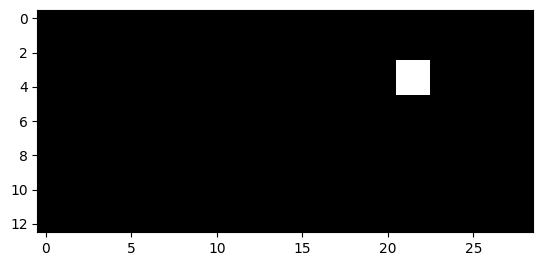

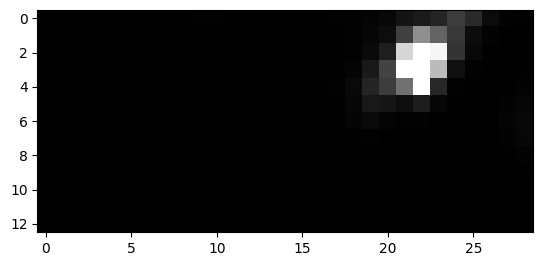

1818


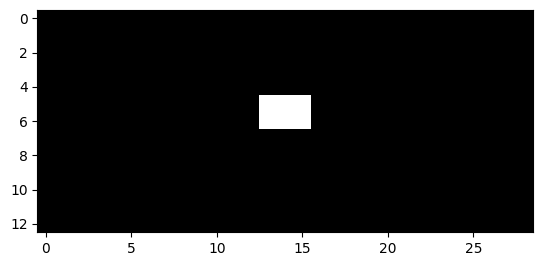

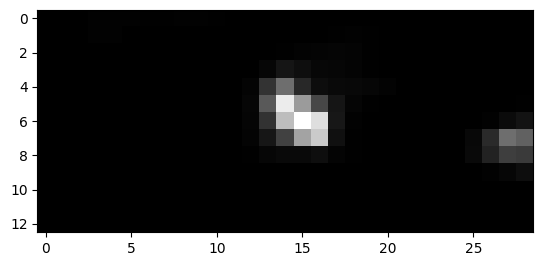

1819


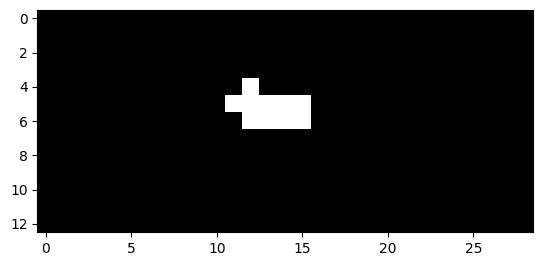

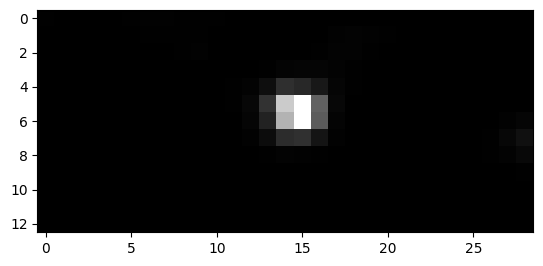

1820


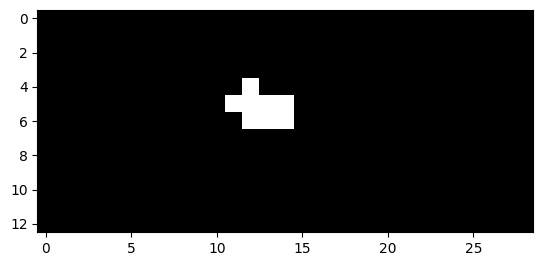

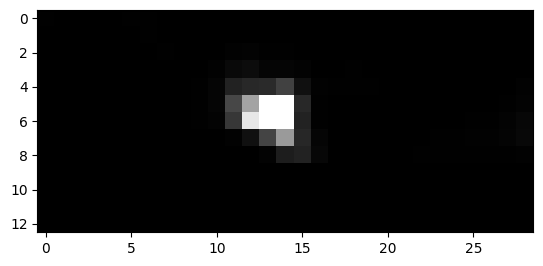

1821


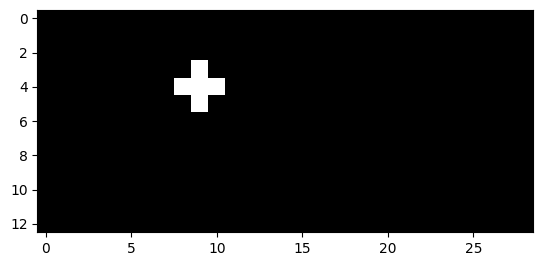

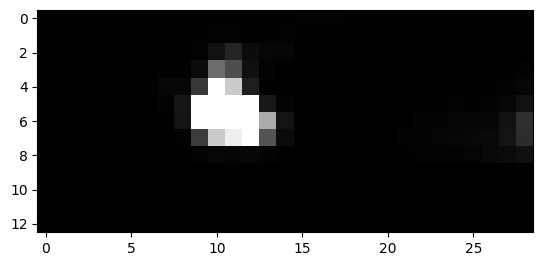

1822


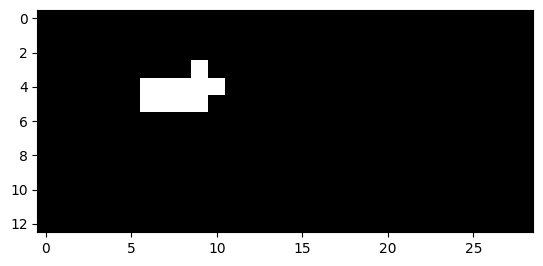

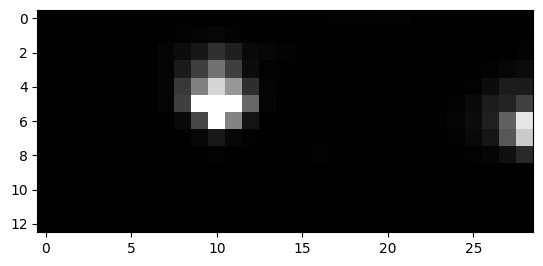

1823


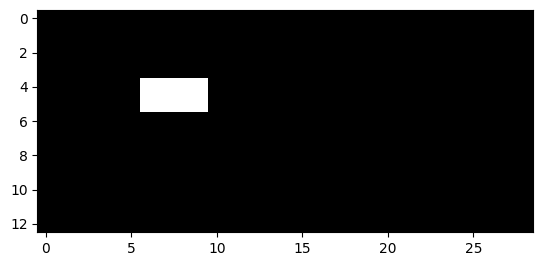

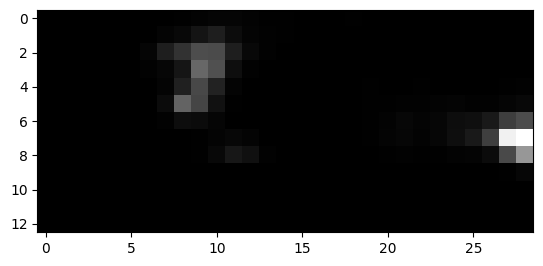

1825


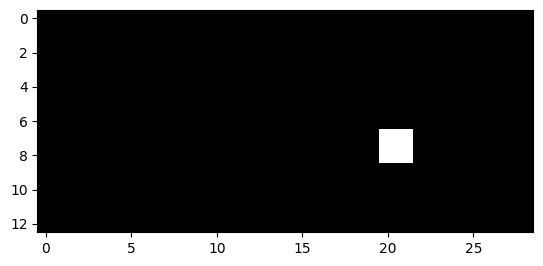

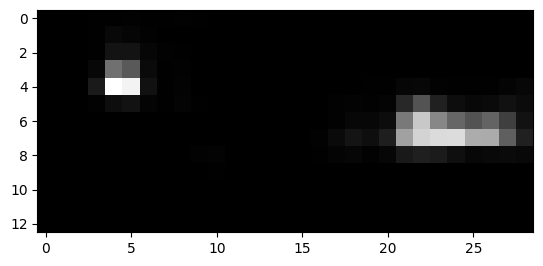

1826


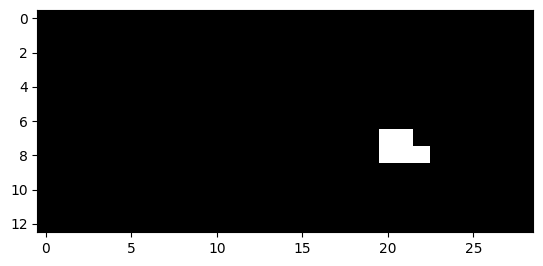

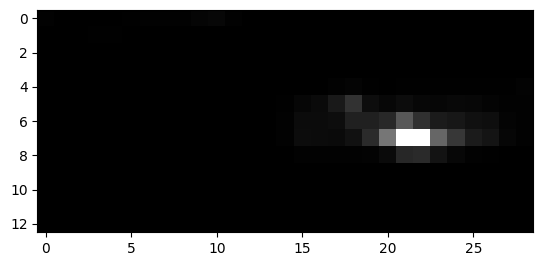

1827


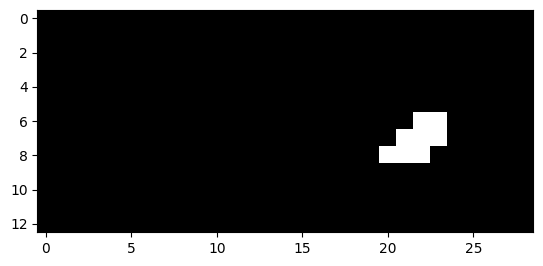

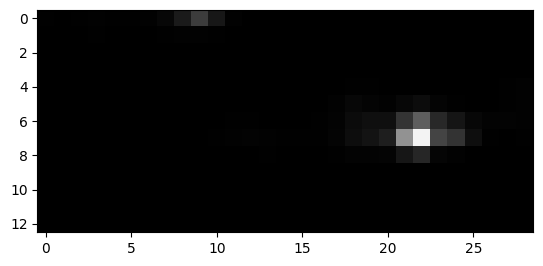

1828


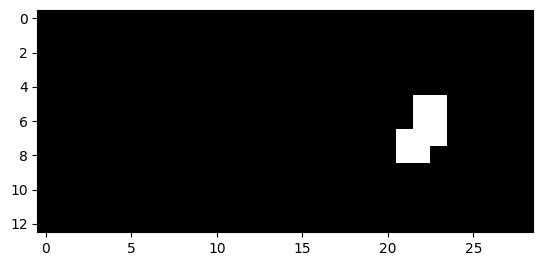

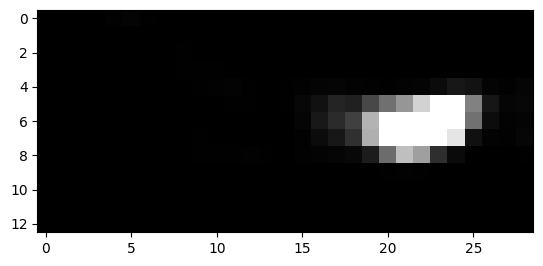

1829


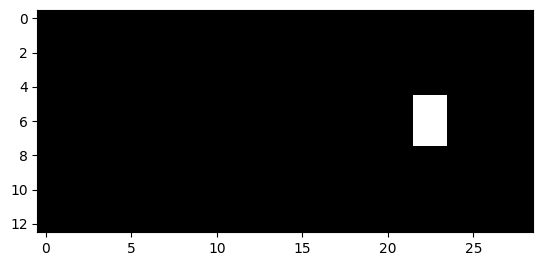

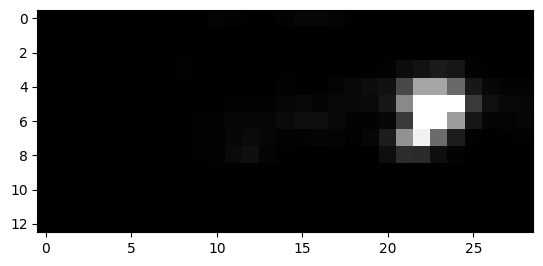

1830


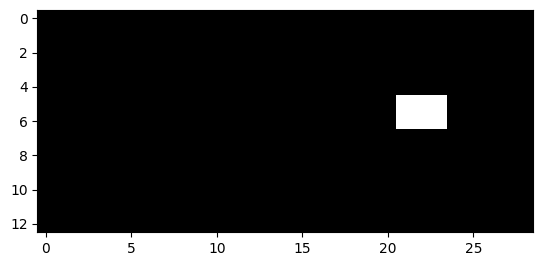

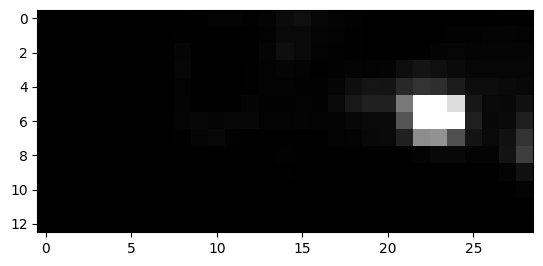

1831


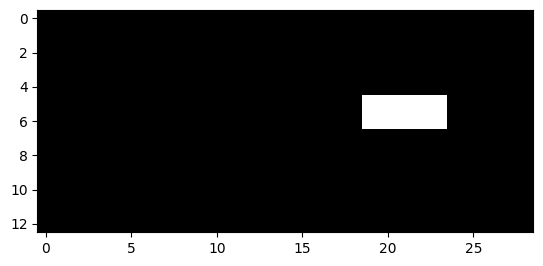

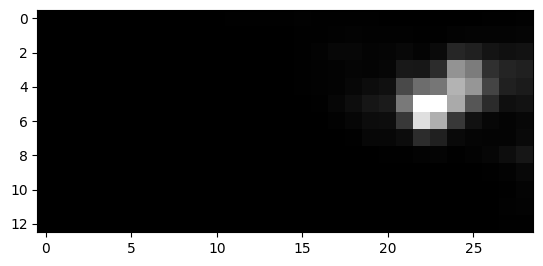

1832


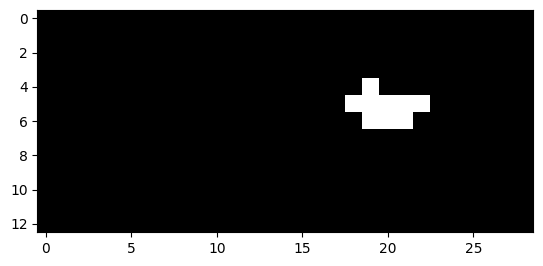

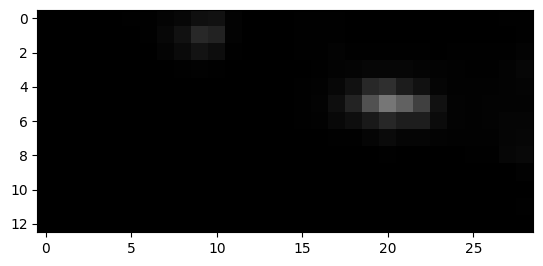

1833


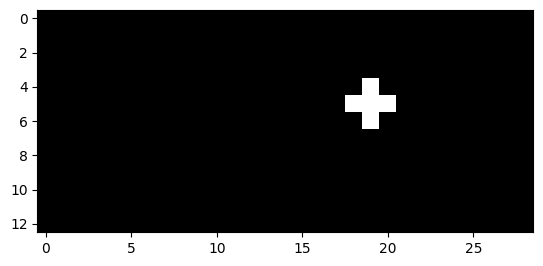

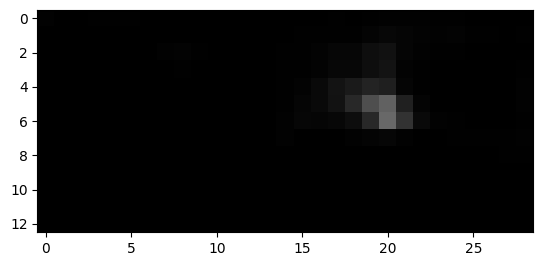

1840


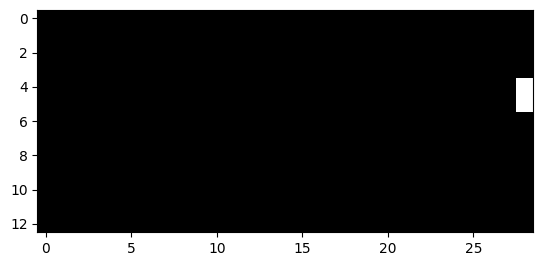

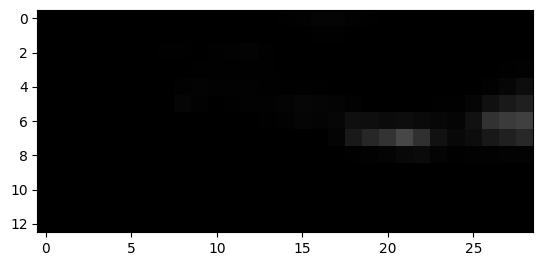

1841


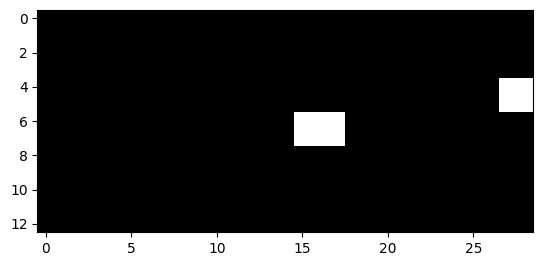

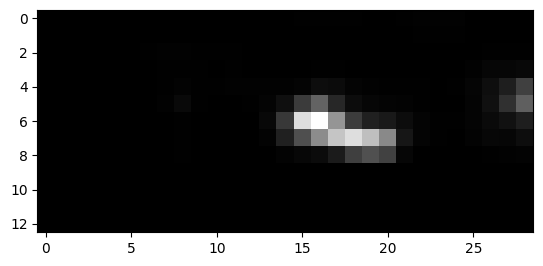

1842


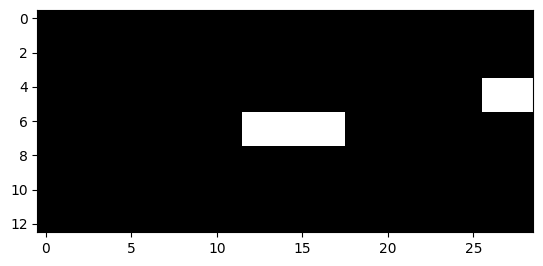

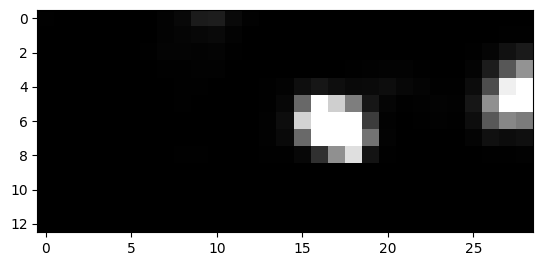

1843


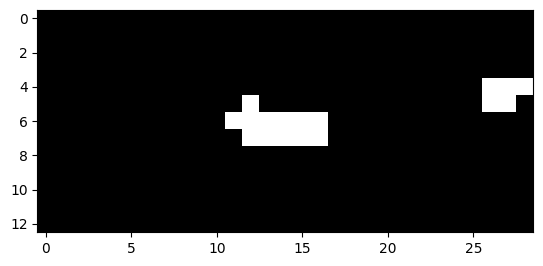

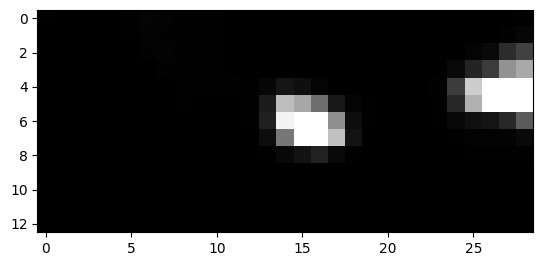

1844


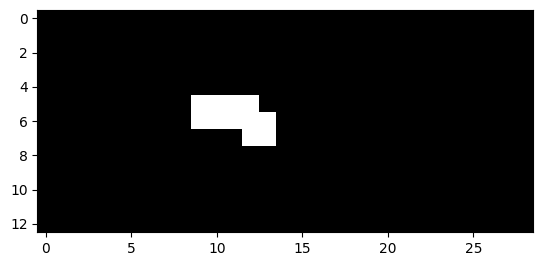

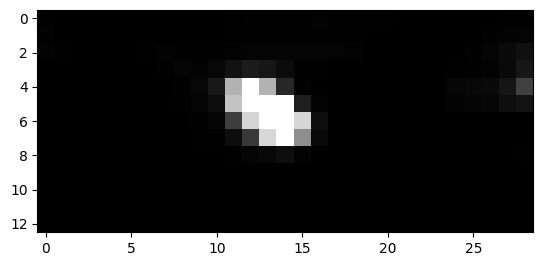

1845


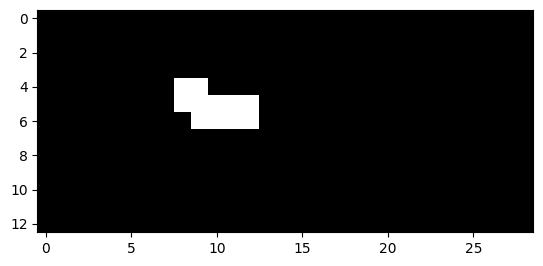

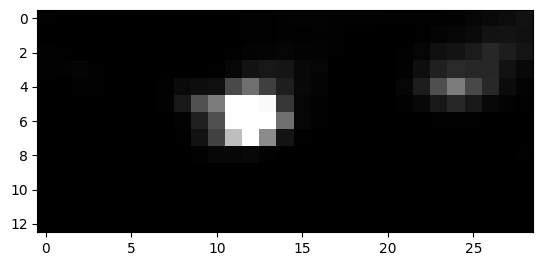

1846


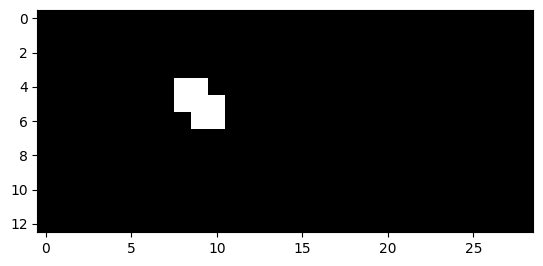

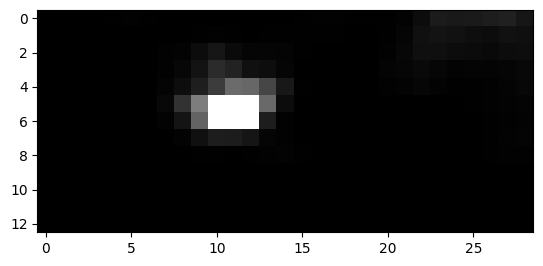

1850


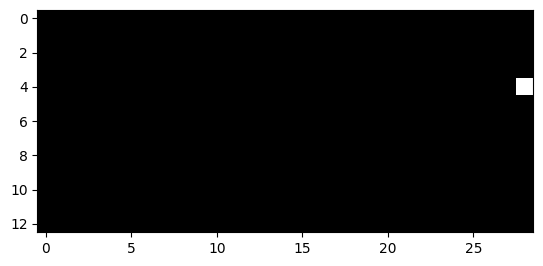

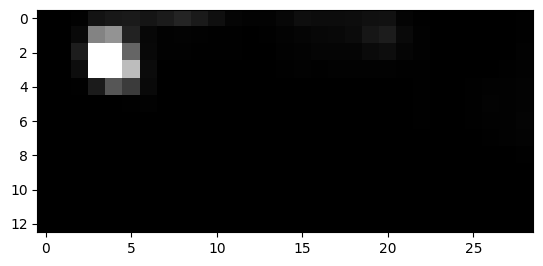

1851


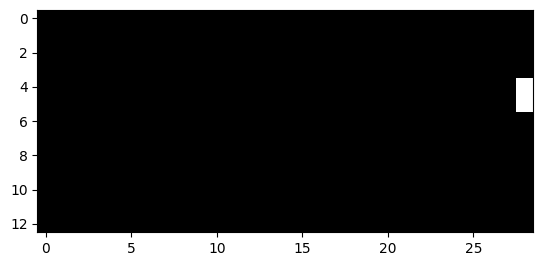

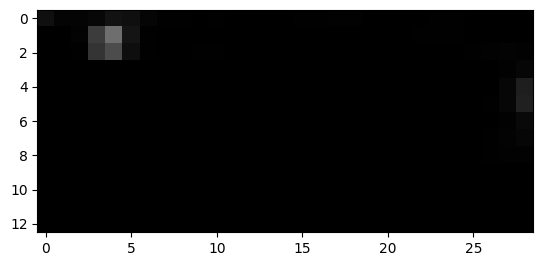

1852


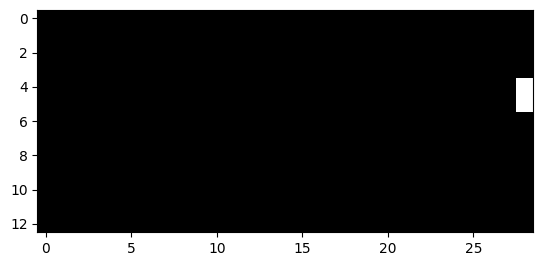

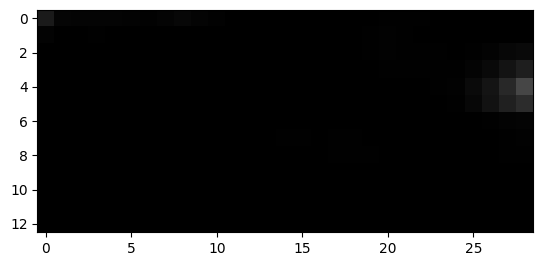

1860


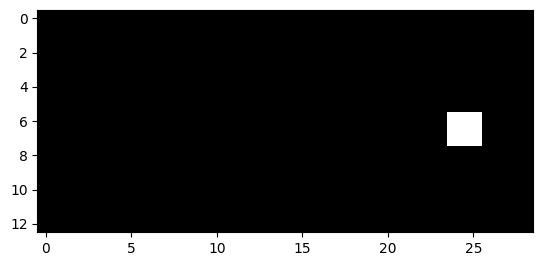

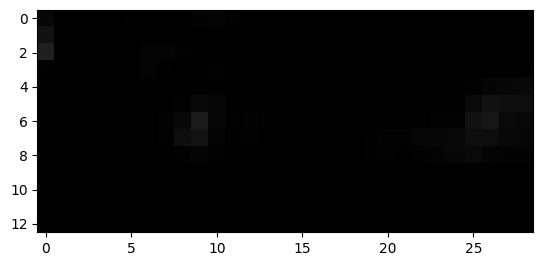

1861


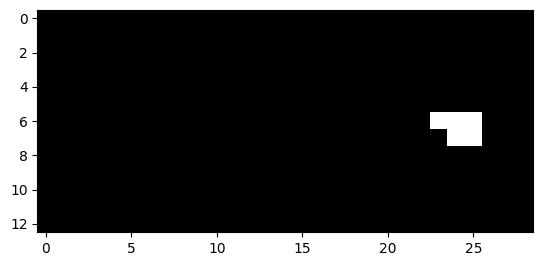

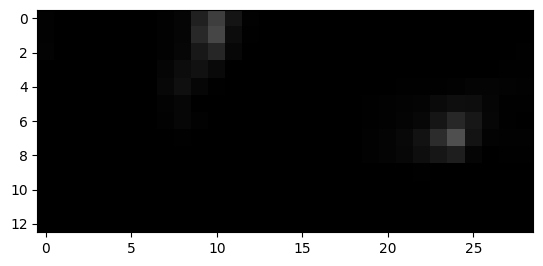

1862


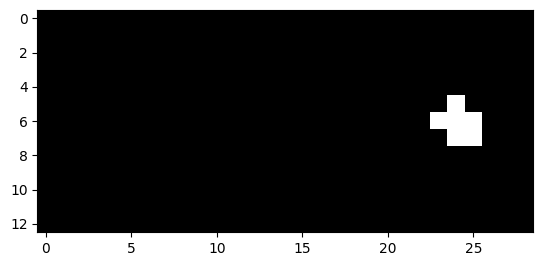

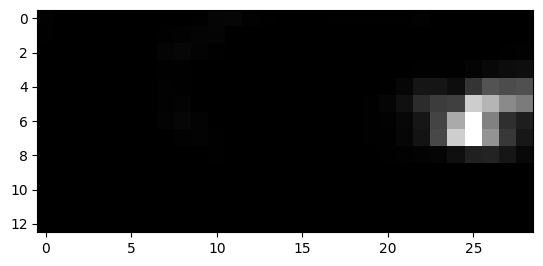

1863


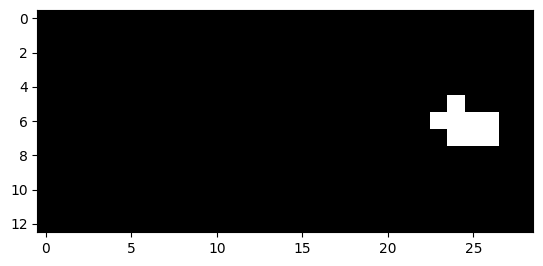

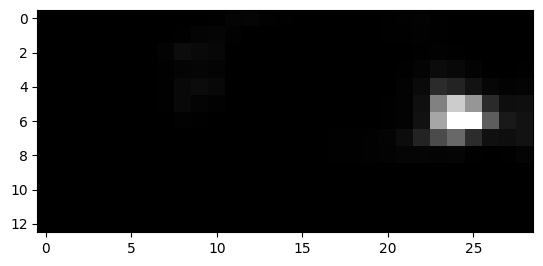

1864


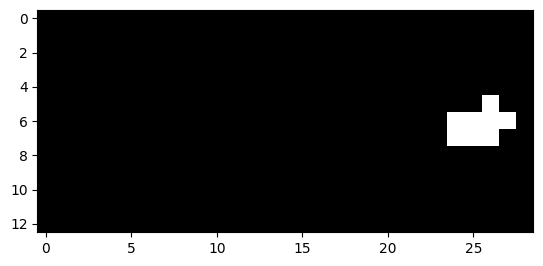

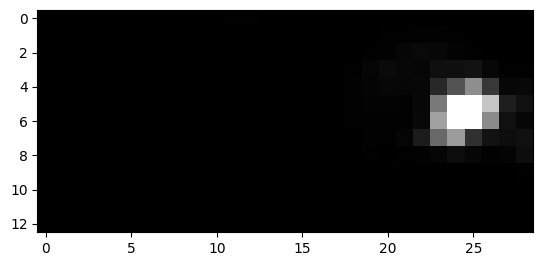

1865


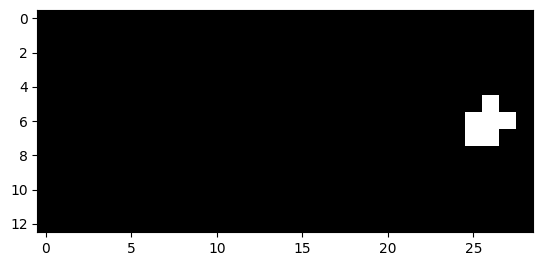

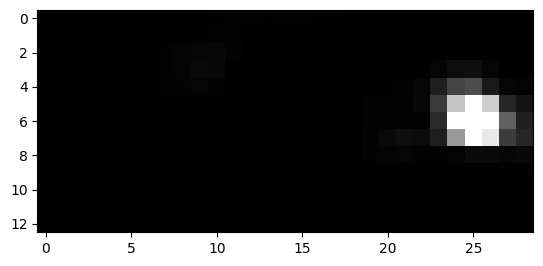

1866


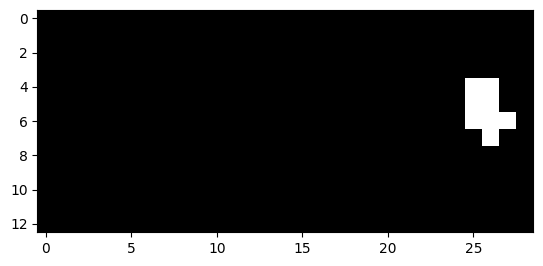

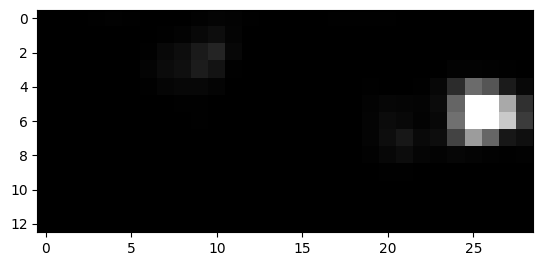

1867


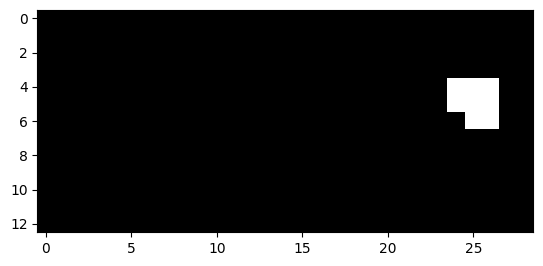

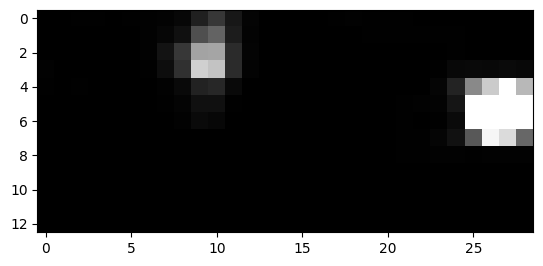

1868


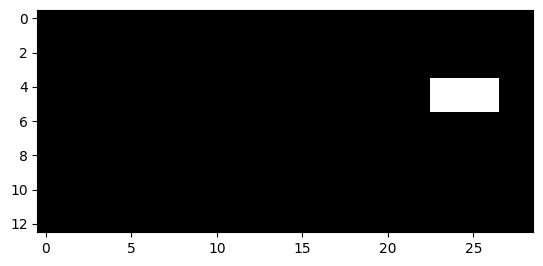

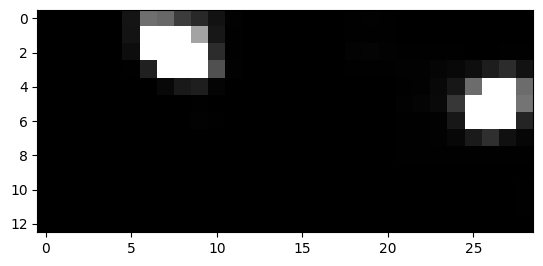

1869


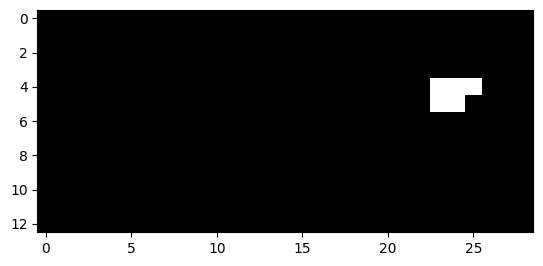

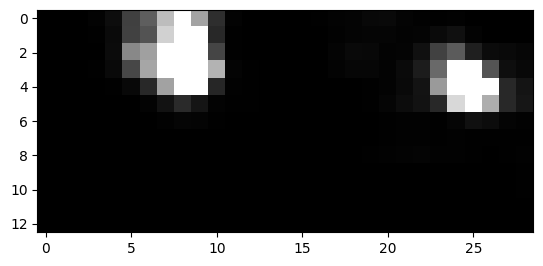

1876


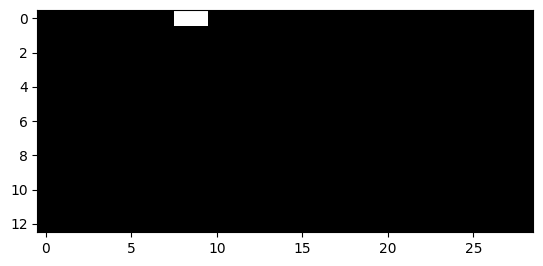

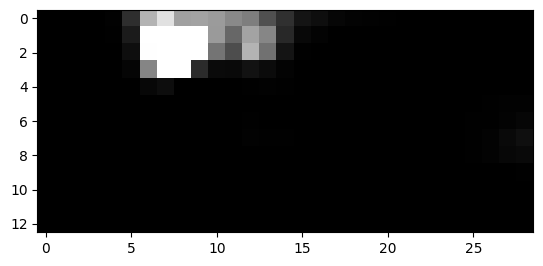

1877


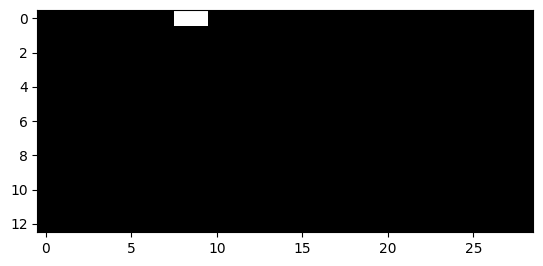

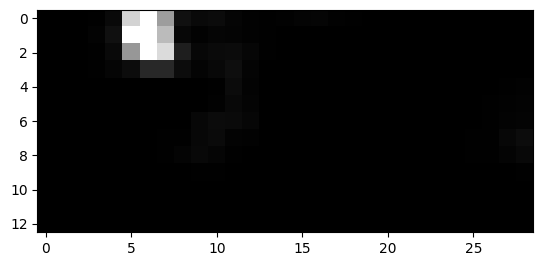

1882


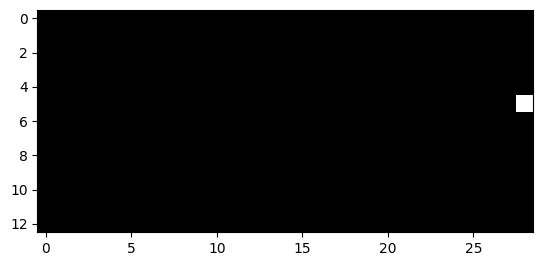

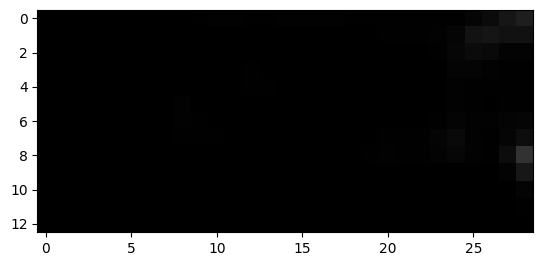

1883


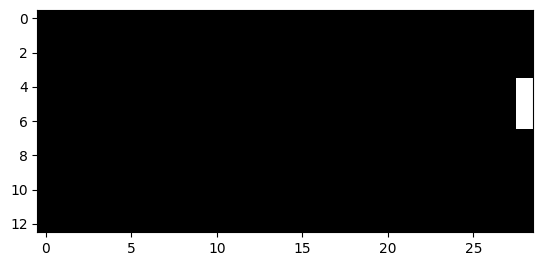

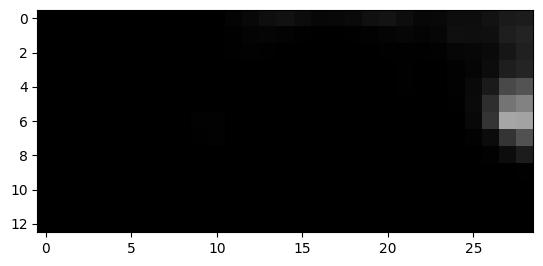

1884


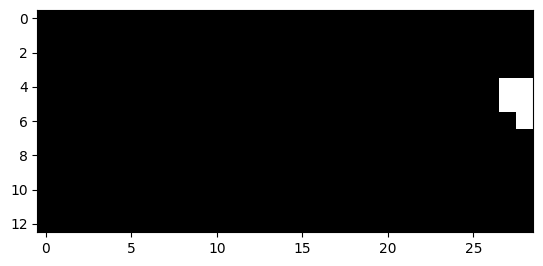

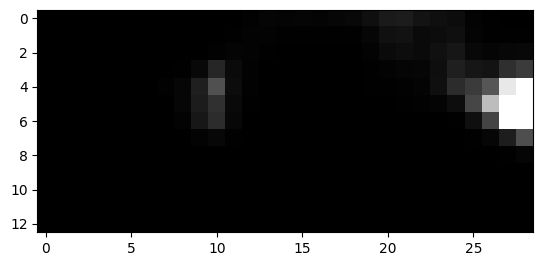

1885


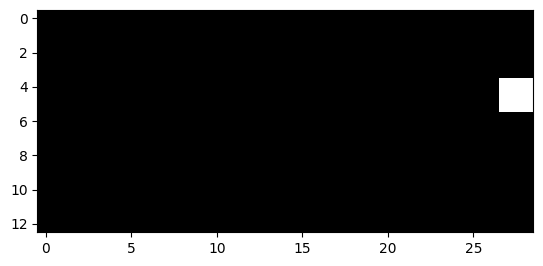

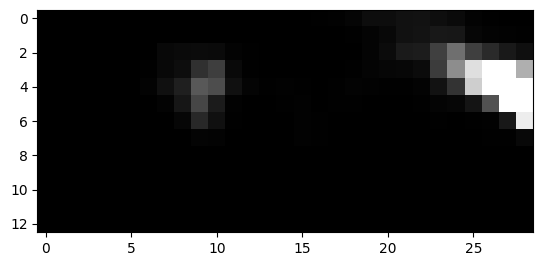

1886


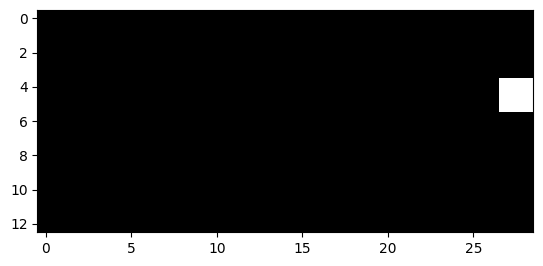

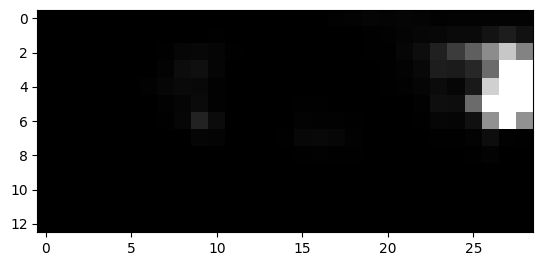

1887


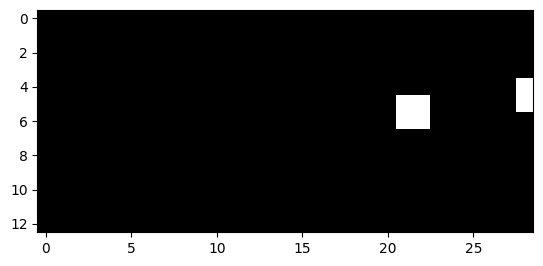

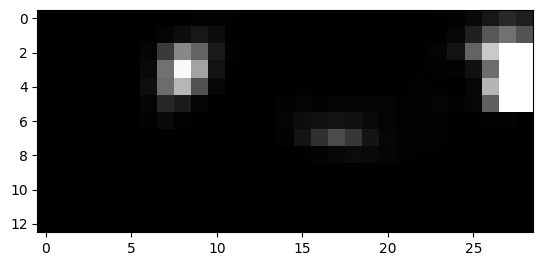

1888


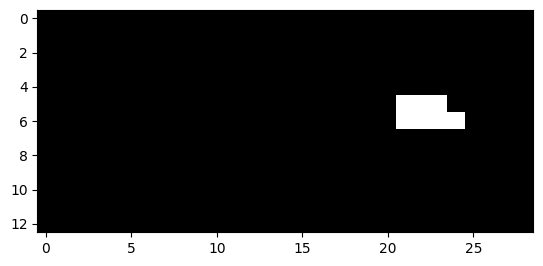

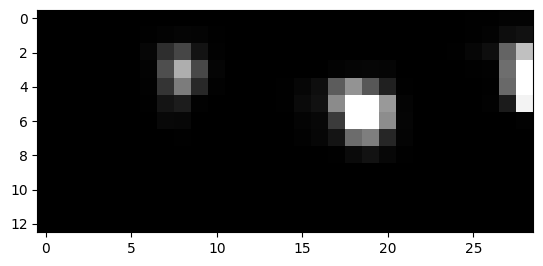

1889


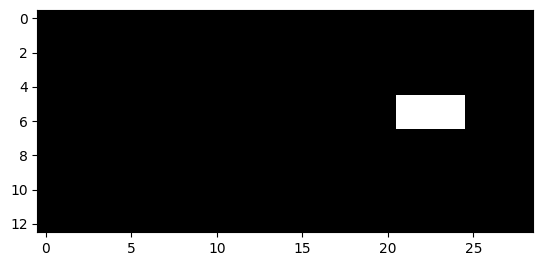

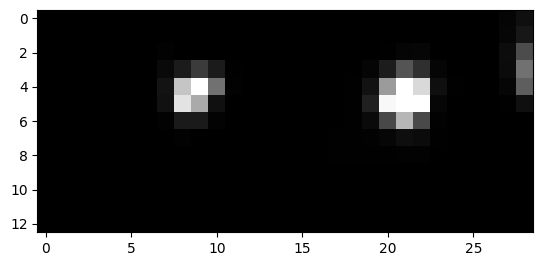

1890


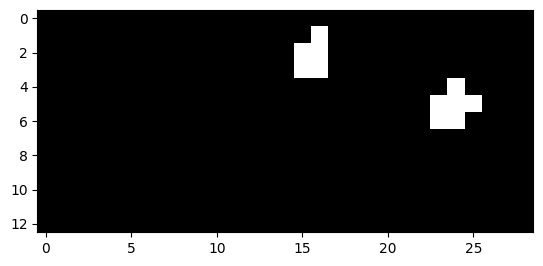

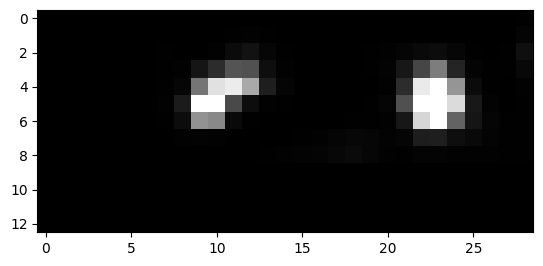

1891


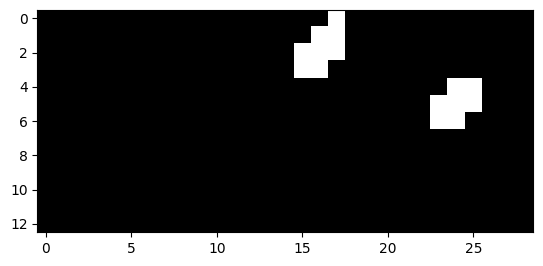

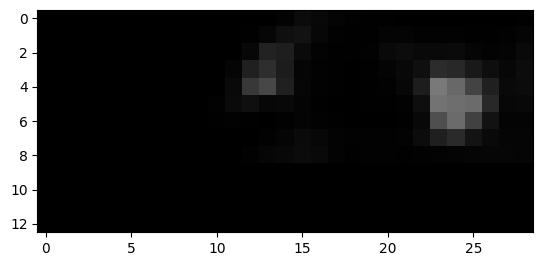

1892


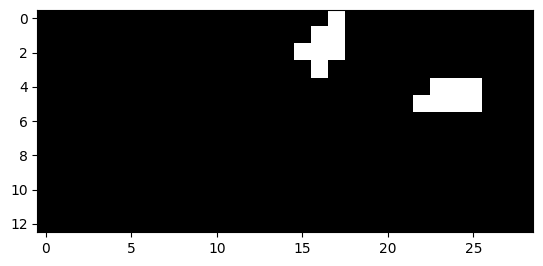

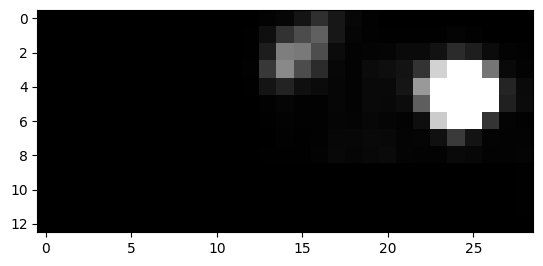

1893


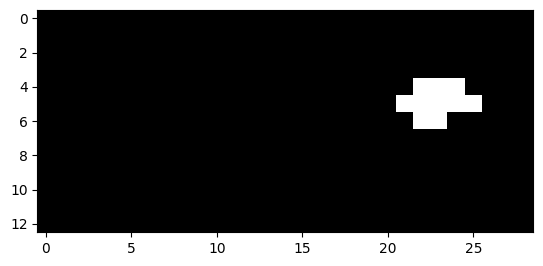

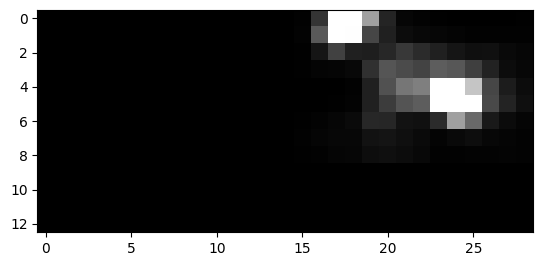

1894


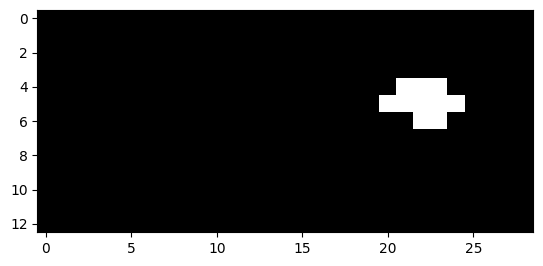

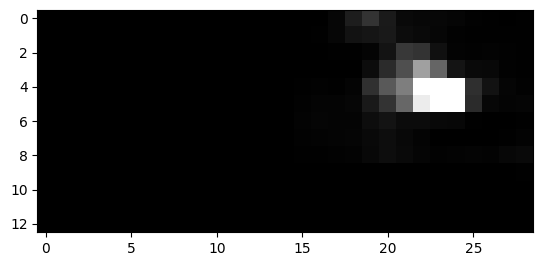

1895


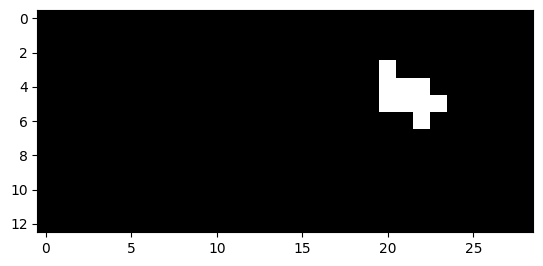

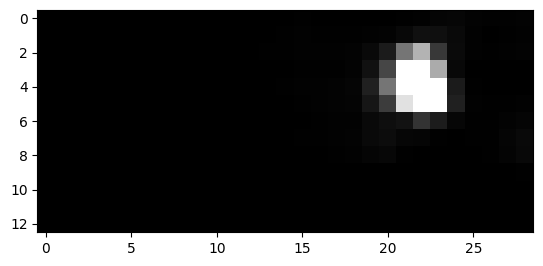

1896


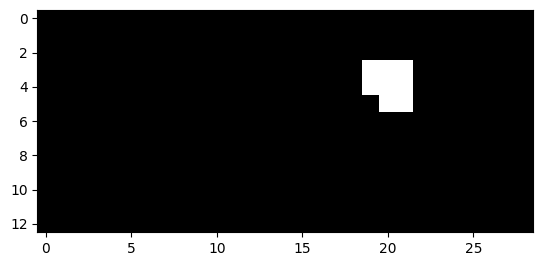

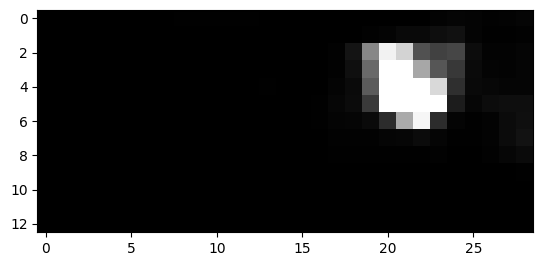

1897


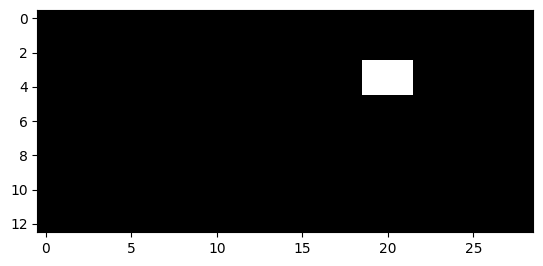

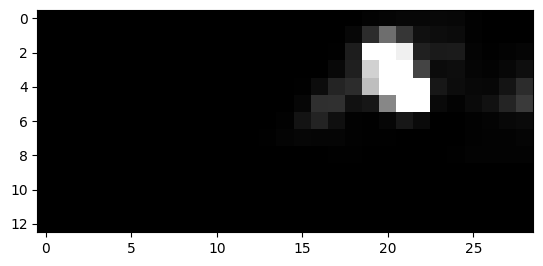

1898


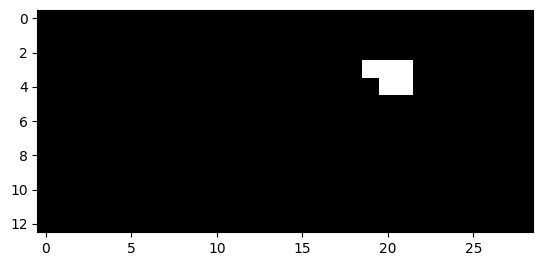

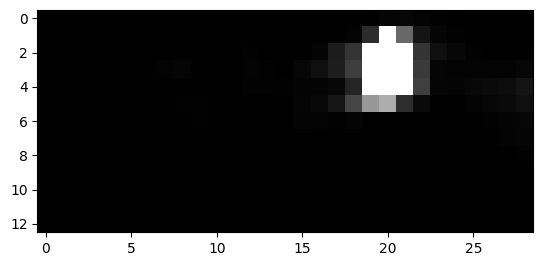

1899


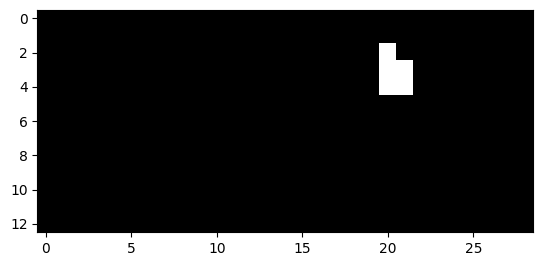

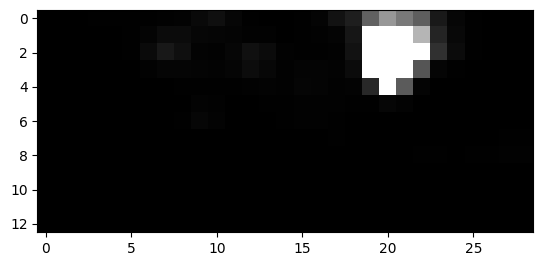

1900


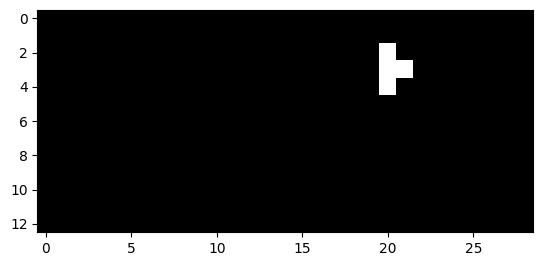

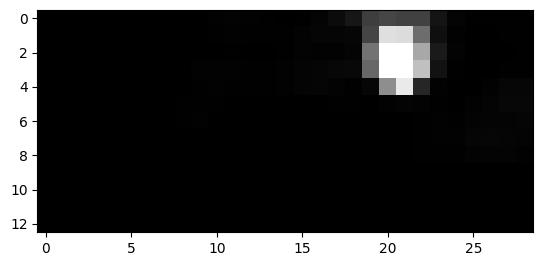

1935


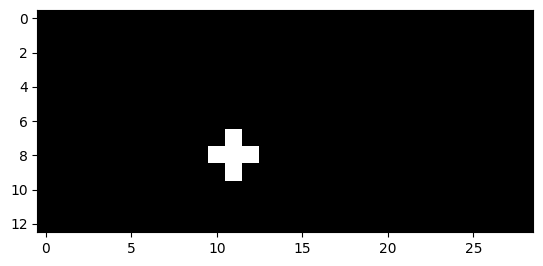

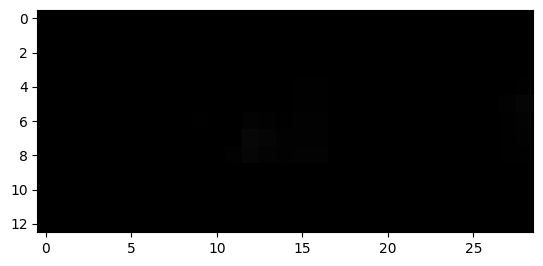

1936


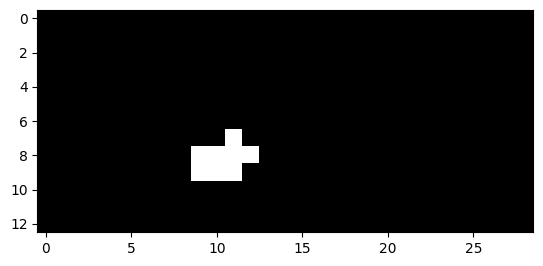

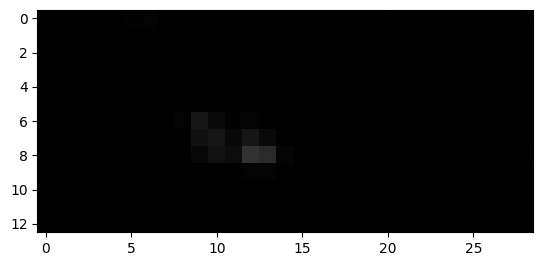

1937


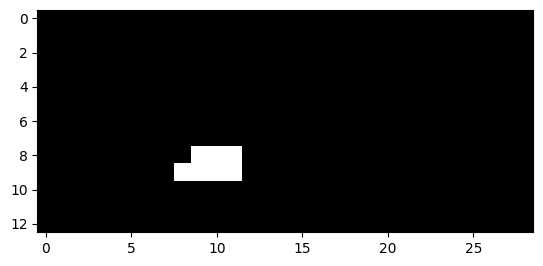

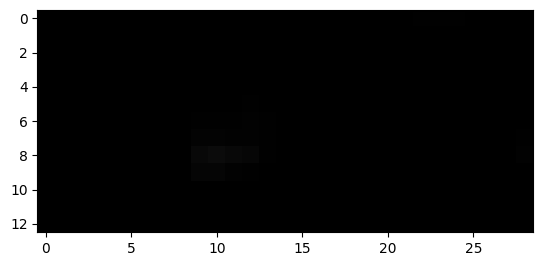

1938


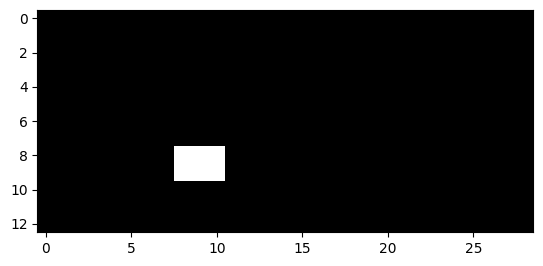

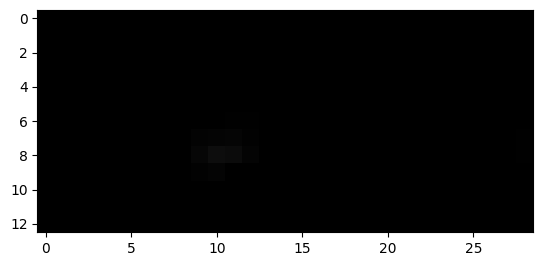

1939


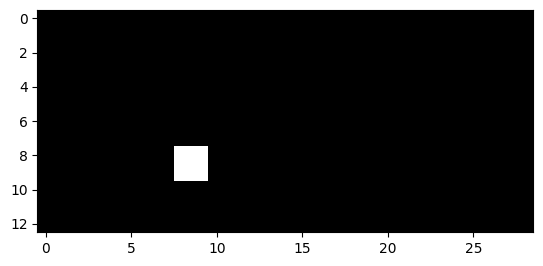

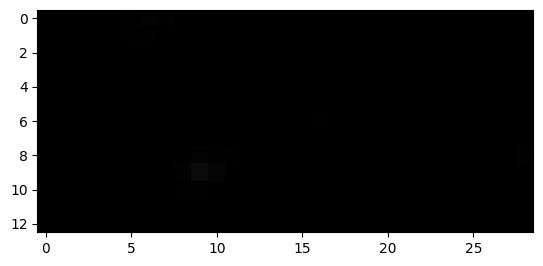

2212


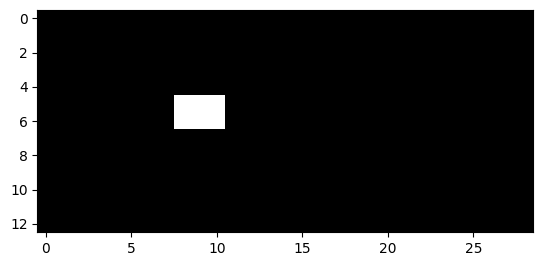

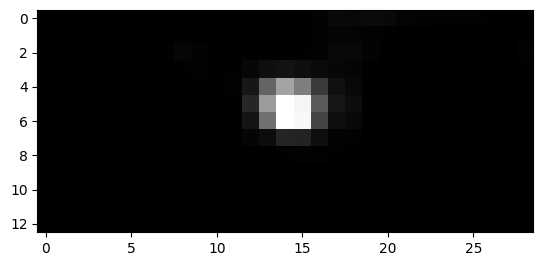

2213


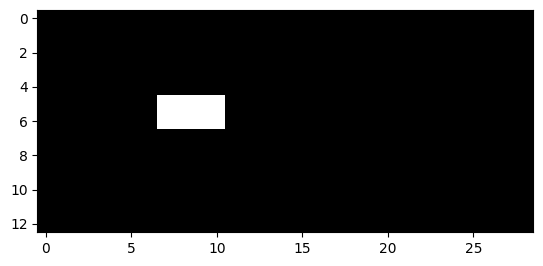

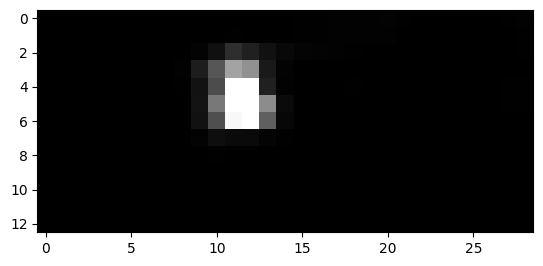

2214


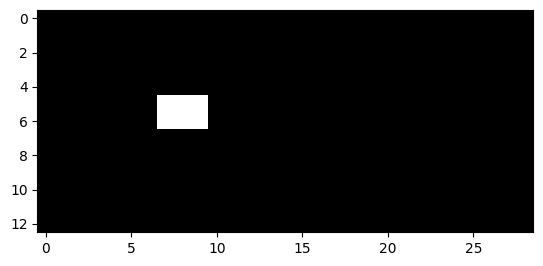

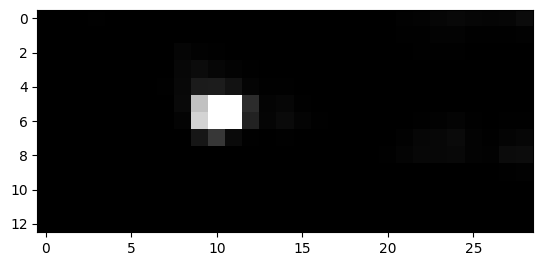

2216


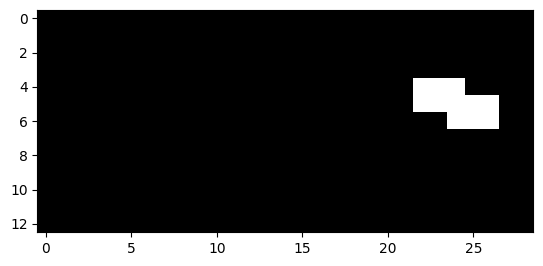

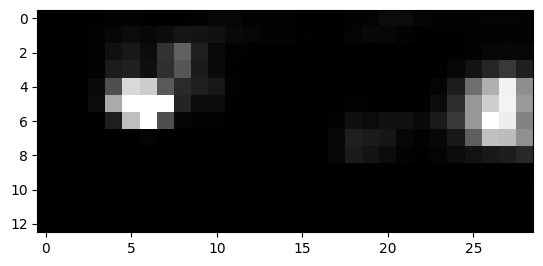

2217


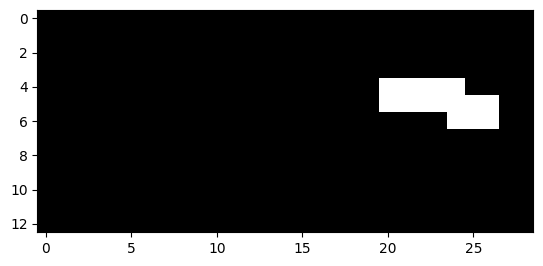

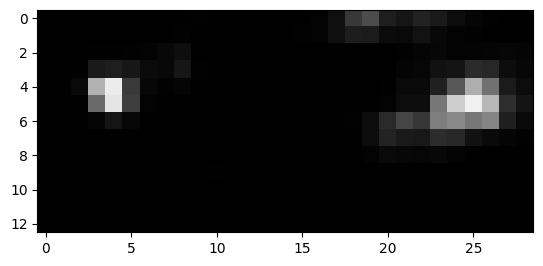

2218


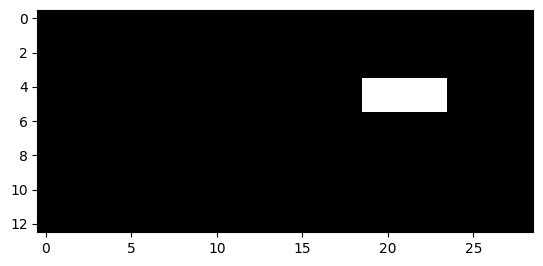

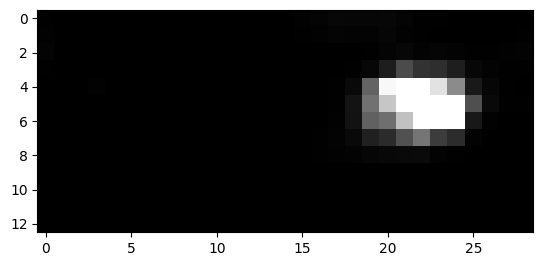

2219


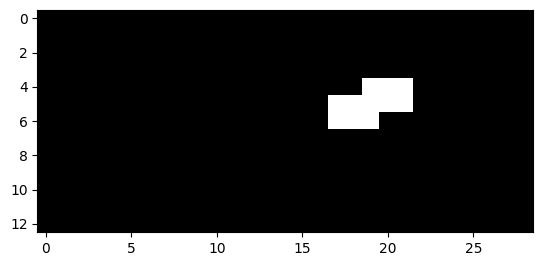

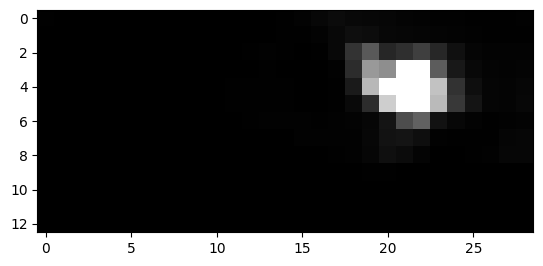

2220


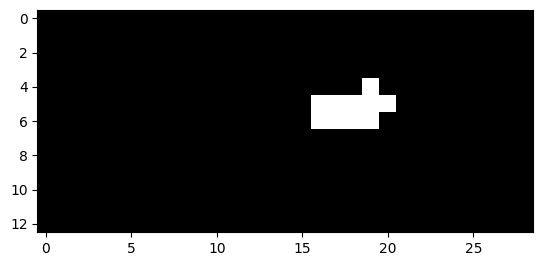

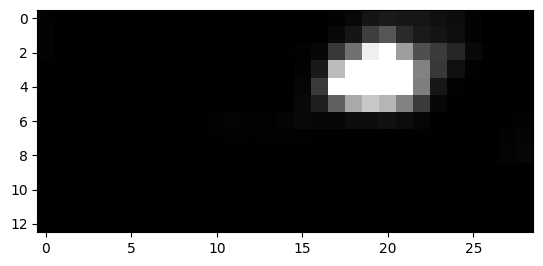

2221


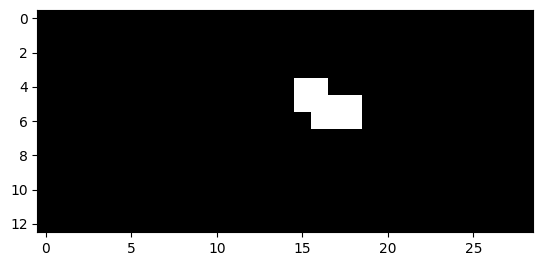

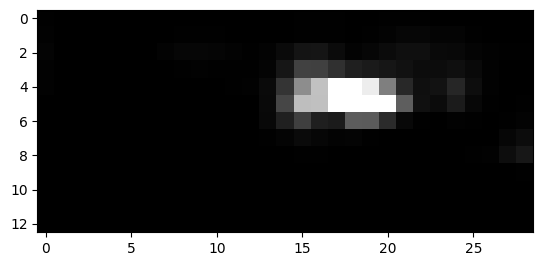

2222


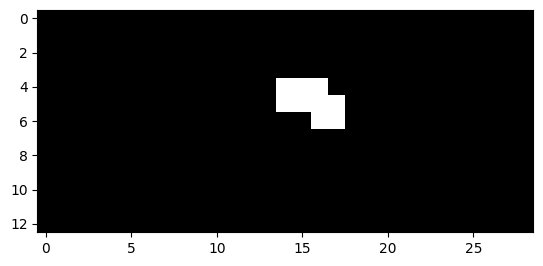

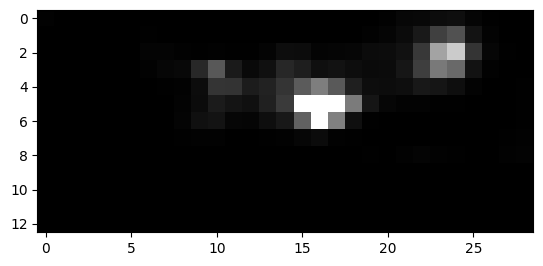

2223


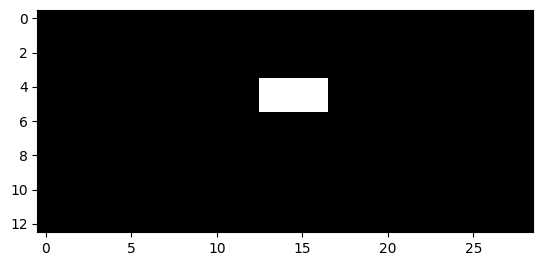

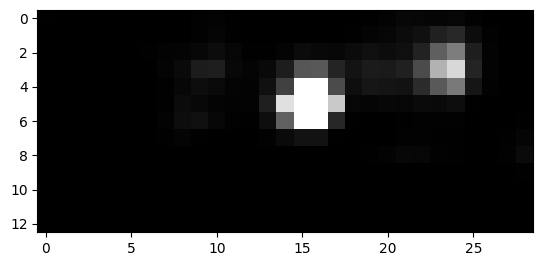

2224


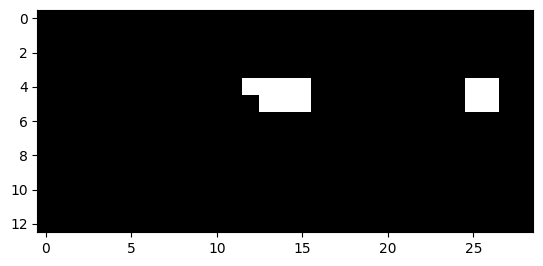

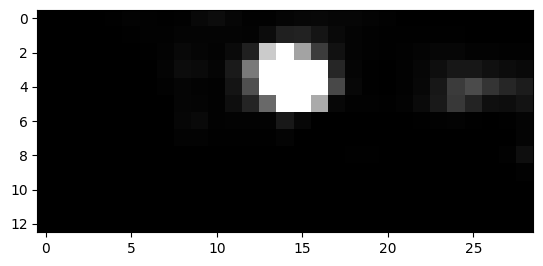

2225


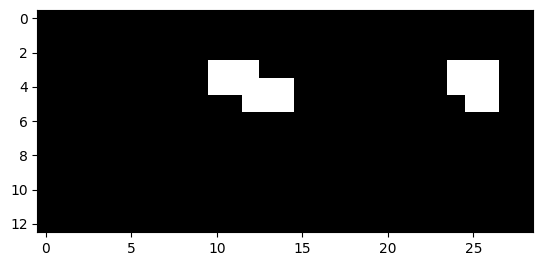

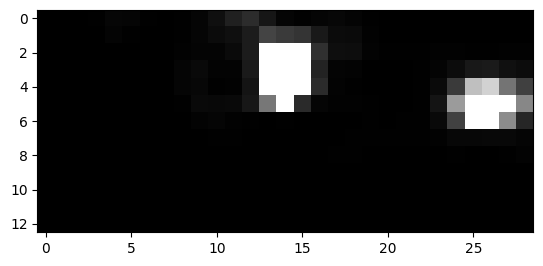

2226


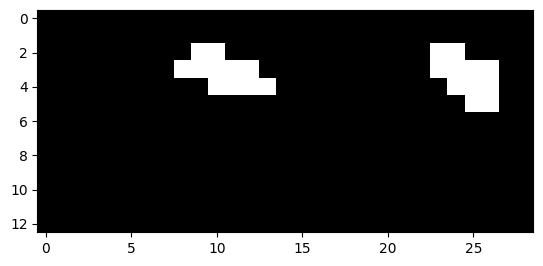

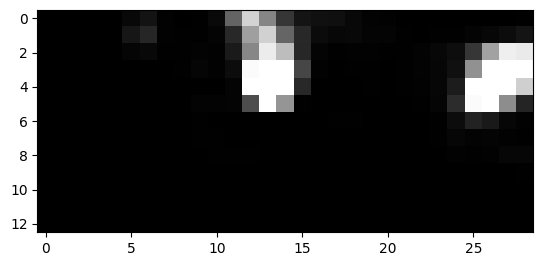

2227


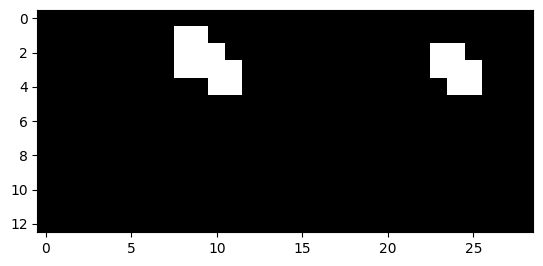

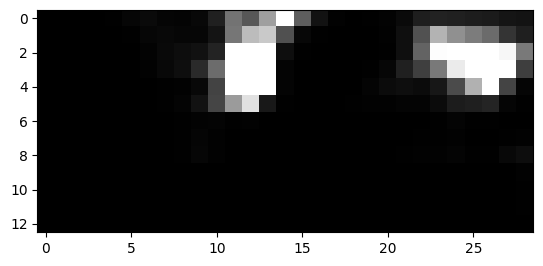

2228


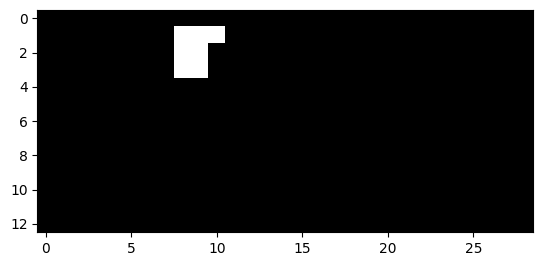

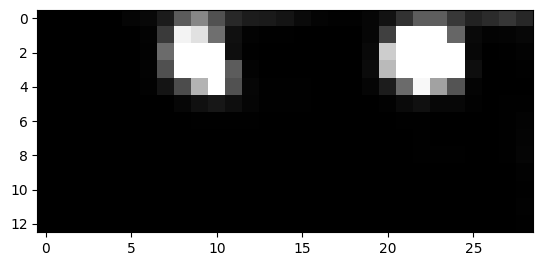

2229


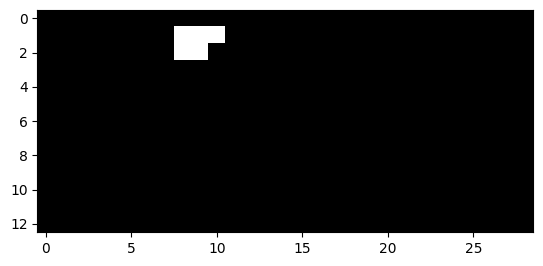

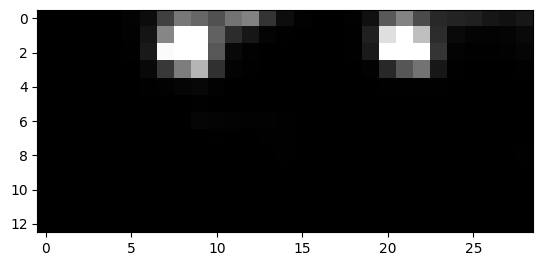

2233


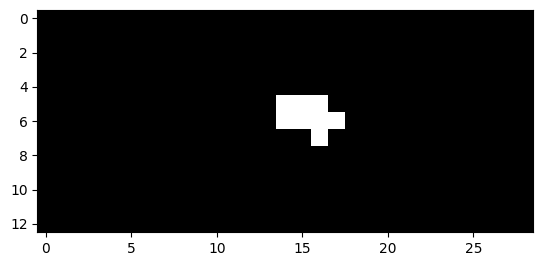

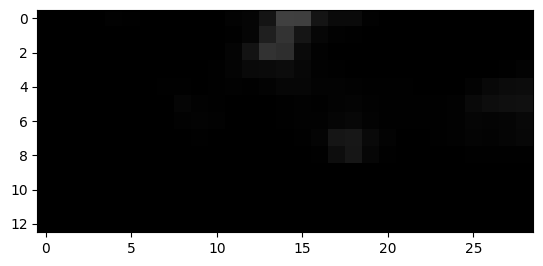

2234


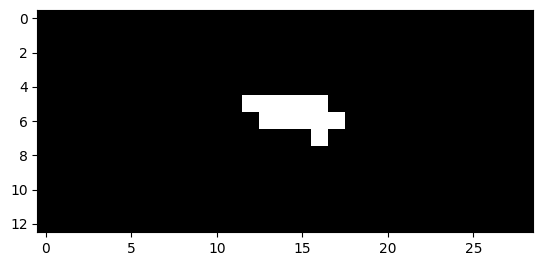

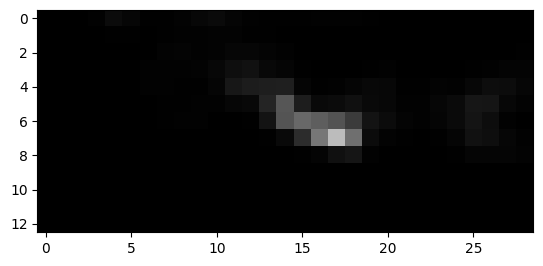

2235


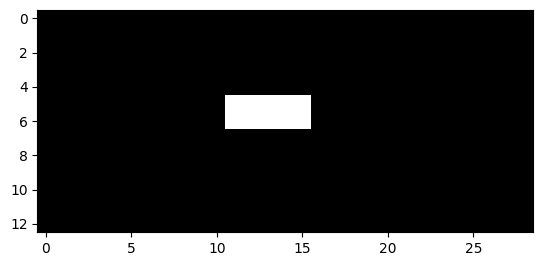

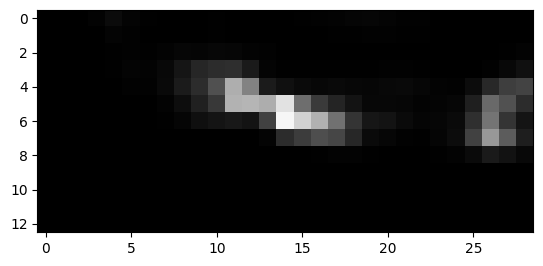

2236


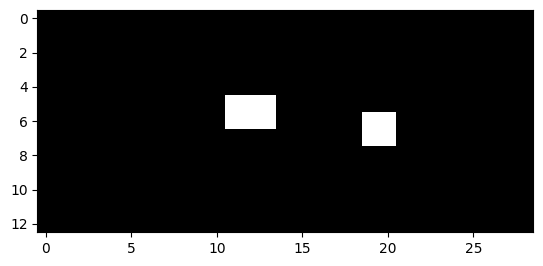

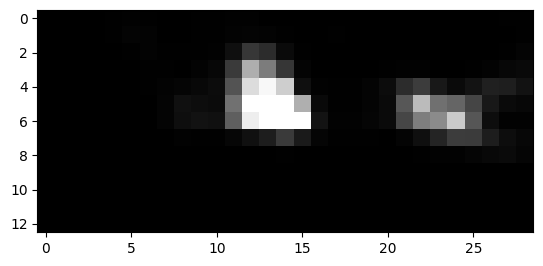

2237


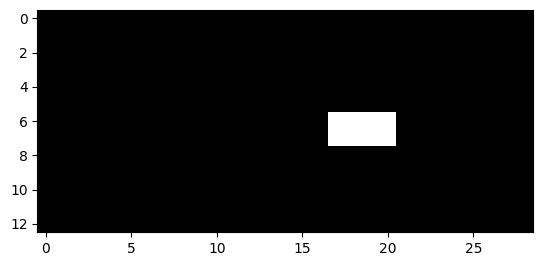

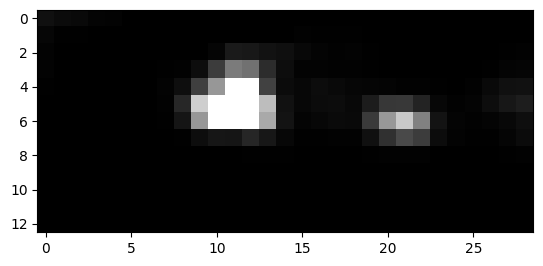

2238


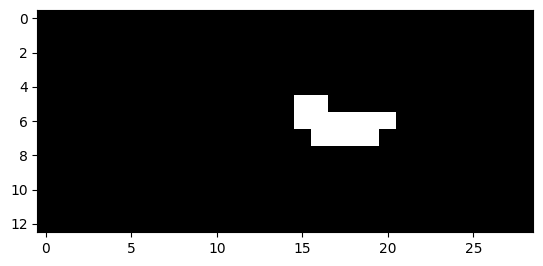

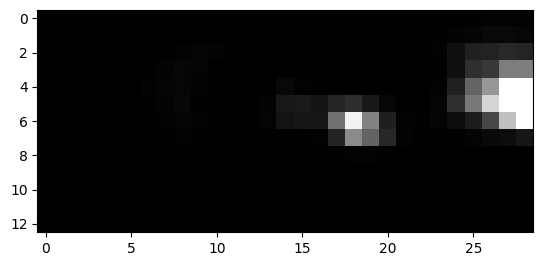

2239


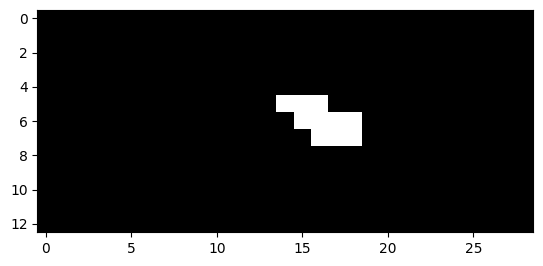

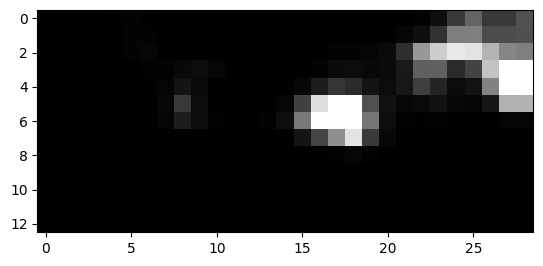

2240


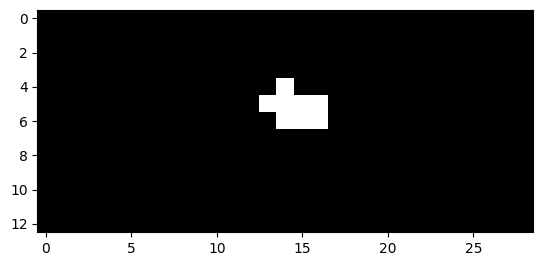

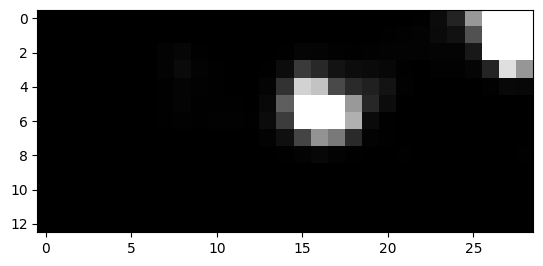

2241


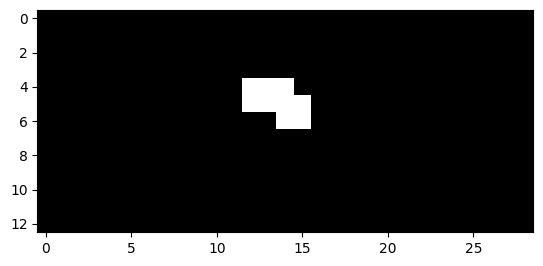

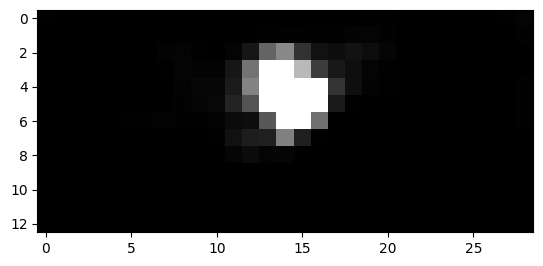

2242


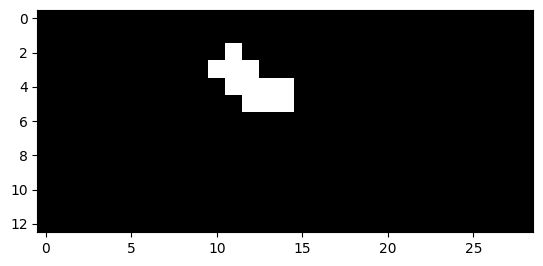

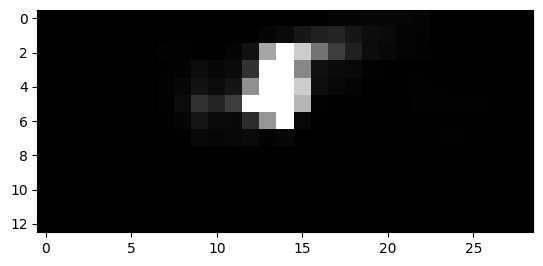

2243


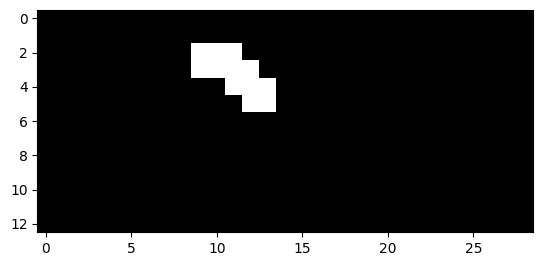

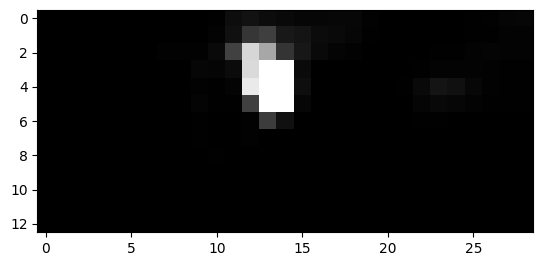

2244


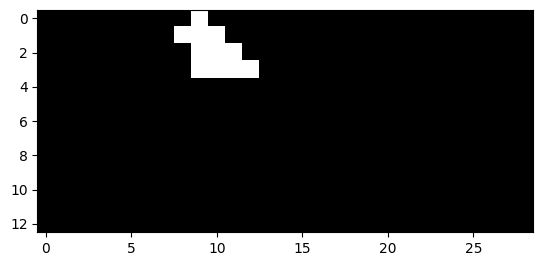

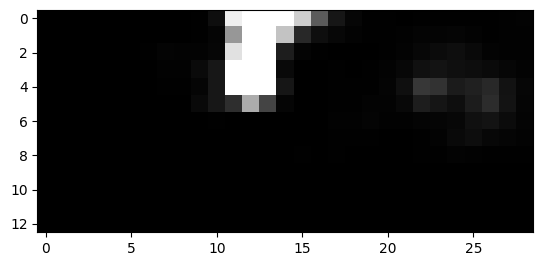

2245


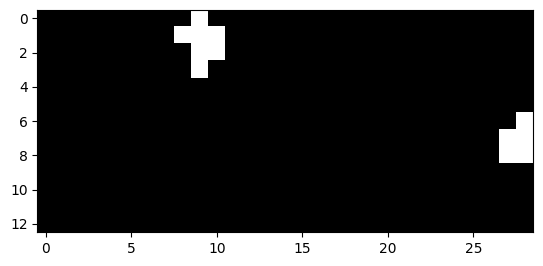

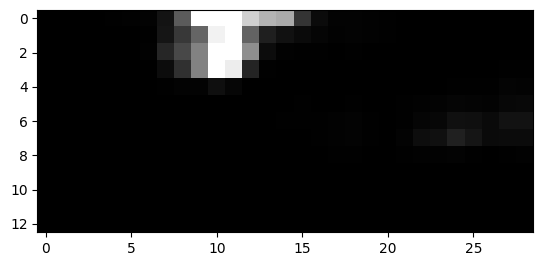

2246


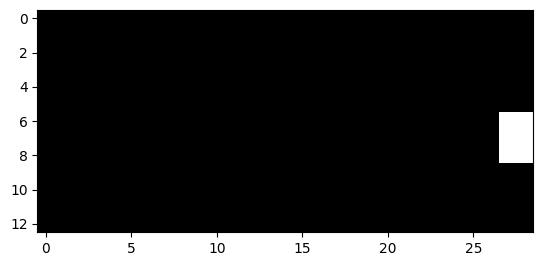

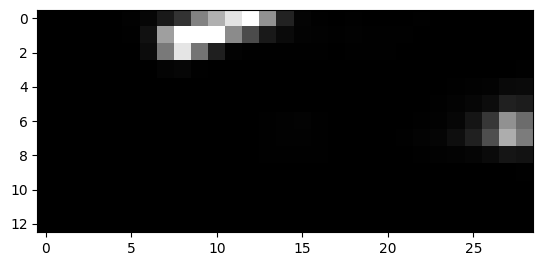

2247


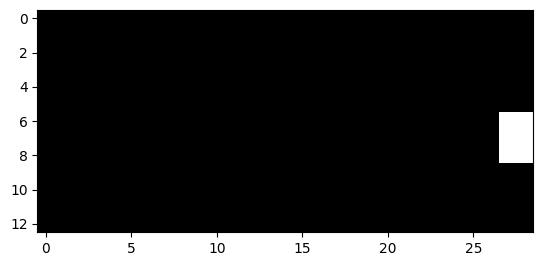

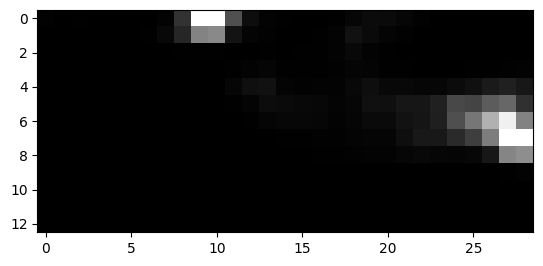

2256


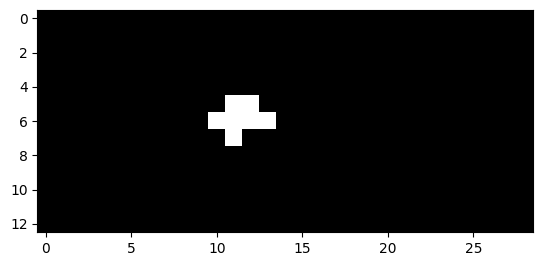

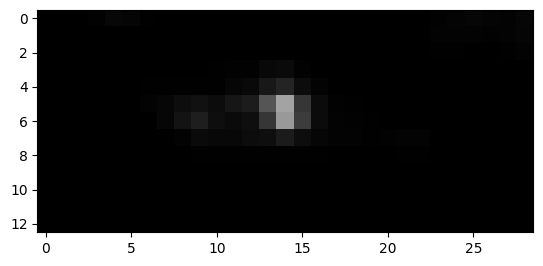

2257


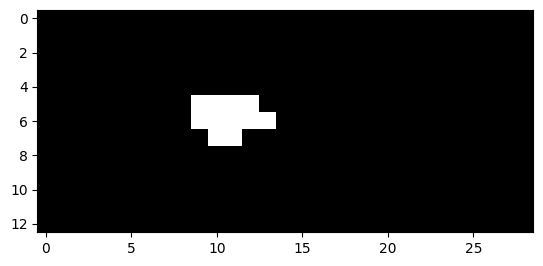

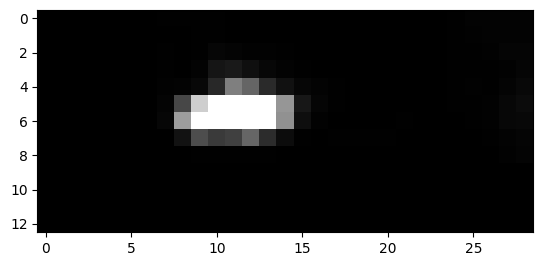

2258


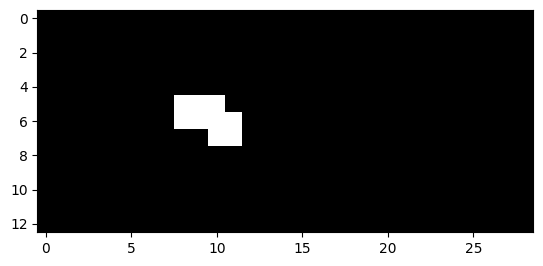

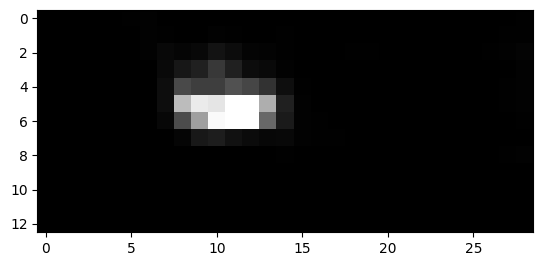

2259


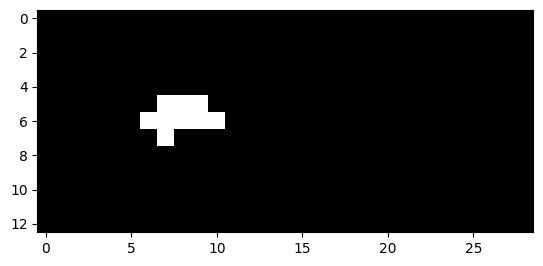

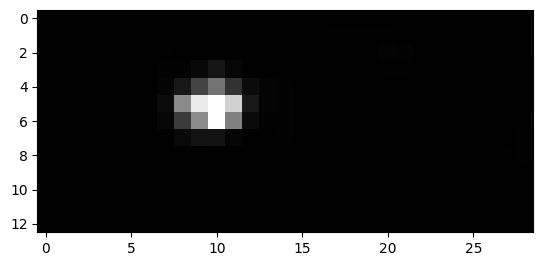

2260


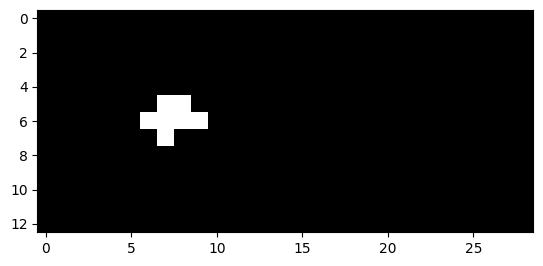

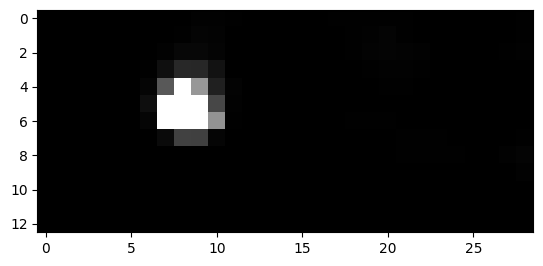

2261


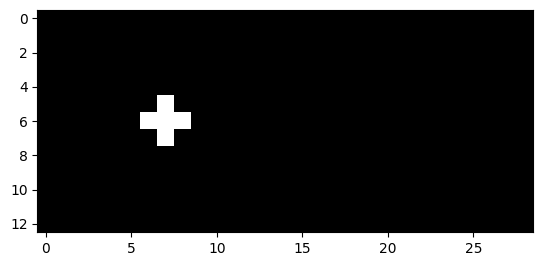

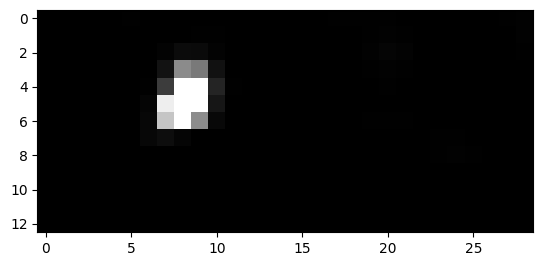

2264


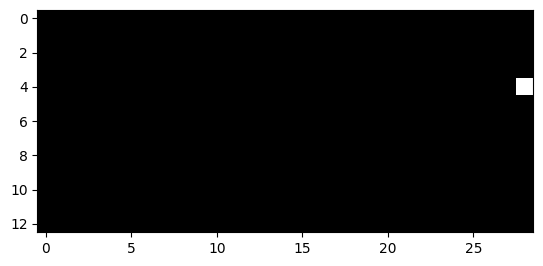

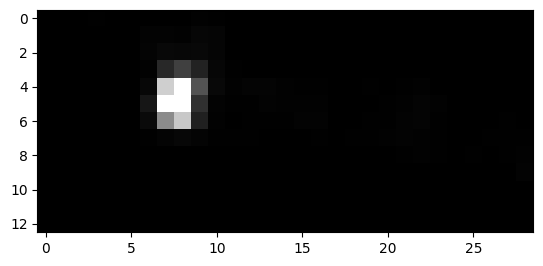

2265


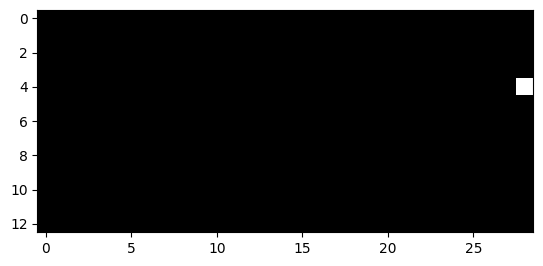

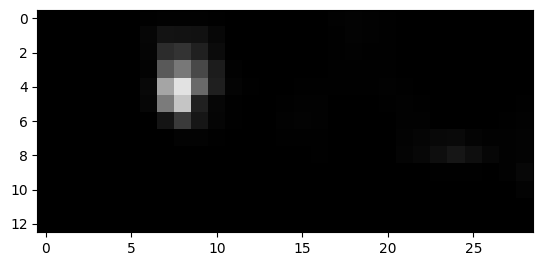

2271


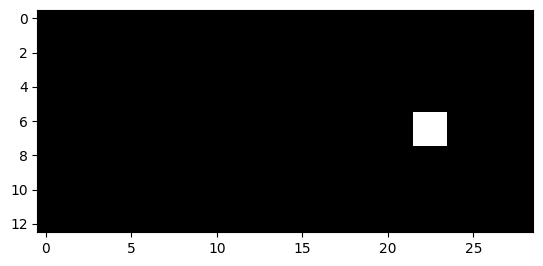

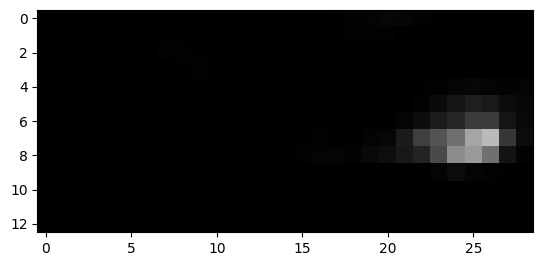

2272


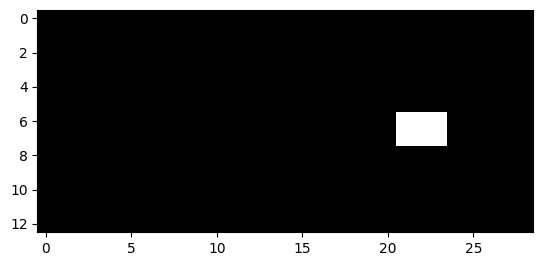

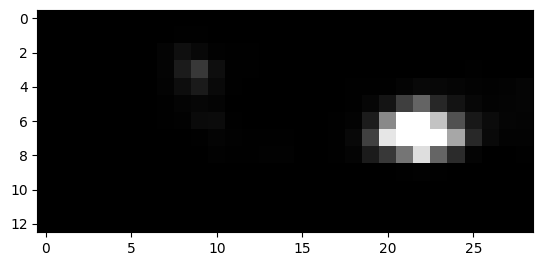

2273


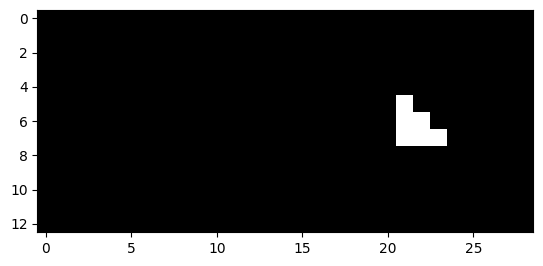

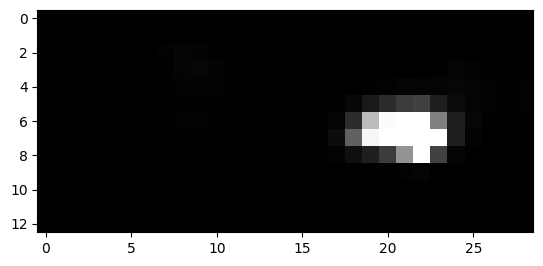

2274


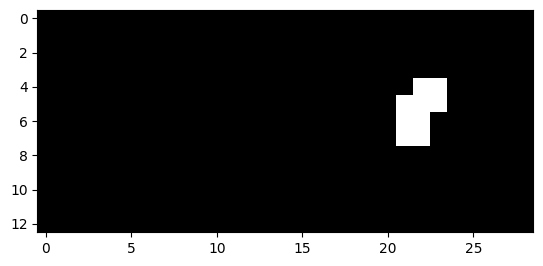

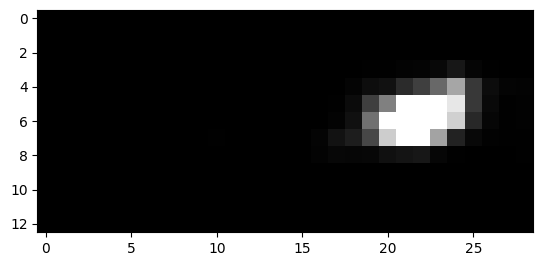

2275


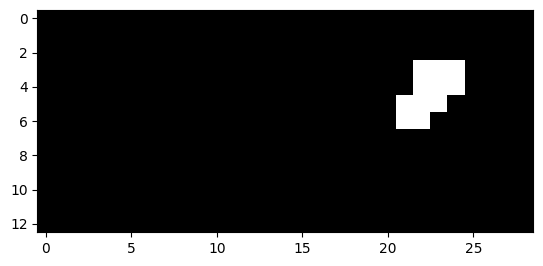

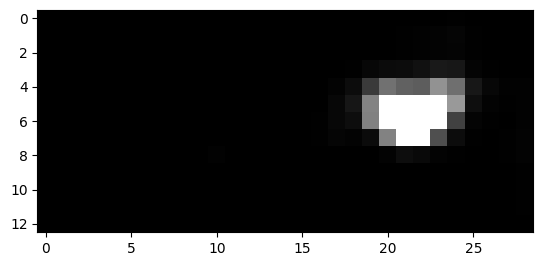

2276


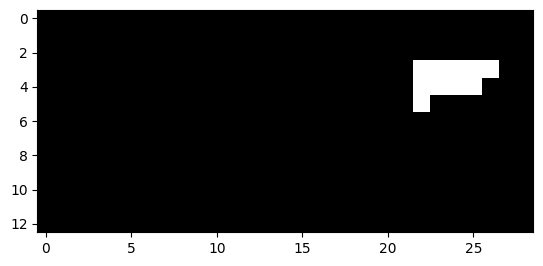

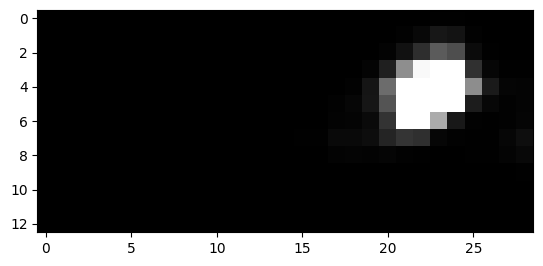

2277


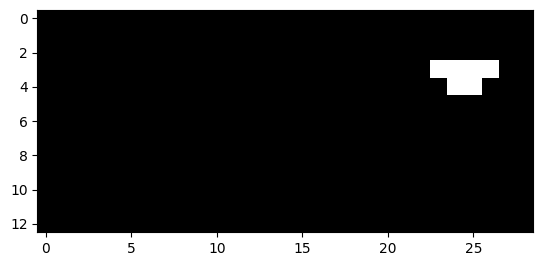

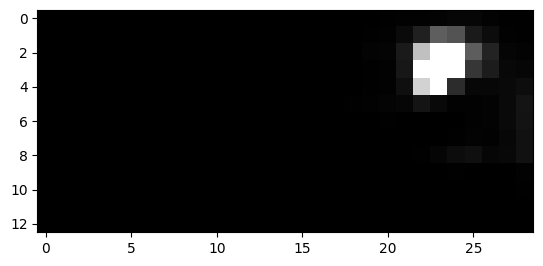

2278


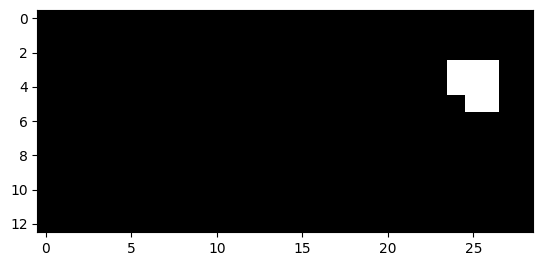

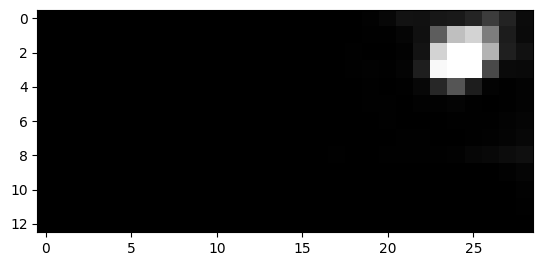

2279


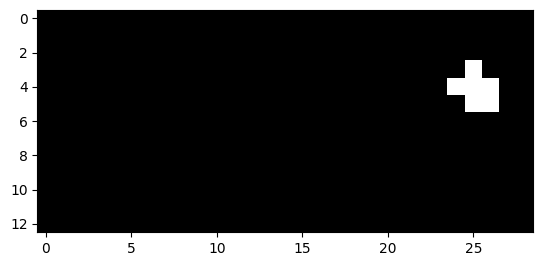

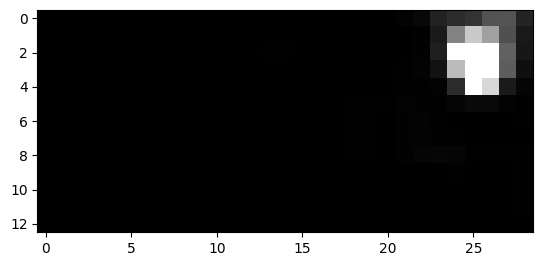

2280


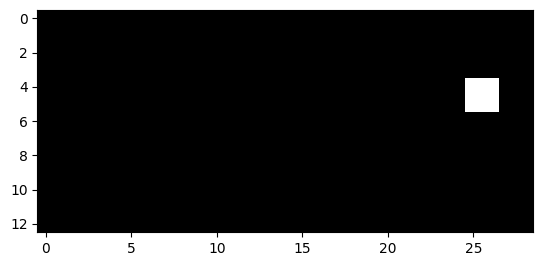

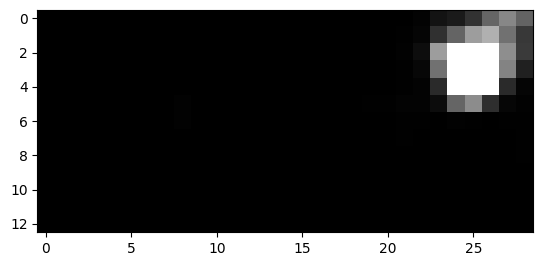

2281


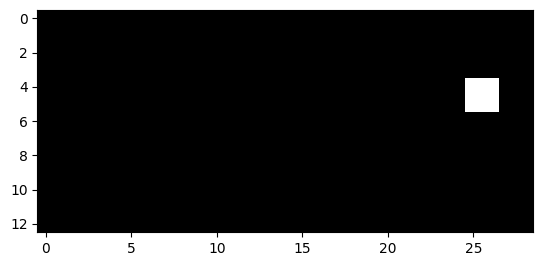

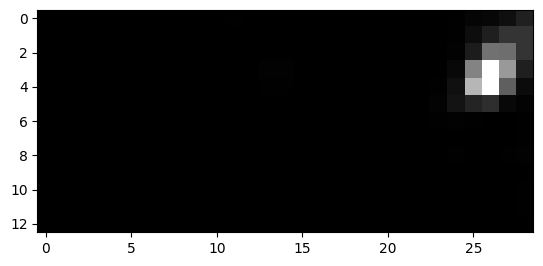

2304


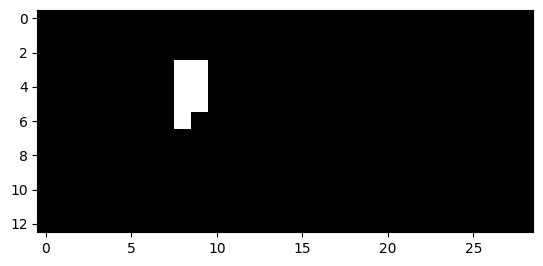

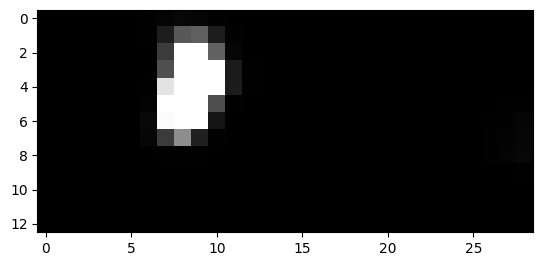

2305


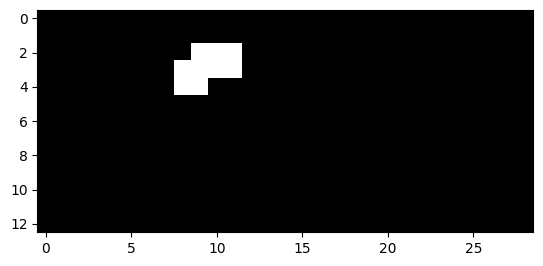

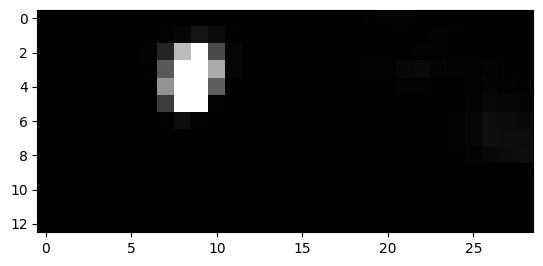

2306


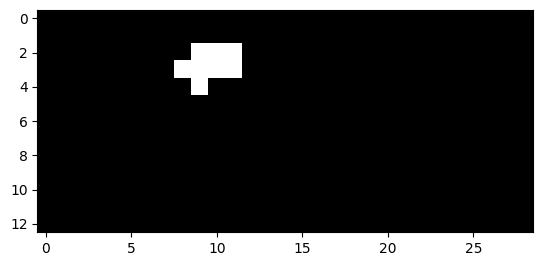

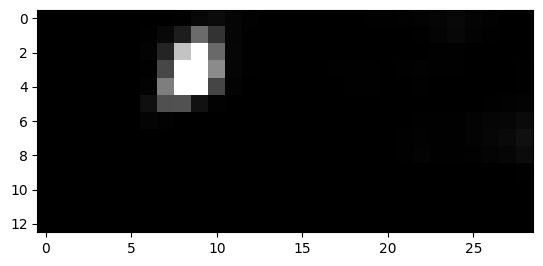

2316


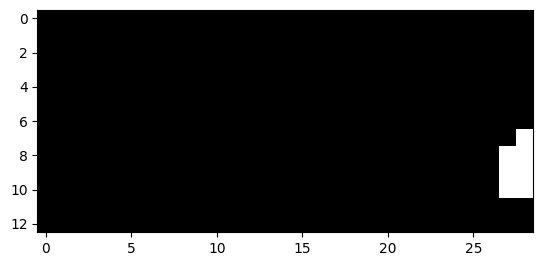

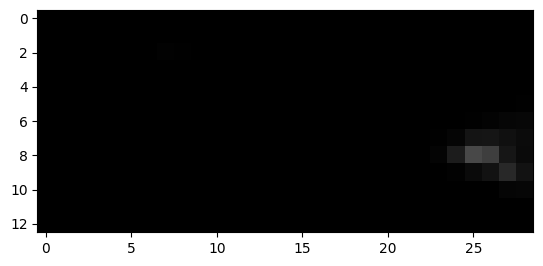

2317


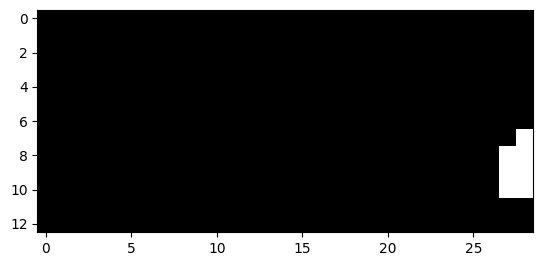

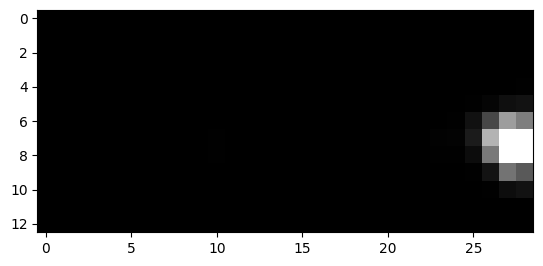

2318


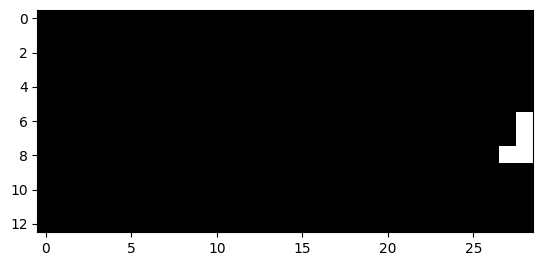

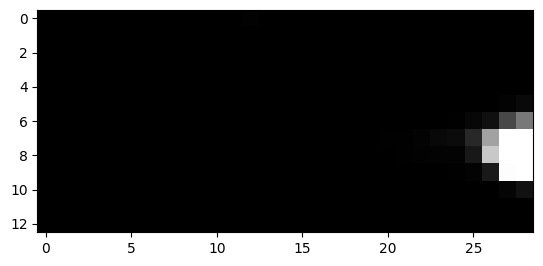

2319


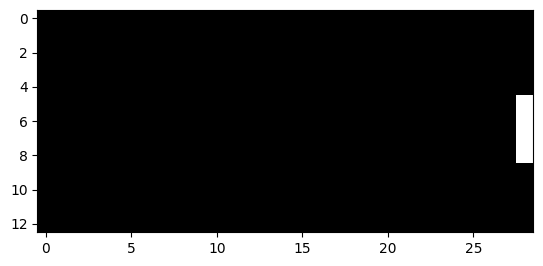

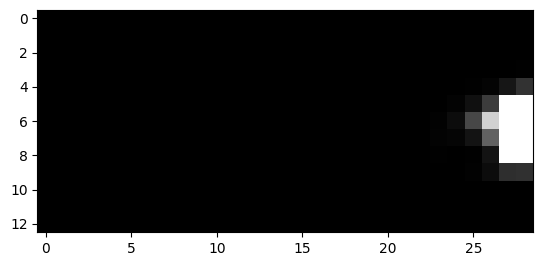

2320


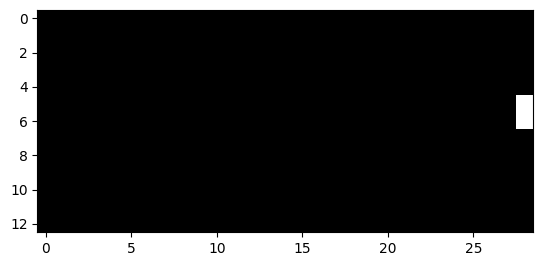

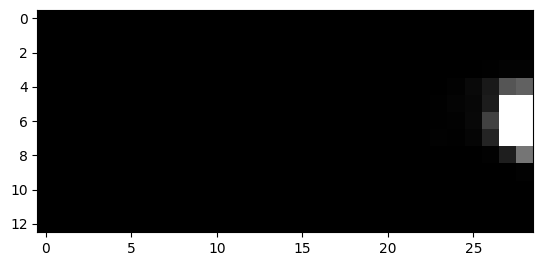

426


In [24]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

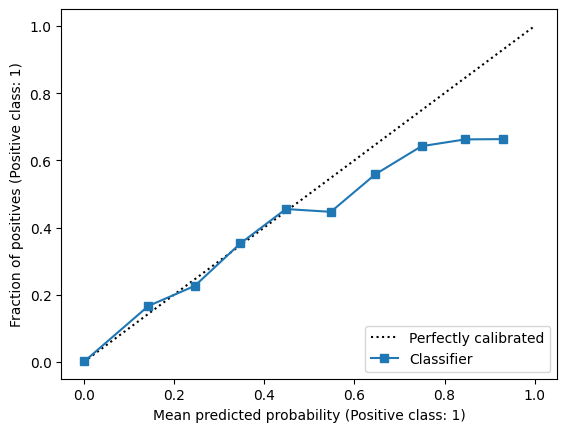

In [27]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [28]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette
brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1))

0.002781679674613579

In [29]:
brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1))))

0.003674315785761041

### another

In [30]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(9, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(9, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 9)         738       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 9)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 9)          738       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 9)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         82        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [31]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-02 09:08:01.080857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0480

2023-03-02 09:08:04.399642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 9ms/step - loss: 0.0480 - val_loss: 0.0175
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0159 - val_loss: 0.0136
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0149 - val_loss: 0.0129
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0130 - val_loss: 0.0112
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0126 - val_loss: 0.0108
E

60/80 [=====================>........] - ETA: 0s

2023-03-02 09:11:04.988833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 0s 2ms/step


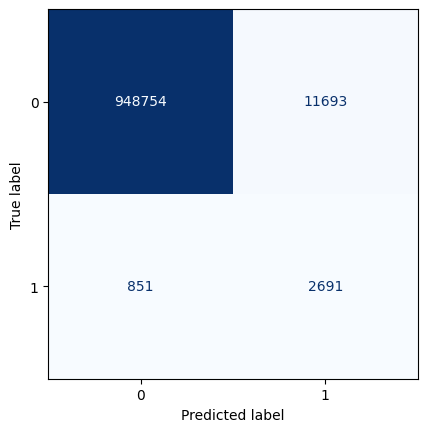

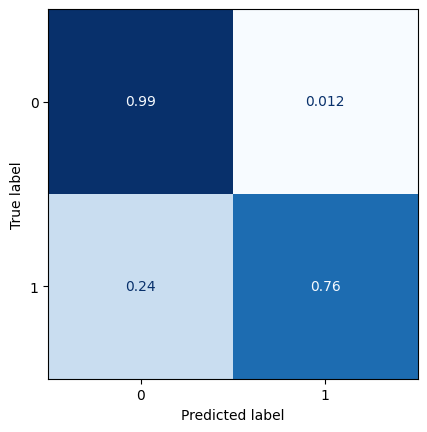

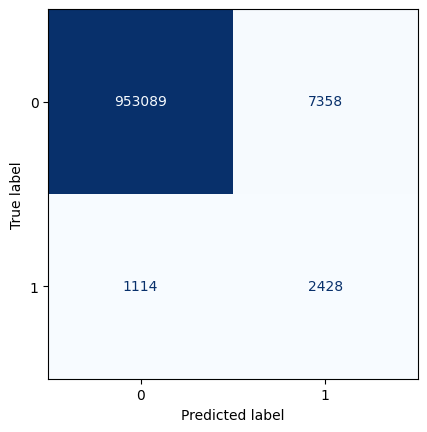

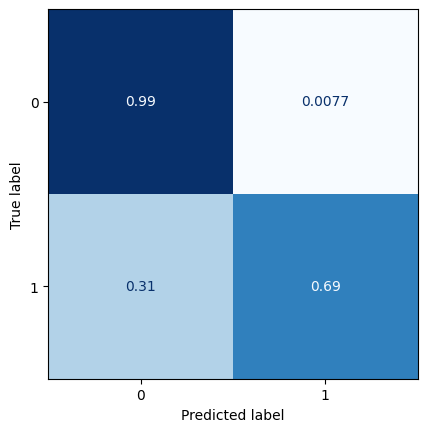

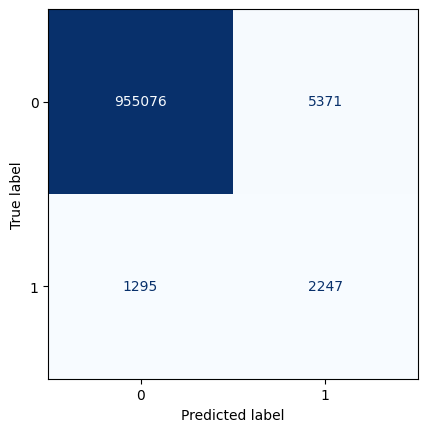

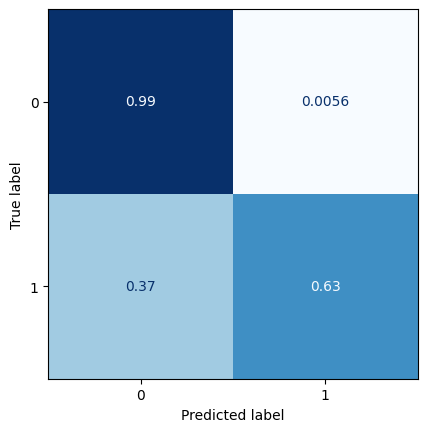

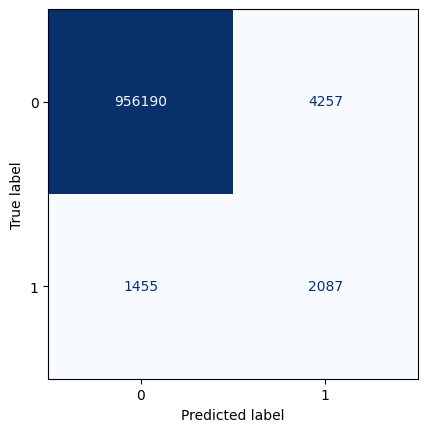

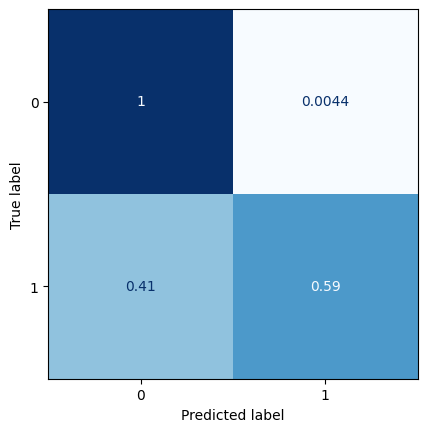

In [33]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    t = model.predict(test_img_std)
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

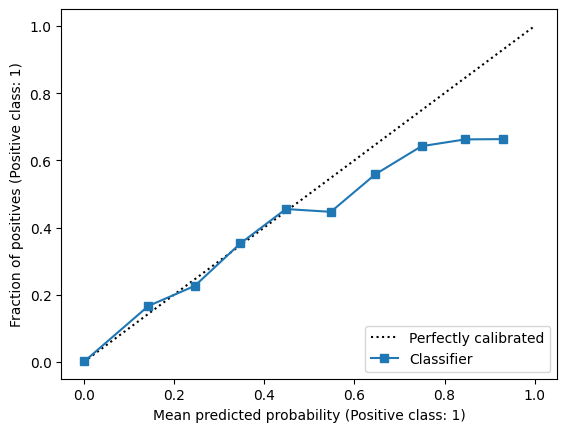

In [32]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


### simpler

In [36]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 13, 29, 4)         328       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 15, 4)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 15, 4)          148       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 4)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 30, 1)         37        
                                                                 
 cropping2d_4 (Cropping2D)   (None, 13, 29, 1)        

In [37]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-02 09:12:18.037696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0980

2023-03-02 09:12:21.015715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0980 - val_loss: 0.0227
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0231 - val_loss: 0.0177
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0199 - val_loss: 0.0159
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0184 - val_loss: 0.0151
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0175 - val_loss: 0.0146
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0161 - val_loss: 0.0133
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0154 - val_loss: 0.0128
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0148 - val_loss: 0.0126
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0145 - val_loss: 0.0128
E

354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 82/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 83/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 84/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 85/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0106
Epoch 86/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 87/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 88/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 89/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 90/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0118 - val_loss: 

45/45 [==============================] - 0s 2ms/step


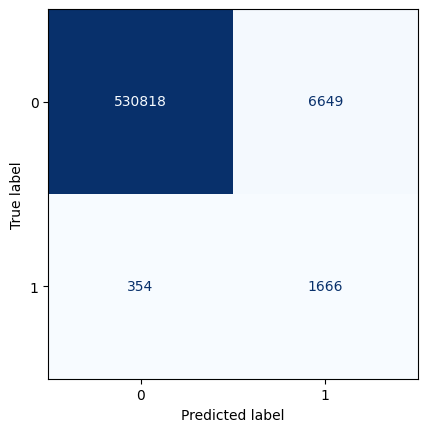

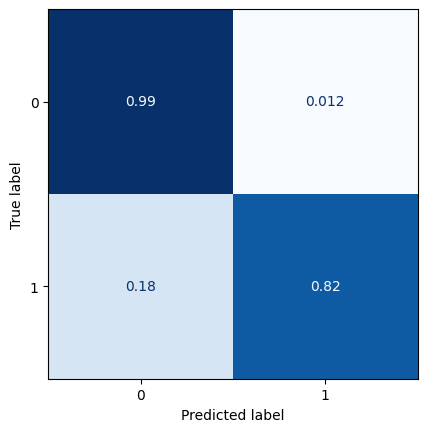

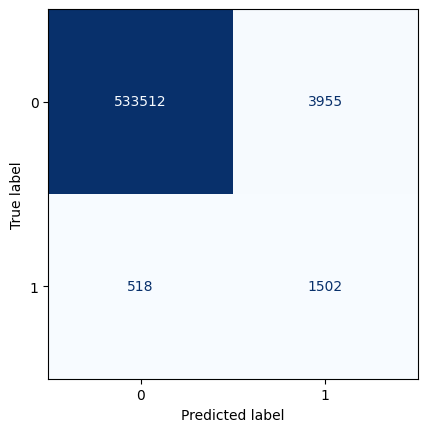

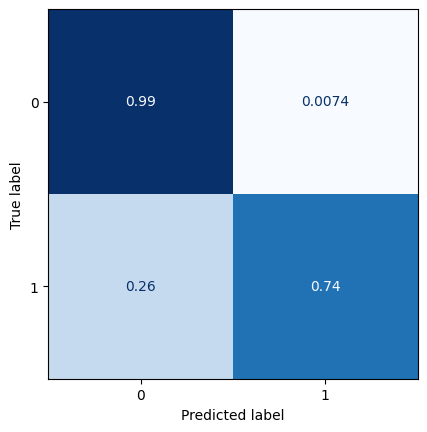

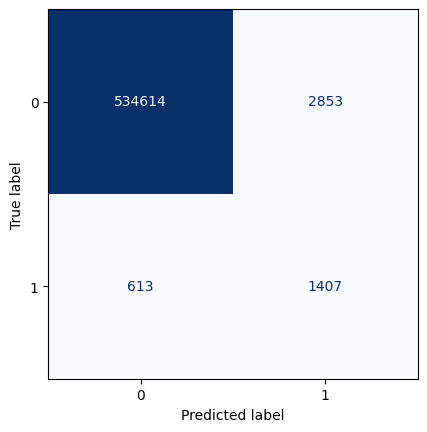

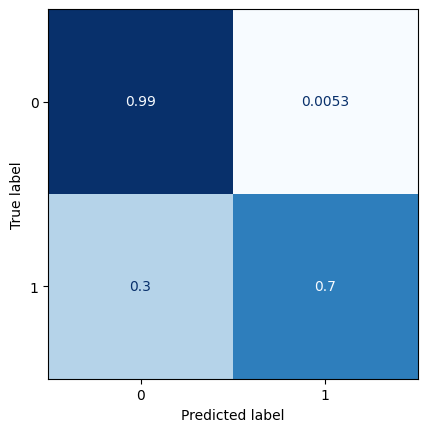

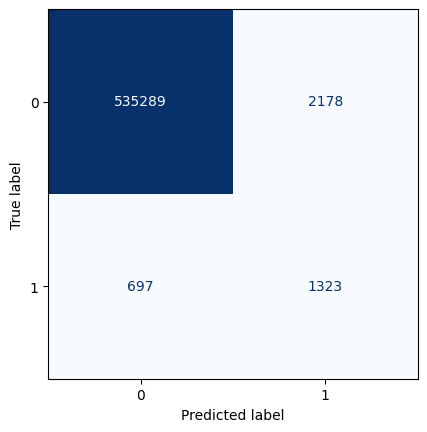

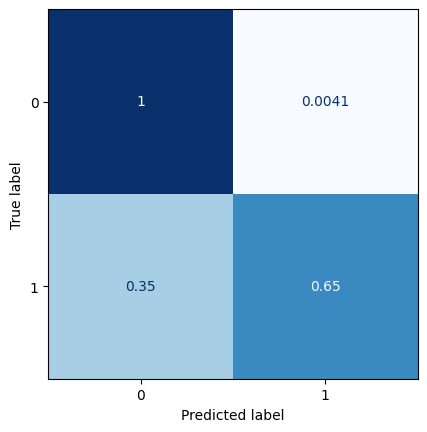

In [41]:
t = []
t = model.predict(test_img_std[:1431])

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    t = model.predict(test_img_std[:1431])
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img[:1431].reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img[:1431].reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

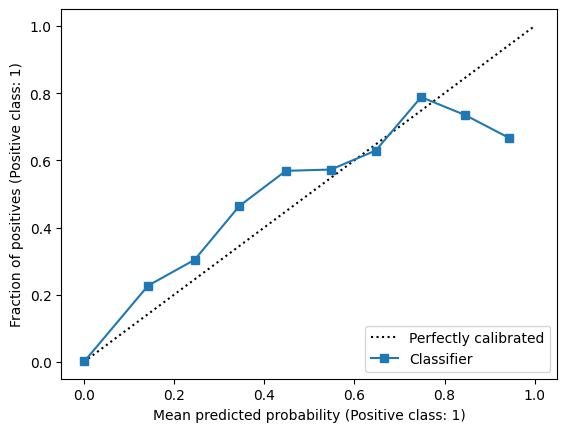

In [46]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img[:1431].reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [47]:
brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1))

ValueError: Found input variables with inconsistent numbers of samples: [963989, 539487]

# Only the sea

# Higher threshold for class 1

In [48]:
train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [49]:
y_train_img = extract_images(y_train, variables, verbose=True)
y_val_img = extract_images(y_val, variables, verbose=True)
y_test_img = extract_images(y_test, variables, verbose=True)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [50]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_5 (Cropping2D)   (None, 13, 29, 1)        

In [51]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-03 18:00:45.946799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0302

2023-03-03 18:00:49.262493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 9ms/step - loss: 0.0302 - val_loss: 0.0136
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0139 - val_loss: 0.0114
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0124 - val_loss: 0.0105
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0116 - val_loss: 0.0099
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0102 - val_loss: 0.0092
E

354/354 [==============================] - 3s 8ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 82/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 83/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 84/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 85/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 86/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 87/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 88/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 89/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 90/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 

58/80 [====================>.........] - ETA: 0s

2023-03-03 18:05:13.678373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 0s 3ms/step


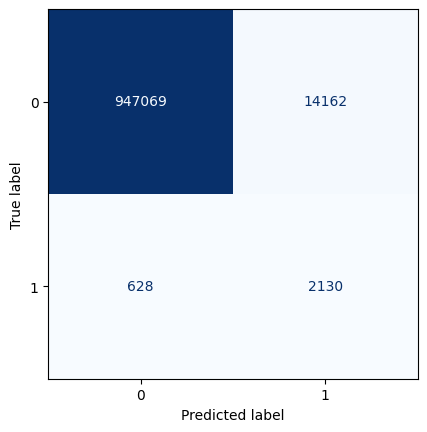

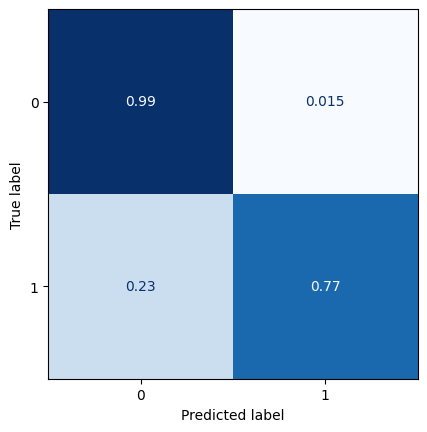

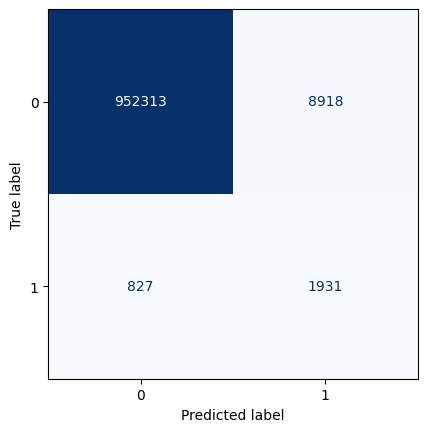

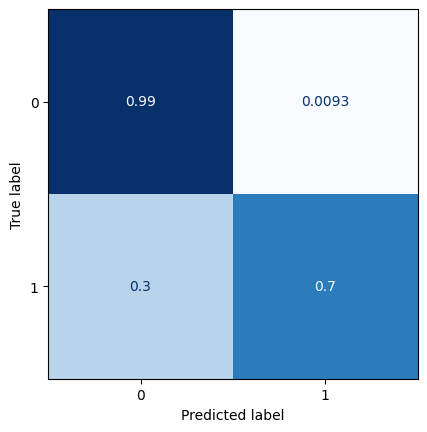

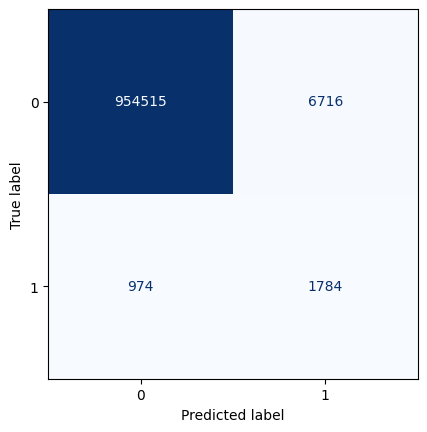

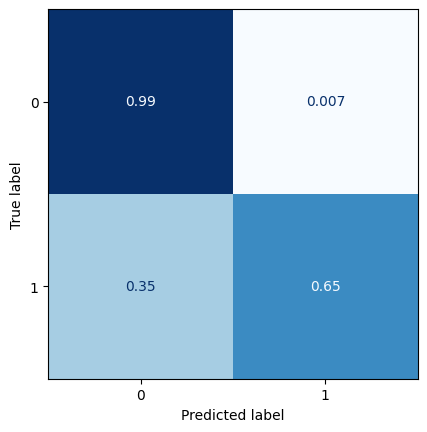

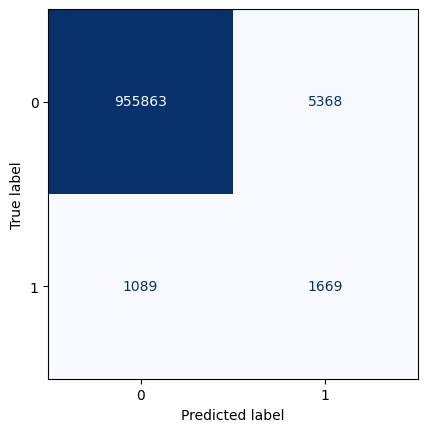

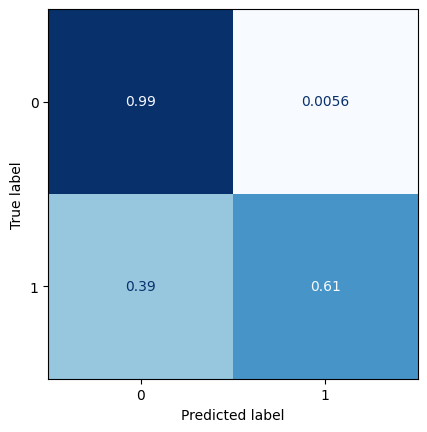

In [52]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

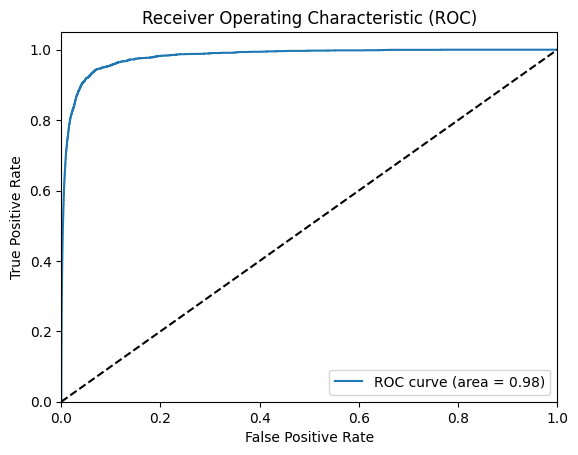

0.002396928127497421
0.0028610284972131425


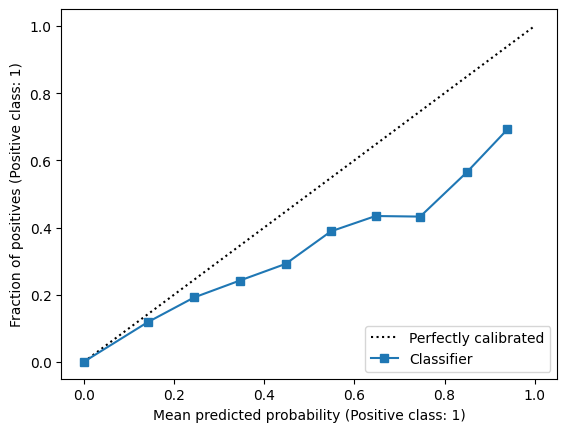

In [53]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))